In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 0. Importing data

In [2]:
intensity_df = pd.read_csv("../data/intensity_data_set.csv", index_col=["Country", "Start Year"])
intensity_df.drop(columns = ["CPI"], inplace = True)
probability_df = pd.read_csv("../data/probability_data_set.csv", index_col=["Country", "Start Year"])

In [3]:
#Aggregated plotting function
def subplots_function( df, var_list, index, aggregation_funct, title , graph_rows =2, figure_size=  (20, 18) ,subplot_title_fontsize= 14):
    fig, axs = plt.subplots(graph_rows,2, figsize= figure_size)

    for x in var_list:
        a = math.floor(var_list.index(x)/2)
        b = var_list.index(x)%2 
        axs[a,b].plot(df.pivot_table(values= x,  index = index, aggfunc= aggregation_funct)[x])
        axs[a,b].set_title(x, fontsize = subplot_title_fontsize)

    if ((len(var_list) % 2) != 0):
        axs[graph_rows-1,1].set_axis_off()
        
    plt.suptitle(title, fontsize = subplot_title_fontsize+10 )
    fig.tight_layout()

In [4]:
#Descriptive stats function
def descriptive_stats_function(df, varlist ):
    #Sum stats
    sum_stats = df.describe()
    #Kurtosis
    kurtosis= pd.Series()
    for x in varlist:
        kurtosis[str(x)] = df[str(x)].kurt()
    kurtosis = kurtosis.to_frame().rename(columns= {0:"kurtosis"}).transpose()
        
    #Skewness
    skewness = pd.Series()
    for x in varlist:
        skewness[str(x)] = df[str(x)].skew()
    skewness = skewness.to_frame().rename(columns= {0:"skewness"}).transpose()
    #Concat
    sum_stats = pd.concat([sum_stats, kurtosis, skewness])

    return sum_stats


# 1. Global statistics

In [5]:
#Descriptive statistics Intensity
descriptive_stats_function(df = intensity_df, varlist= intensity_df.describe().columns)

Total Deaths   No. Injured  No. Affected  No. Homeless  \
count      12648.000000  5.789000e+03  7.163000e+03  1.322000e+03   
mean         136.005614  1.268419e+03  6.368553e+05  3.182190e+04   
std         3089.186260  2.638675e+04  6.798133e+06  2.152175e+05   
min            0.000000  1.000000e+00  1.000000e+00  3.000000e+00   
25%            9.000000  1.000000e+01  6.000000e+02  3.485000e+02   
50%           16.000000  2.500000e+01  6.356000e+03  2.000000e+03   
75%           32.000000  7.900000e+01  6.000000e+04  7.256500e+03   
max       222570.000000  1.800000e+06  3.300000e+08  5.000000e+06   
kurtosis    3185.566455  3.760481e+03  1.373964e+03  3.221571e+02   
skewness      52.762253  5.688299e+01  3.281960e+01  1.644789e+01   

          Total Affected  Reconstruction Costs ('000 US$)  \
count       1.167300e+04                     3.300000e+01   
mean        3.950318e+05                     5.687264e+06   
std         5.335635e+06                     1.745232e+07   
min         1.000000e+00                     8.400000e+01   
25%         4.000000e+01                     1.000000e+05   
50%         9.500000e+02                     5.650000e+05   
75%         1.657300e+04                     3.344000e+06   
max         3.300000e+08                     1.000000e+08   
kurtosis    2.230595e+03                     2.886180e+01   
skewness    4.179041e+01                     5.236307e+00   

          Reconstruction Costs, Adjusted ('000 US$)  \
count                                  3.300000e+01   
mean                                   6.357118e+06   
std                                    1.760343e+07   
min                                    1.310000e+02   
25%                                    1.000000e+05   
50%                                    7.023360e+05   
75%                                    4.245383e+06   
max                                    1.000000e+08   
kurtosis                               2.690789e+01   
skewness                               4.996237e+00   

          Insured Damage ('000 US$)  Insured Damage, Adjusted ('000 US$)  \
count                  6.950000e+02                         6.940000e+02   
mean                   1.291425e+06                         1.699765e+06   
std                    4.578385e+06                         5.954430e+06   
min                    3.400000e+01                         4.800000e+01   
25%                    7.400000e+04                         9.917050e+04   
50%                    2.500000e+05                         3.491245e+05   
75%                    8.000000e+05                         1.117445e+06   
max                    6.000000e+07                         9.361435e+07   
kurtosis               9.325282e+01                         1.109667e+02   
skewness               8.766383e+00                         9.297606e+00   

          Total Damage ('000 US$)  Total Damage, Adjusted ('000 US$)  
count                3.126000e+03                       3.111000e+03  
mean                 1.127098e+06                       1.471953e+06  
std                  6.237979e+06                       8.311406e+06  
min                  0.000000e+00                       0.000000e+00  
25%                  1.500000e+04                       2.123400e+04  
50%                  1.000000e+05                       1.408780e+05  
75%                  5.400000e+05                       7.145890e+05  
max                  2.100000e+08                       2.844652e+08  
kurtosis             5.107478e+02                       5.682550e+02  
skewness             1.938535e+01                       2.059656e+01

In [6]:
#Descriptive statistics Probability
descriptive_stats_function(df = probability_df, varlist=['Drought', 'Earthquake', 'Extreme temperature', 'Flood', 'Storm',
       'Volcanic activity', 'Wildfire'])

Drought   Earthquake  Extreme temperature        Flood  \
count     2849.000000  2849.000000          2849.000000  2849.000000   
mean         0.142506     0.233415             0.172692     1.427167   
std          0.363418     0.776629             0.443047     1.936776   
min          0.000000     0.000000             0.000000     0.000000   
25%          0.000000     0.000000             0.000000     0.000000   
50%          0.000000     0.000000             0.000000     1.000000   
75%          0.000000     0.000000             0.000000     2.000000   
max          3.000000    11.000000             3.000000    25.000000   
kurtosis     5.816156    39.570757             9.118377    22.974423   
skewness     2.437371     5.384205             2.843191     3.712676   

                Storm  Volcanic activity     Wildfire  
count     2849.000000        2849.000000  2849.000000  
mean         0.903475           0.044226     0.107055  
std          2.003022           0.250300     0.459890  
min          0.000000           0.000000     0.000000  
25%          0.000000           0.000000     0.000000  
50%          0.000000           0.000000     0.000000  
75%          1.000000           0.000000     0.000000  
max         23.000000           4.000000     8.000000  
kurtosis    32.441967          57.933600    80.122792  
skewness     4.988872           6.858314     7.369612

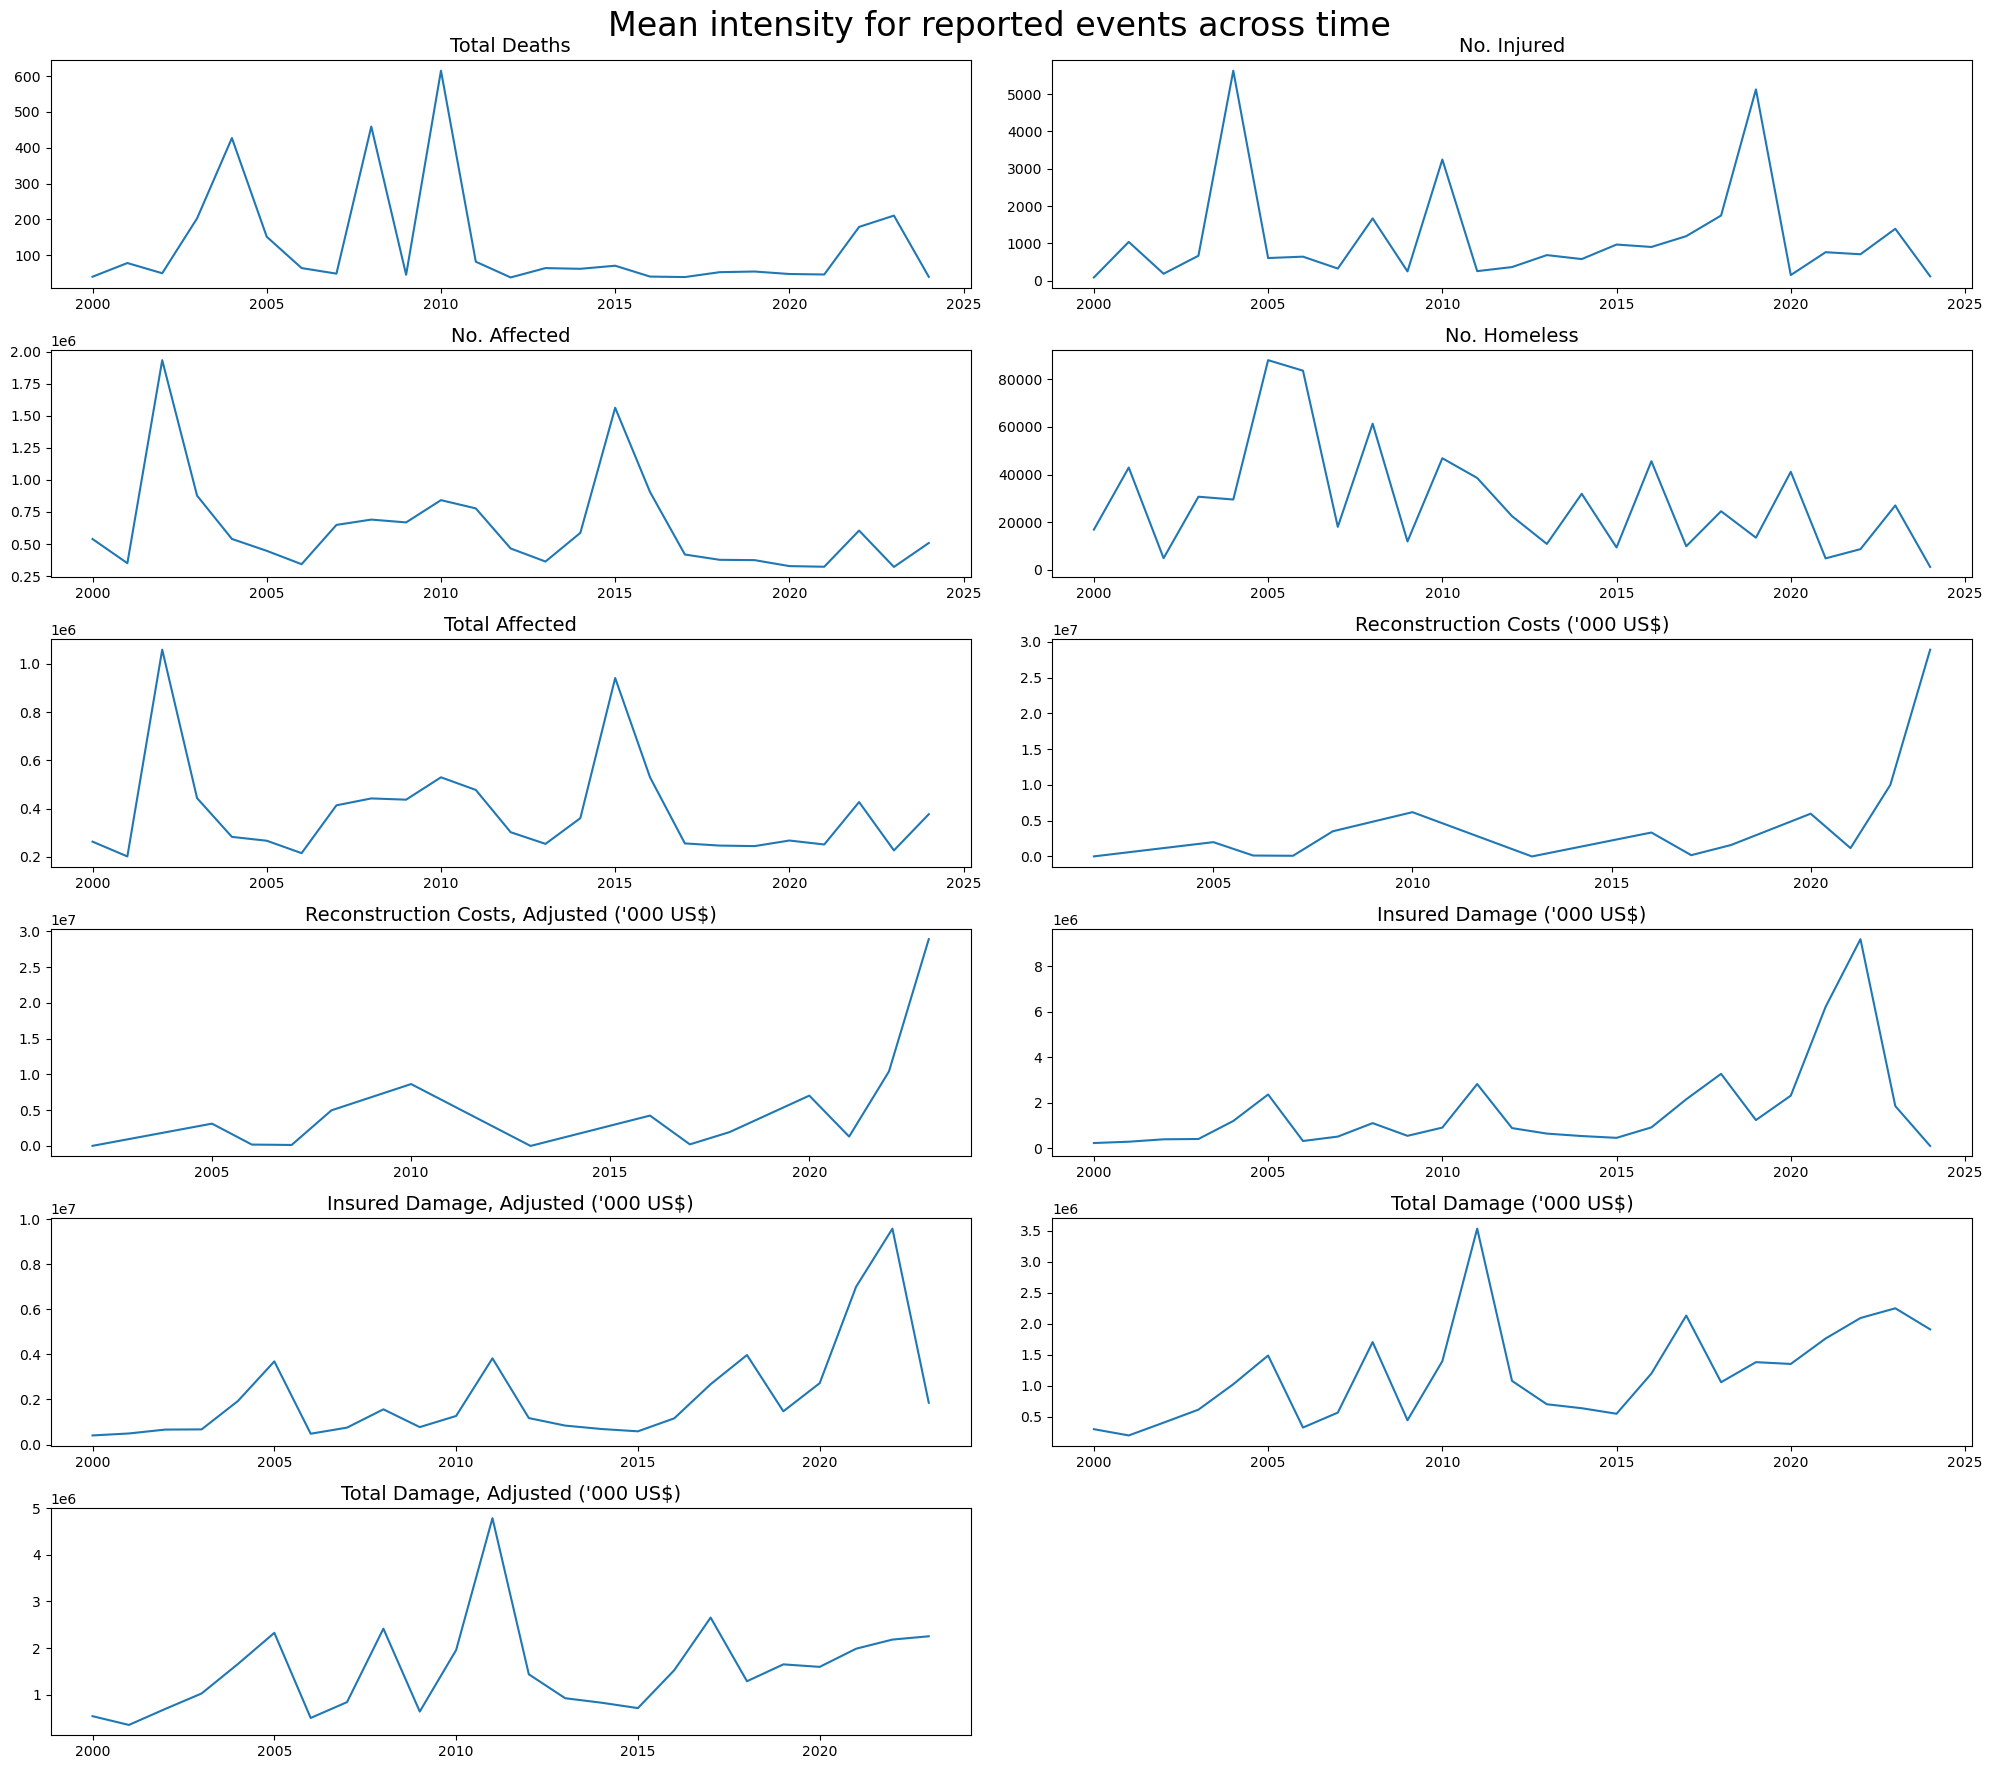

In [7]:
subplots_function( df = intensity_df, var_list = intensity_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "mean", graph_rows =6, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Mean intensity for reported events across time")

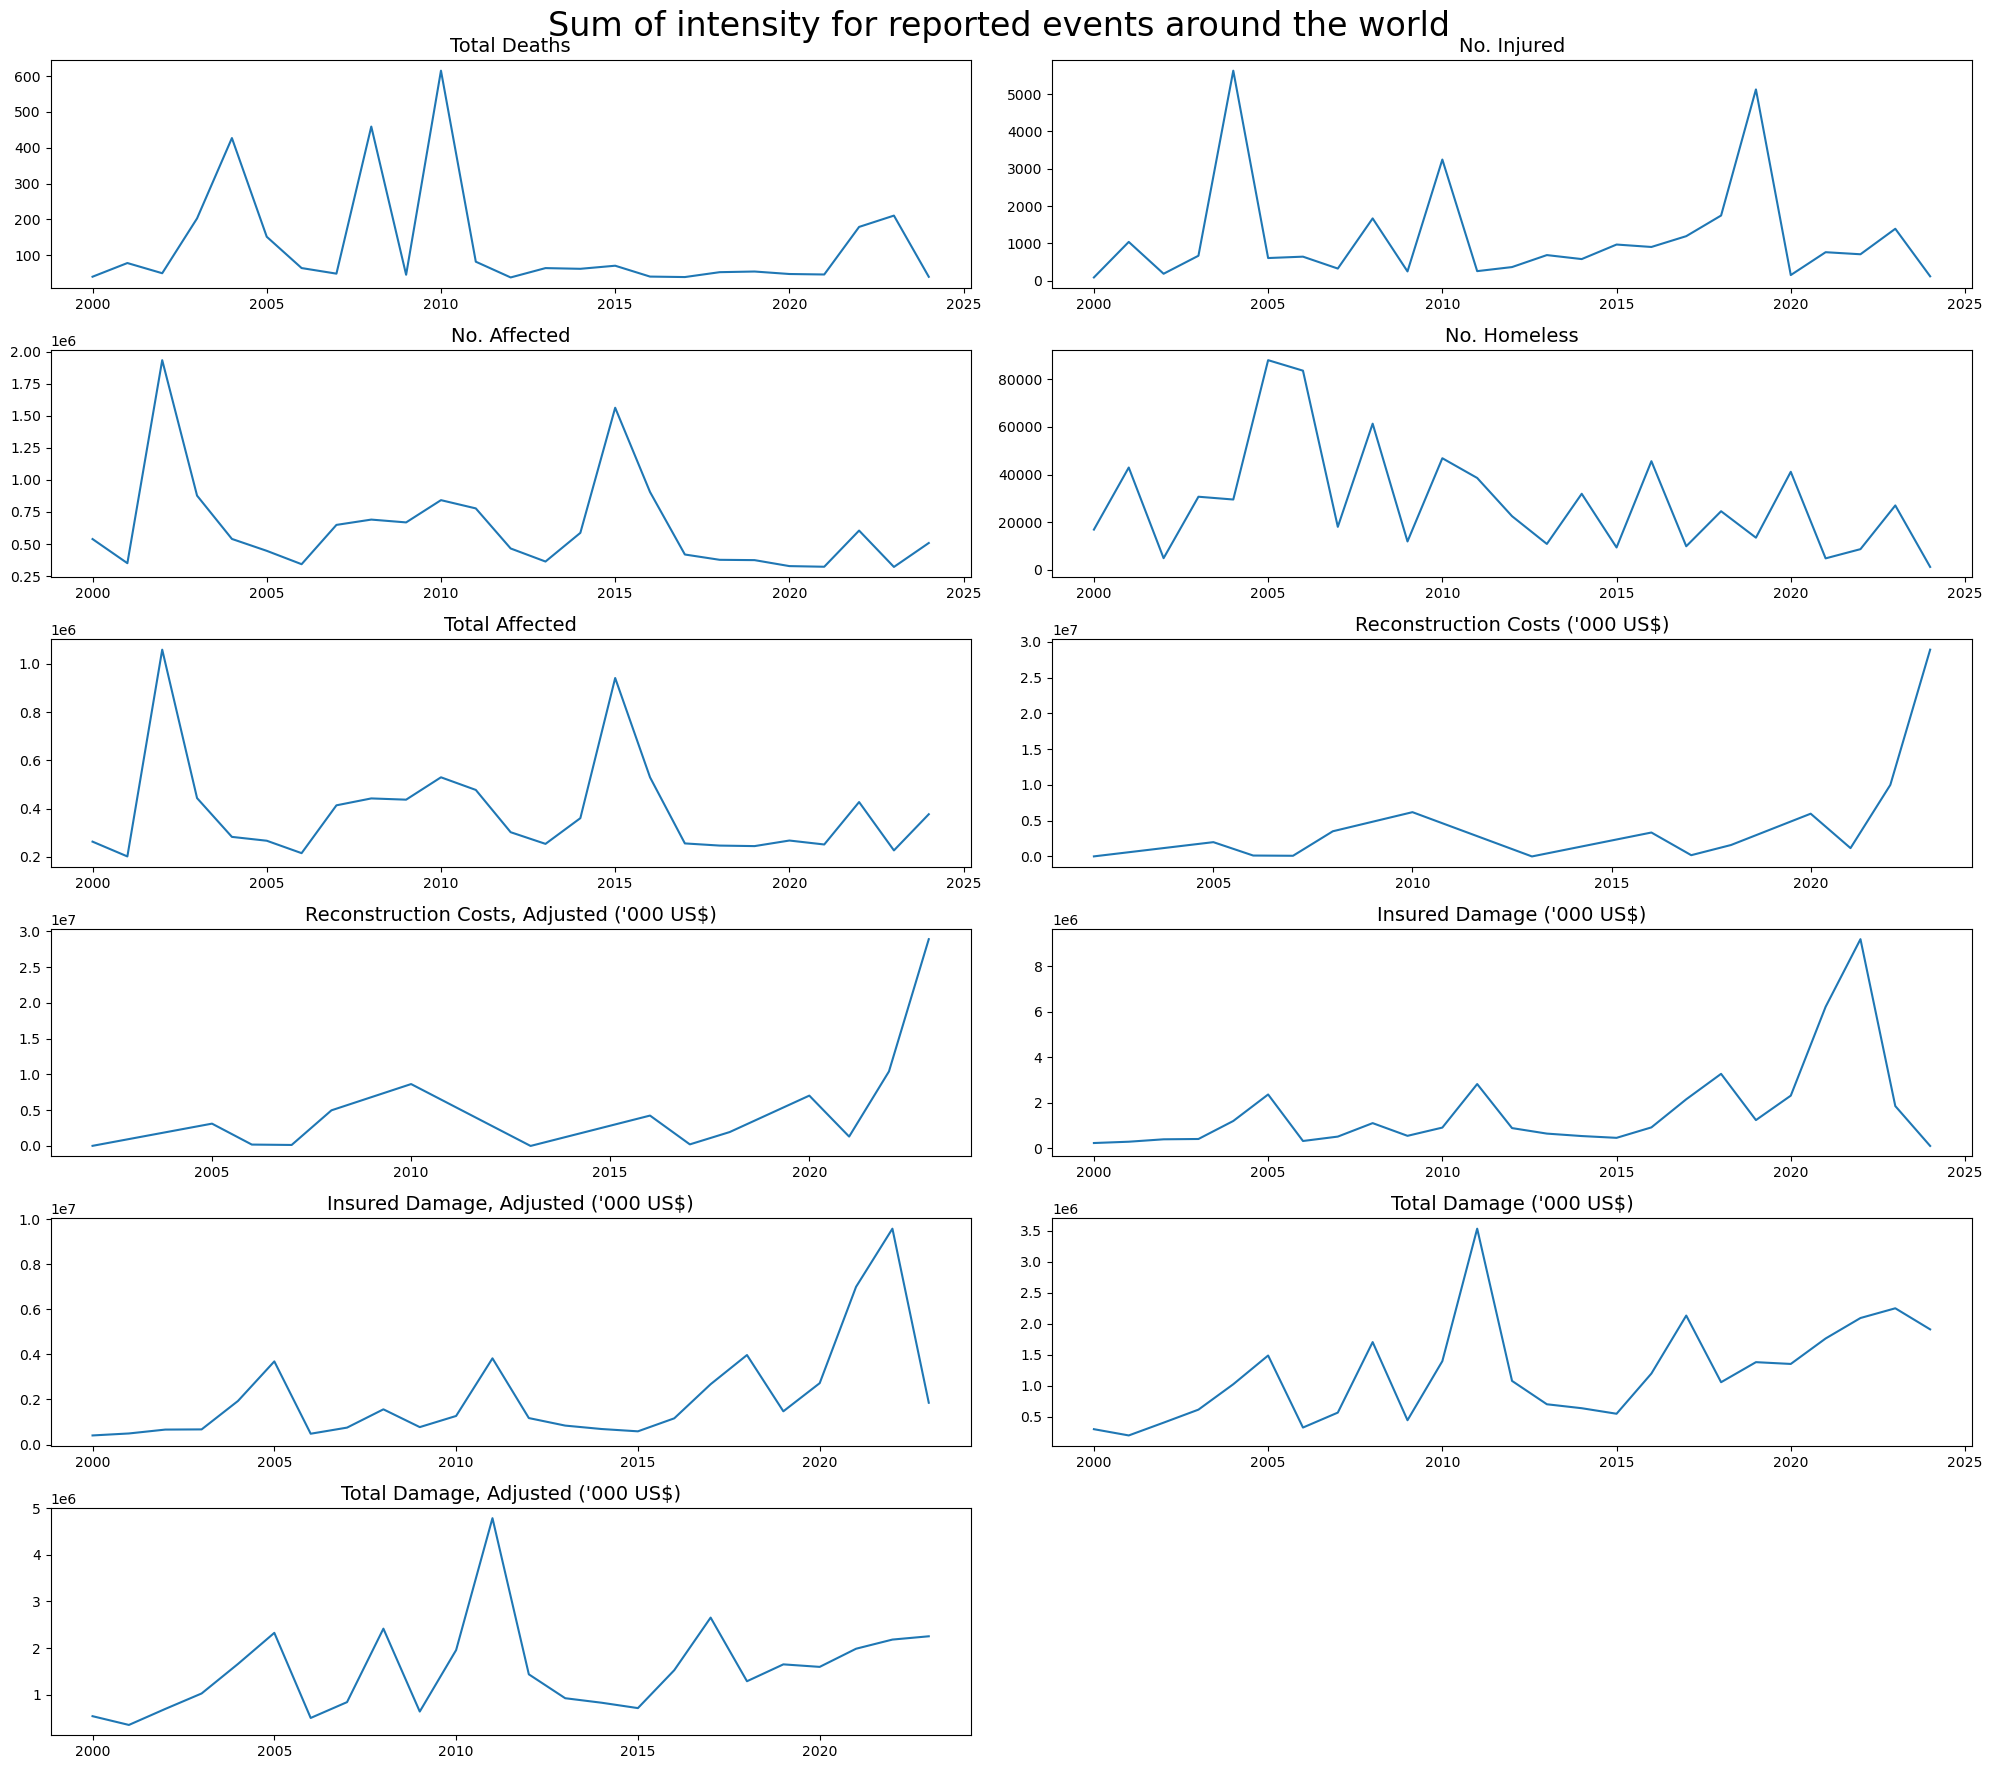

In [8]:
subplots_function( df = intensity_df, var_list = intensity_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "mean", graph_rows =6, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Sum of intensity for reported events around the world")

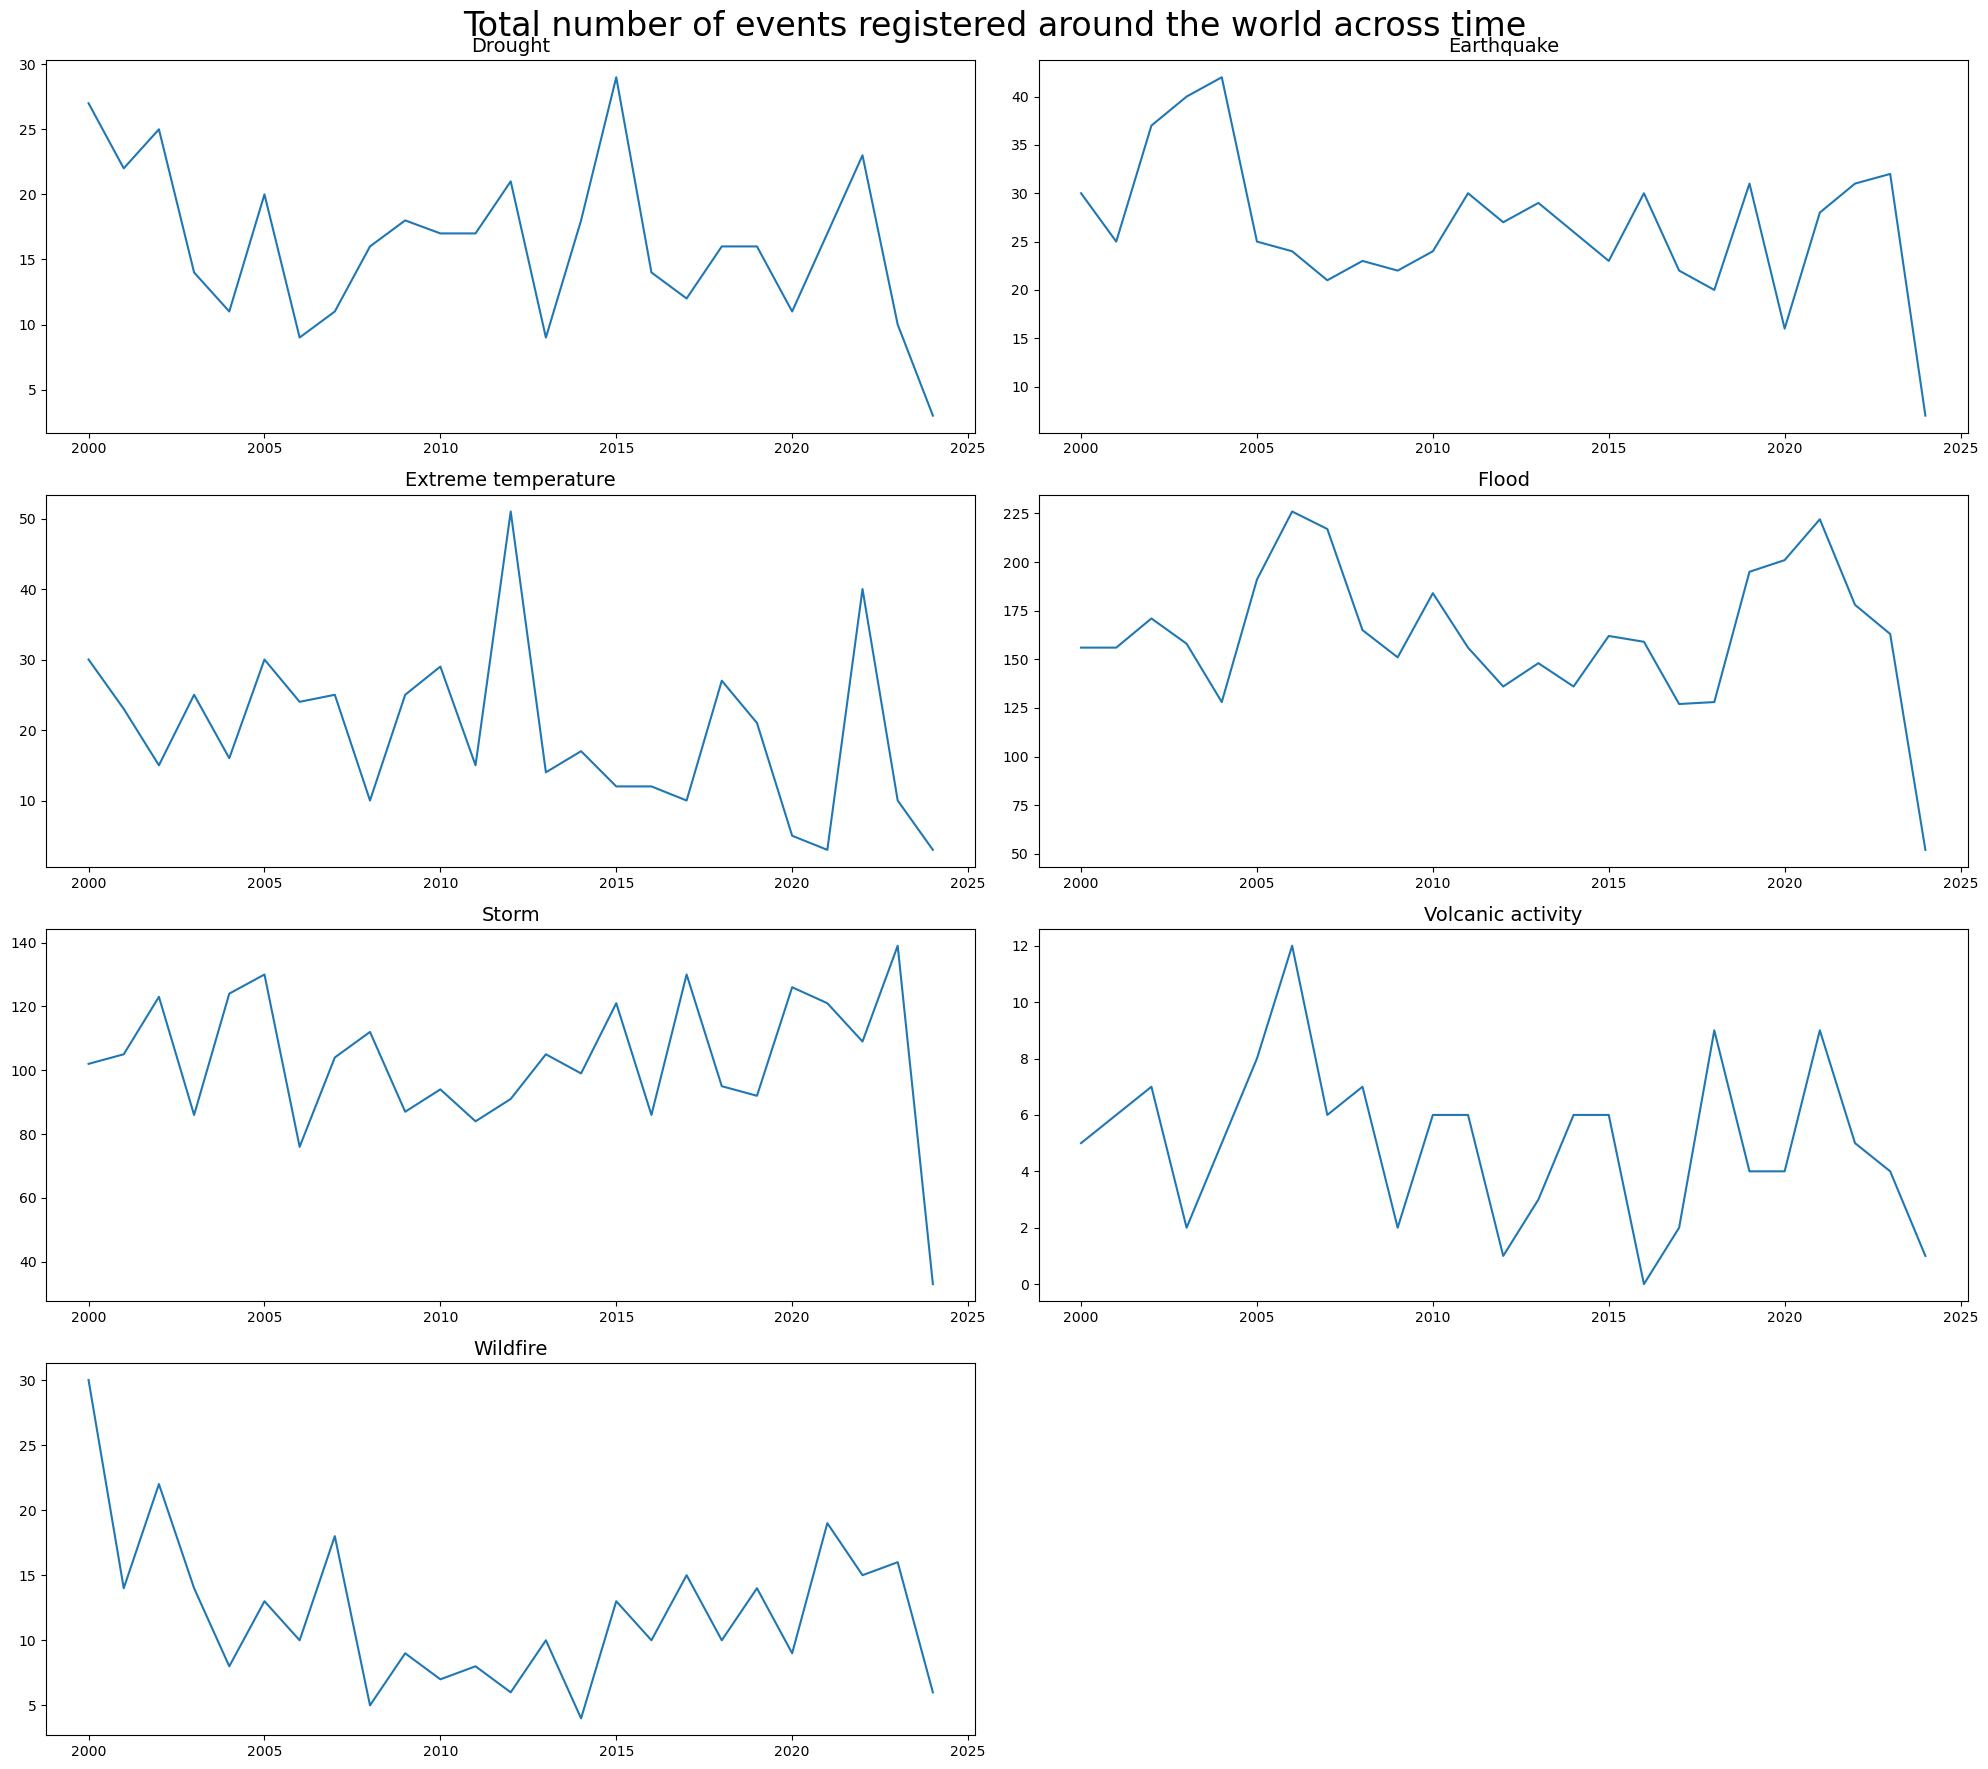

In [9]:
subplots_function( df = probability_df, var_list = probability_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "sum", graph_rows =4, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Total number of events registered around the world across time")

# 2. Statistics by region

## 2.1 Asia

In [10]:
#Descriptive statistics Intensity
descriptive_stats_function(df = intensity_df.query('Region == "Asia"'), varlist= intensity_df.describe().columns.values.tolist())

Total Deaths    No. Injured  No. Affected  No. Homeless  \
count       5430.000000    2752.000000  2.909000e+03  5.690000e+02   
mean         175.583425    1228.835029  1.269795e+06  5.877421e+04   
std         3474.869817   13945.702006  1.044018e+07  3.210606e+05   
min            1.000000       1.000000  1.000000e+00  6.000000e+00   
25%           11.000000      11.000000  1.380000e+03  6.000000e+02   
50%           19.000000      28.000000  1.500000e+04  3.000000e+03   
75%           37.000000     100.000000  1.674360e+05  1.450000e+04   
max       165708.000000  461542.000000  3.300000e+08  5.000000e+06   
kurtosis    1528.895266     629.805378  6.005448e+02  1.466610e+02   
skewness      37.091201      22.617169  2.194062e+01  1.124683e+01   

          Total Affected  Reconstruction Costs ('000 US$)  \
count       4.853000e+03                     8.000000e+00   
mean        7.687324e+05                     1.801316e+07   
std         8.108272e+06                     3.350714e+07   
min         1.000000e+00                     5.300000e+03   
25%         4.000000e+01                     2.275000e+06   
50%         1.649000e+03                     7.600000e+06   
75%         4.000000e+04                     1.120000e+07   
max         3.300000e+08                     1.000000e+08   
kurtosis    9.975162e+02                     7.463375e+00   
skewness    2.825288e+01                     2.703478e+00   

          Reconstruction Costs, Adjusted ('000 US$)  \
count                                  8.000000e+00   
mean                                   1.904606e+07   
std                                    3.317479e+07   
min                                    6.588000e+03   
25%                                    2.692836e+06   
50%                                    9.262442e+06   
75%                                    1.431420e+07   
max                                    1.000000e+08   
kurtosis                               7.343499e+00   
skewness                               2.672688e+00   

          Insured Damage ('000 US$)  Insured Damage, Adjusted ('000 US$)  \
count                  1.600000e+02                         1.600000e+02   
mean                   8.239784e+05                         1.100224e+06   
std                    3.296314e+06                         4.407994e+06   
min                    4.100000e+01                         6.600000e+01   
25%                    4.475000e+04                         6.232125e+04   
50%                    1.420000e+05                         1.997820e+05   
75%                    4.350000e+05                         5.906500e+05   
max                    3.750000e+07                         5.079735e+07   
kurtosis               9.818240e+01                         1.033747e+02   
skewness               9.206599e+00                         9.489760e+00   

          Total Damage ('000 US$)  Total Damage, Adjusted ('000 US$)  
count                1.446000e+03                       1.441000e+03  
mean                 9.615911e+05                       1.262673e+06  
std                  6.550502e+06                       8.836950e+06  
min                  0.000000e+00                       0.000000e+00  
25%                  1.000000e+04                       1.278200e+04  
50%                  7.000000e+04                       9.599200e+04  
75%                  3.920000e+05                       5.332780e+05  
max                  2.100000e+08                       2.844652e+08  
kurtosis             7.392648e+02                       7.578881e+02  
skewness             2.459255e+01                       2.511074e+01

In [11]:
#Descriptive statistics Probability
descriptive_stats_function(df = probability_df.query('Region == "Asia"'), varlist=['Drought', 'Earthquake', 'Extreme temperature', 'Flood', 'Storm',
       'Volcanic activity', 'Wildfire'])

Drought  Earthquake  Extreme temperature       Flood       Storm  \
count     723.000000  723.000000           723.000000  723.000000  723.000000   
mean        0.130014    0.623790             0.193638    2.262794    1.442600   
std         0.379128    1.338577             0.480781    2.937500    2.504392   
min         0.000000    0.000000             0.000000    0.000000    0.000000   
25%         0.000000    0.000000             0.000000    1.000000    0.000000   
50%         0.000000    0.000000             0.000000    1.000000    0.000000   
75%         0.000000    1.000000             0.000000    3.000000    2.000000   
max         3.000000   11.000000             3.000000   25.000000   17.000000   
kurtosis   13.325485   11.730646             7.932739   11.207888    8.880938   
skewness    3.311532    3.083336             2.721977    2.806282    2.736347   

          Volcanic activity    Wildfire  
count            723.000000  723.000000  
mean               0.066390    0.053942  
std                0.334559    0.232105  
min                0.000000    0.000000  
25%                0.000000    0.000000  
50%                0.000000    0.000000  
75%                0.000000    0.000000  
max                4.000000    2.000000  
kurtosis          44.072501   18.154702  
skewness           6.071238    4.286553

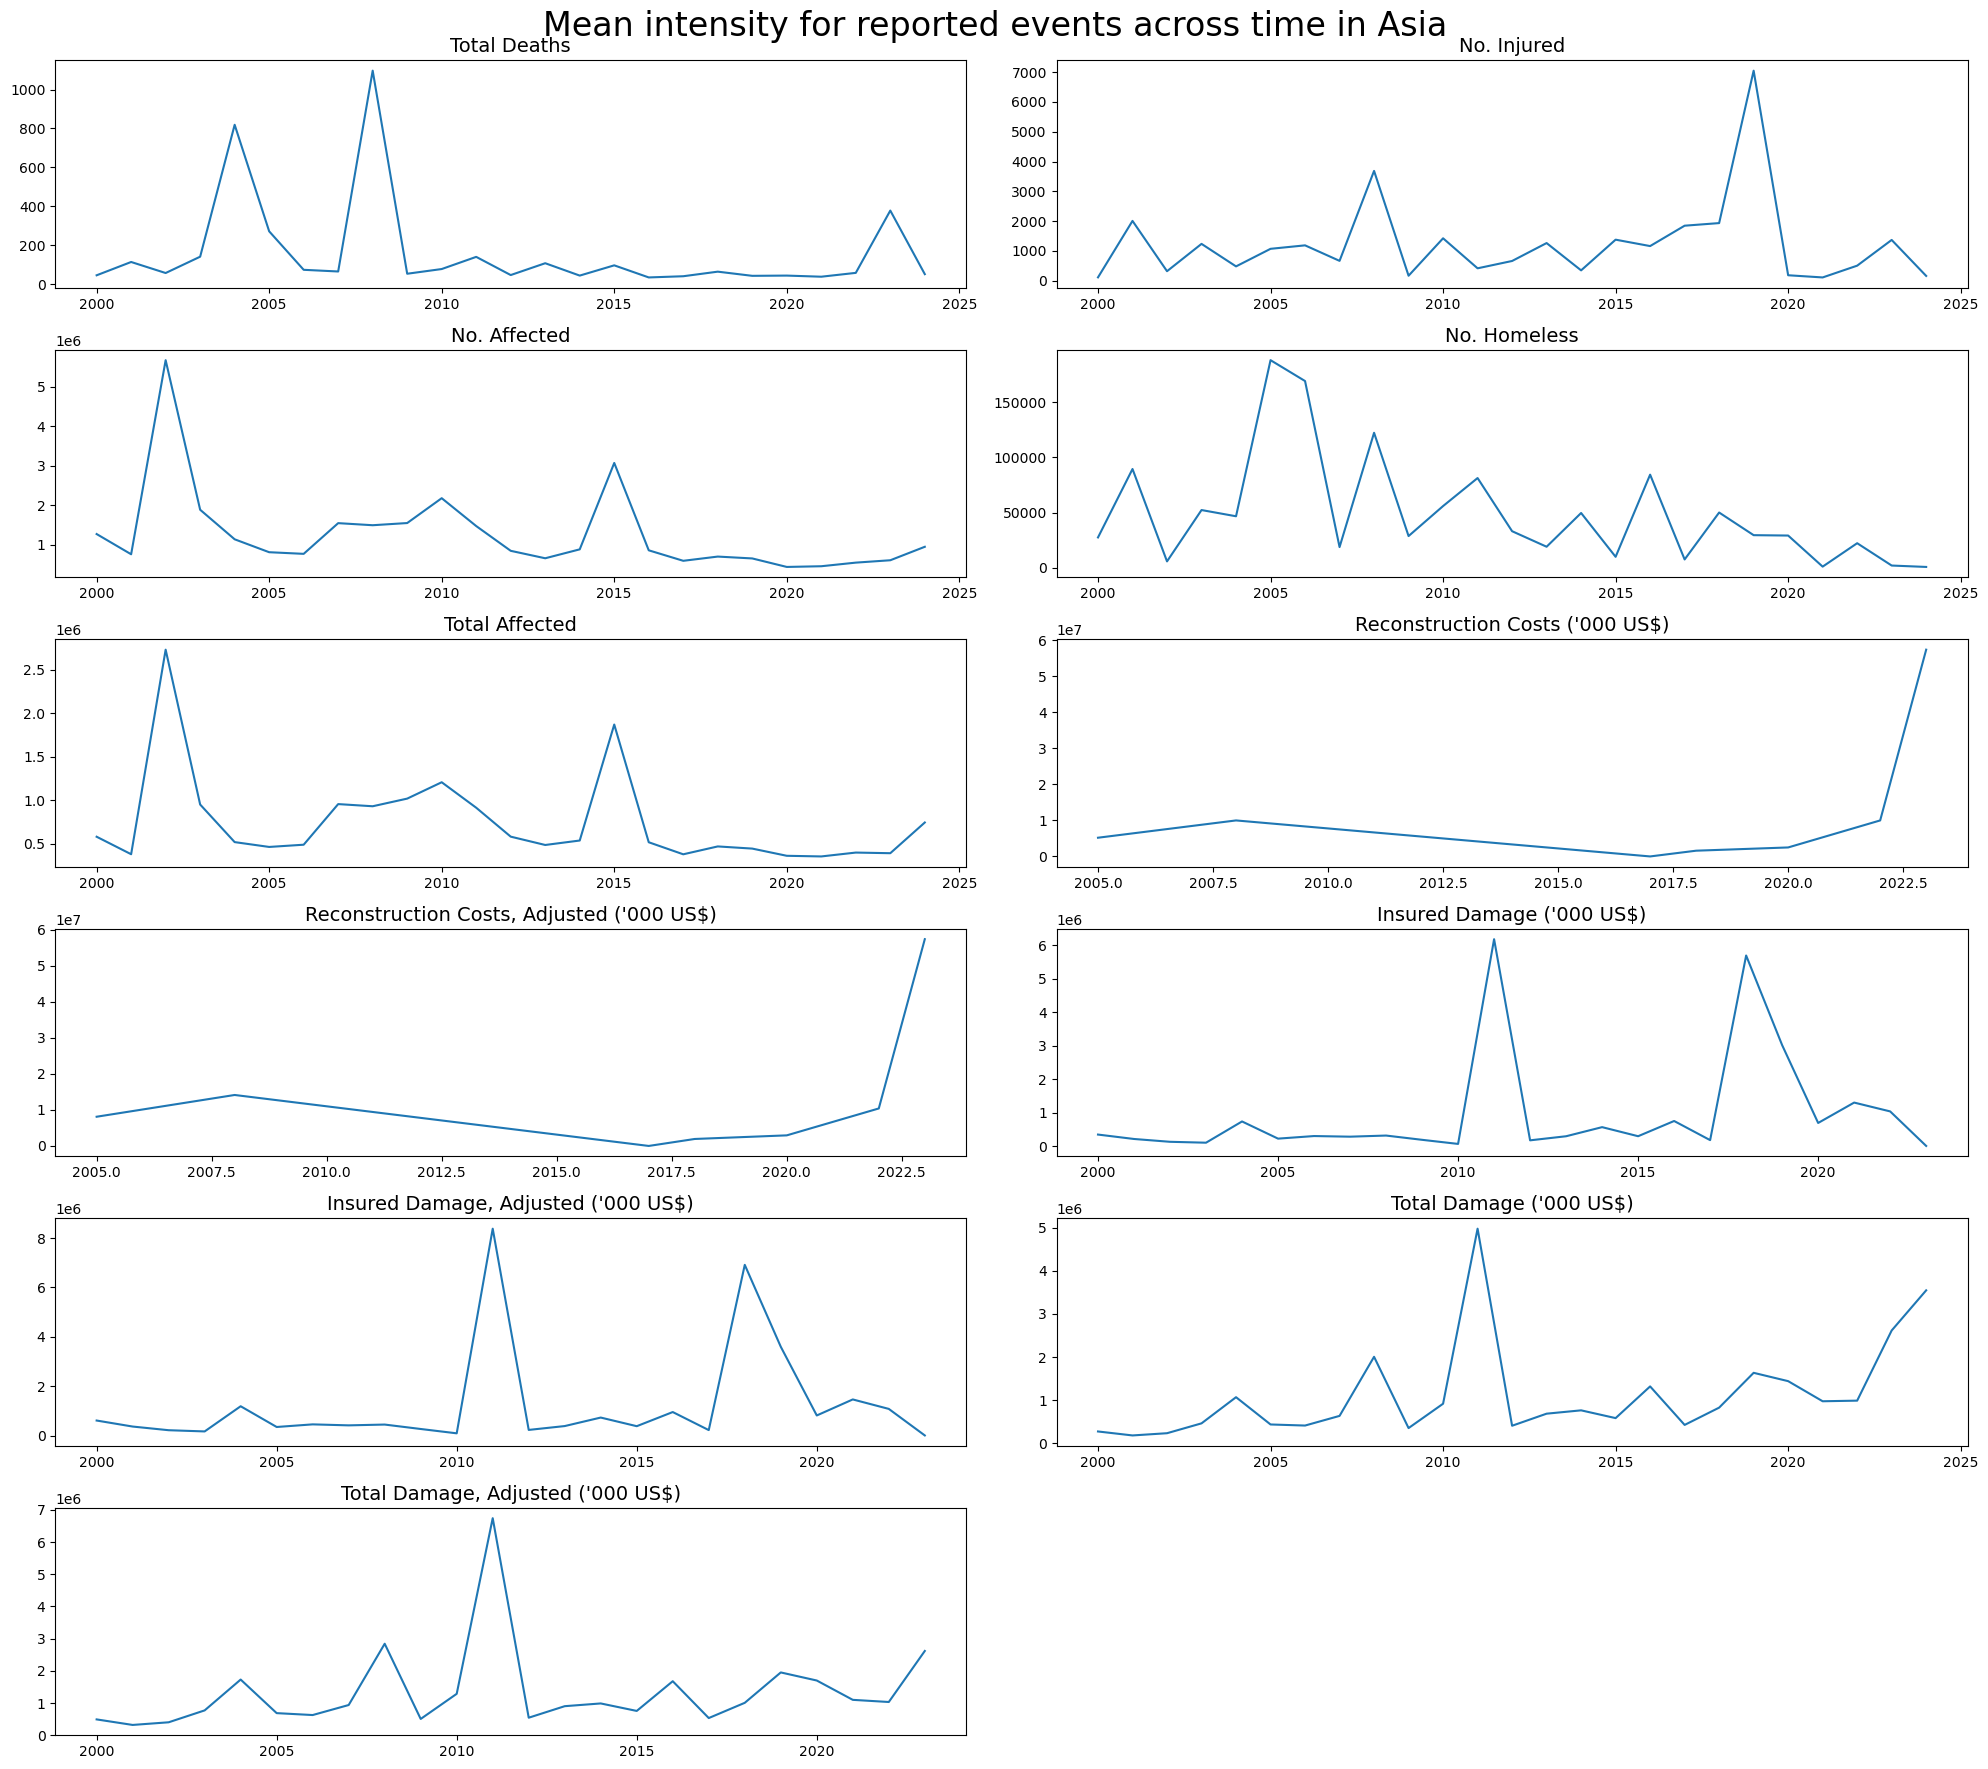

In [12]:
subplots_function( df = intensity_df.query('Region == "Asia"'), var_list = intensity_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "mean", graph_rows =6, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Mean intensity for reported events across time in Asia")

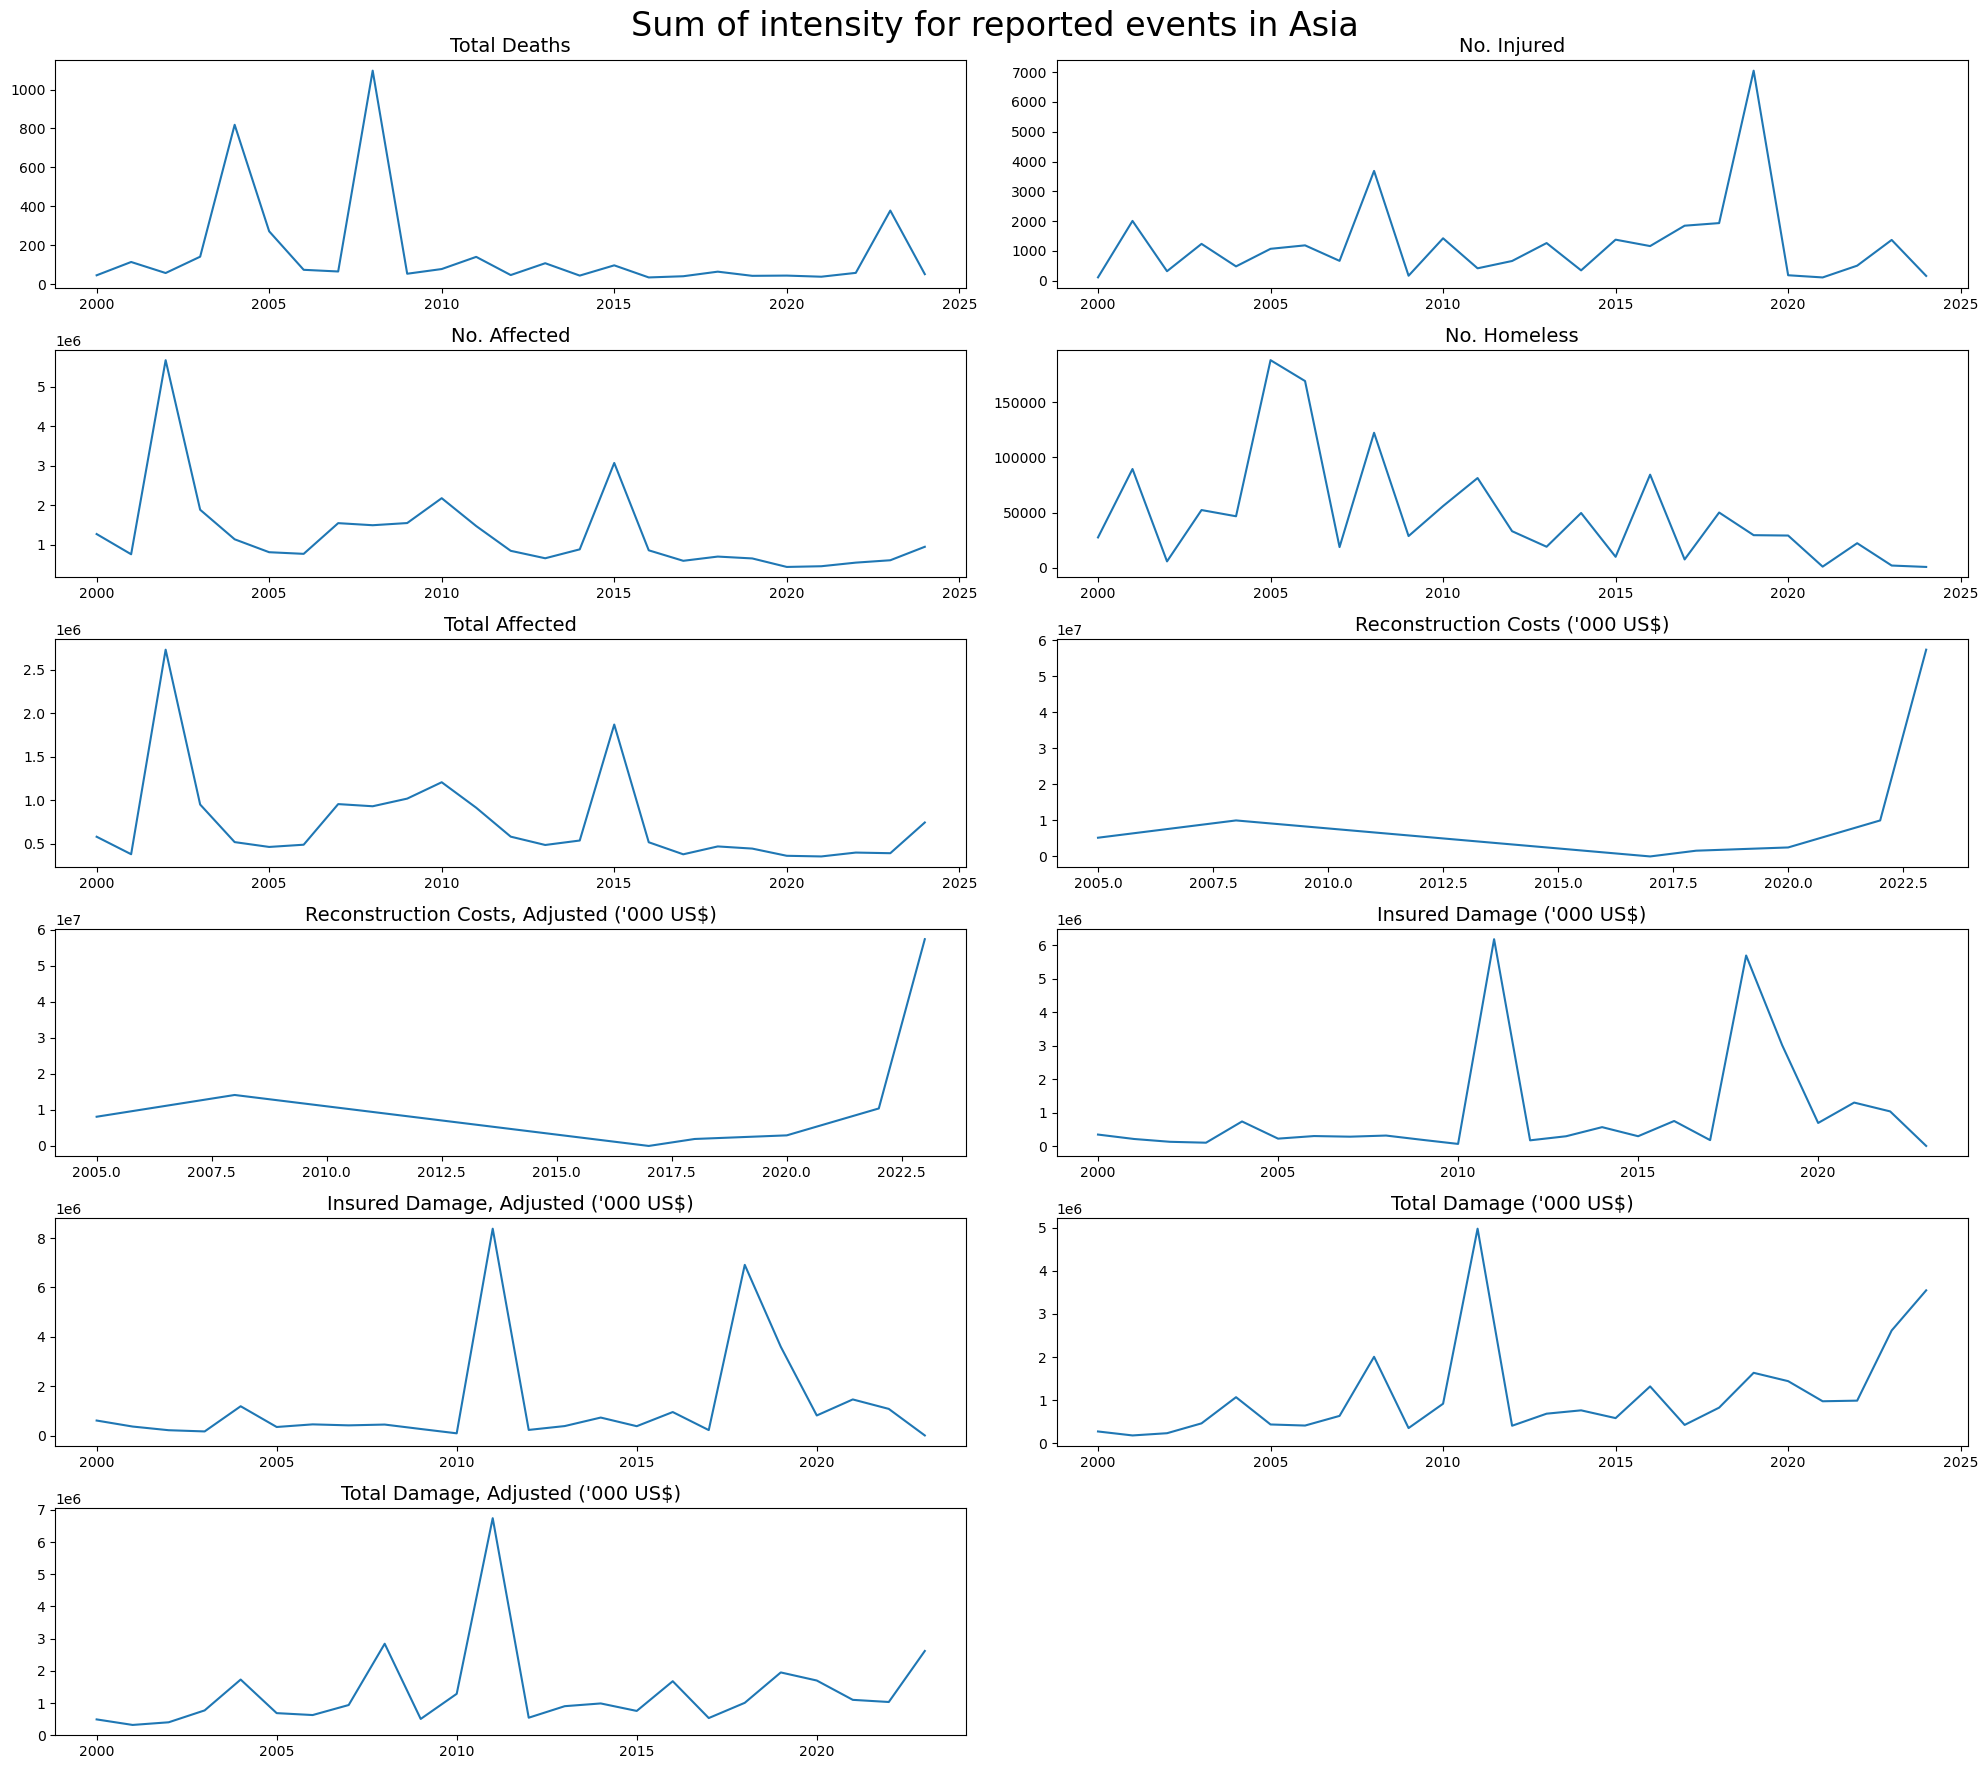

In [13]:
subplots_function( df = intensity_df.query('Region == "Asia"'), var_list = intensity_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "mean", graph_rows =6, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Sum of intensity for reported events in Asia")

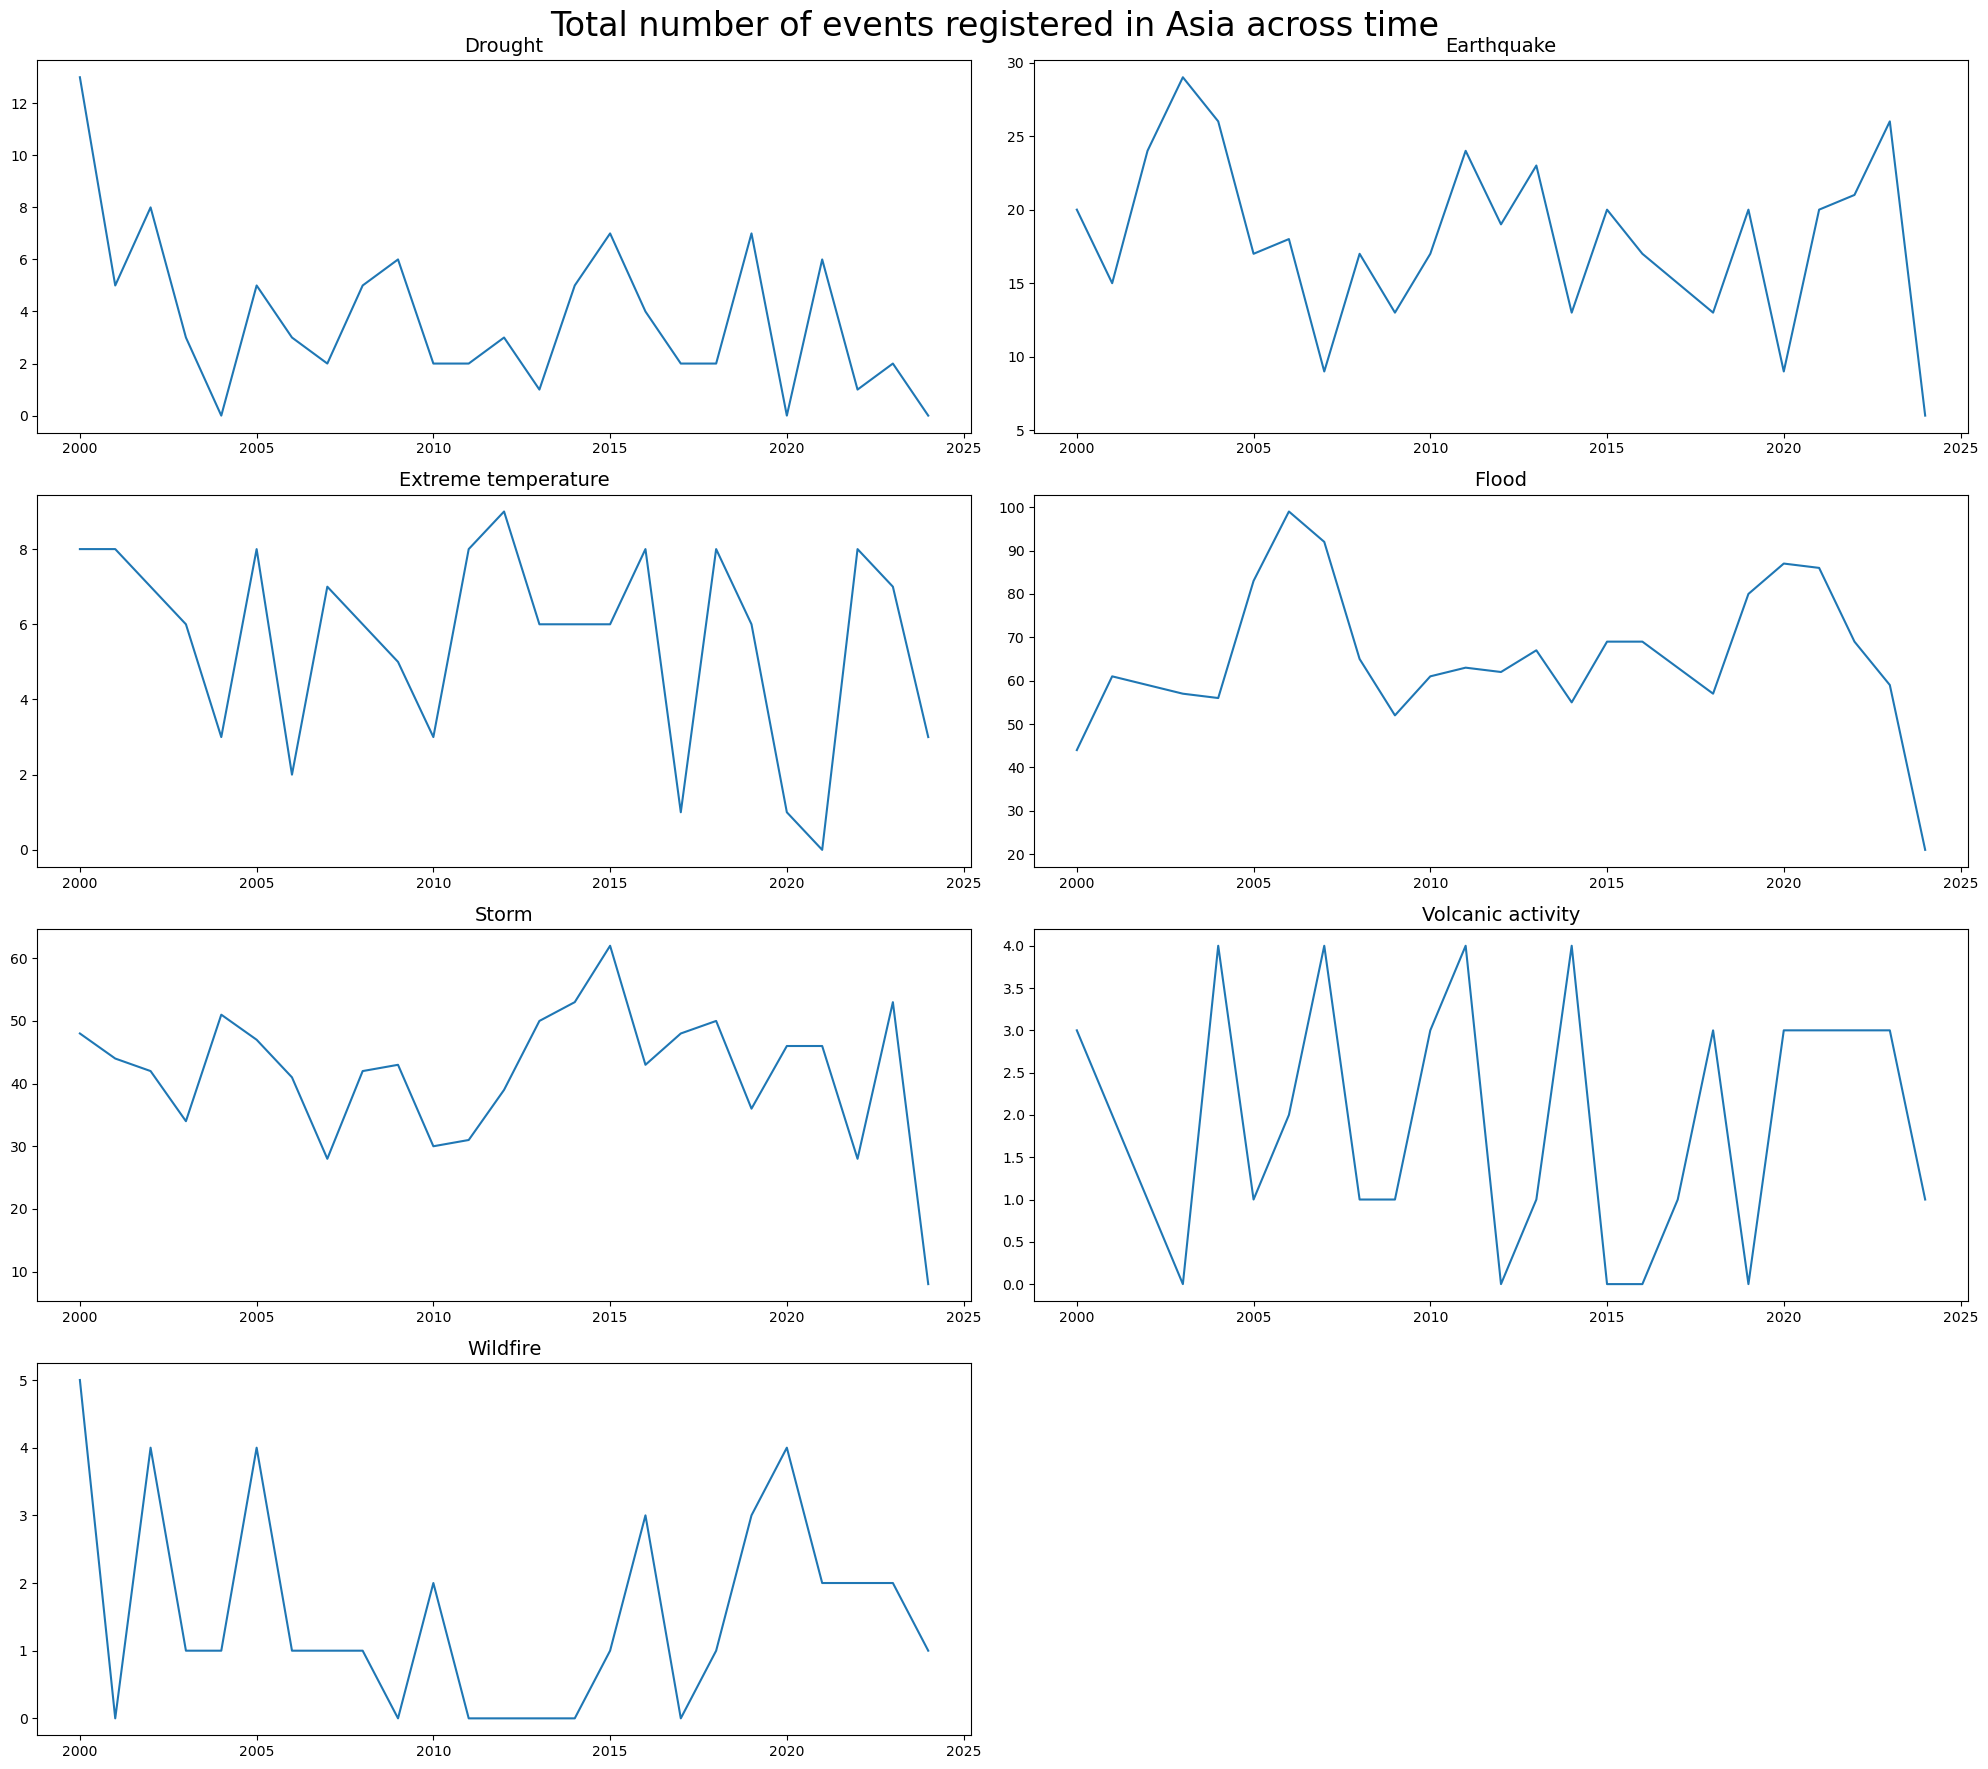

In [14]:
subplots_function( df = probability_df.query('Region == "Asia"'), var_list = probability_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "sum", graph_rows =4, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Total number of events registered in Asia across time")

## 2.2 Europe

In [15]:
#Descriptive statistics Intensity
descriptive_stats_function(df = intensity_df.query('Region == "Europe"'), varlist= intensity_df.describe().columns.values.tolist())

Total Deaths  No. Injured  No. Affected   No. Homeless  \
count      1297.000000   531.000000  6.500000e+02      66.000000   
mean        179.070933   123.384181  2.646214e+04   12964.060606   
std        1922.158699   521.398514  1.512838e+05   64644.303574   
min           1.000000     1.000000  1.000000e+00       3.000000   
25%           3.000000     6.000000  2.377500e+02     150.000000   
50%          11.000000    20.000000  1.000000e+03    1000.000000   
75%          22.000000    70.000000  5.445000e+03    3395.500000   
max       55736.000000  9600.000000  2.600000e+06  517000.000000   
kurtosis    564.926800   213.230250  1.574089e+02      59.276594   
skewness     21.597616    12.844405  1.135843e+01       7.558298   

          Total Affected  Reconstruction Costs ('000 US$)  \
count       1.066000e+03                     5.000000e+00   
mean        1.699956e+04                     2.453940e+06   
std         1.198252e+05                     3.944007e+06   
min         1.000000e+00                     1.894900e+04   
25%         2.800000e+01                     5.650000e+05   
50%         2.330000e+02                     7.950000e+05   
75%         2.250000e+03                     1.440751e+06   
max         2.600000e+06                     9.450000e+06   
kurtosis    2.492253e+02                     4.667759e+00   
skewness    1.421227e+01                     2.143706e+00   

          Reconstruction Costs, Adjusted ('000 US$)  \
count                                  5.000000e+00   
mean                                   3.021679e+06   
std                                    4.588357e+06   
min                                    2.681700e+04   
25%                                    7.023360e+05   
50%                                    1.240390e+06   
75%                                    2.013246e+06   
max                                    1.112560e+07   
kurtosis                               4.503419e+00   
skewness                               2.097156e+00   

          Insured Damage ('000 US$)  Insured Damage, Adjusted ('000 US$)  \
count                  1.310000e+02                         1.310000e+02   
mean                   4.947137e+05                         6.863470e+05   
std                    1.054101e+06                         1.322911e+06   
min                    3.400000e+01                         4.800000e+01   
25%                    3.050000e+04                         5.153000e+04   
50%                    1.420000e+05                         1.914380e+05   
75%                    5.210000e+05                         6.828170e+05   
max                    9.700000e+06                         1.090752e+07   
kurtosis               4.545883e+01                         2.836552e+01   
skewness               5.823745e+00                         4.534263e+00   

          Total Damage ('000 US$)  Total Damage, Adjusted ('000 US$)  
count                3.990000e+02                       3.980000e+02  
mean                 7.936847e+05                       1.095661e+06  
std                  2.587615e+06                       3.267303e+06  
min                  5.000000e+01                       8.300000e+01  
25%                  2.900000e+04                       3.650300e+04  
50%                  1.500000e+05                       2.028310e+05  
75%                  5.500000e+05                       7.562768e+05  
max                  4.000000e+07                       4.497945e+07  
kurtosis             1.375142e+02                       9.039956e+01  
skewness             1.014356e+01                       8.162401e+00

In [16]:
#Descriptive statistics Probability
descriptive_stats_function(df = probability_df.query('Region == "Europe"'), varlist=['Drought', 'Earthquake', 'Extreme temperature', 'Flood', 'Storm',
       'Volcanic activity', 'Wildfire'])

Drought  Earthquake  Extreme temperature       Flood       Storm  \
count     557.000000  557.000000           557.000000  557.000000  557.000000   
mean        0.046679    0.093357             0.470377    0.861759    0.619390   
std         0.211139    0.377290             0.644235    1.128725    0.853801   
min         0.000000    0.000000             0.000000    0.000000    0.000000   
25%         0.000000    0.000000             0.000000    0.000000    0.000000   
50%         0.000000    0.000000             0.000000    1.000000    0.000000   
75%         0.000000    0.000000             1.000000    1.000000    1.000000   
max         1.000000    3.000000             3.000000    8.000000    5.000000   
kurtosis   16.631716   26.258659             1.784634    6.408790    2.406846   
skewness    4.309525    4.818930             1.325837    2.126660    1.529841   

          Volcanic activity    Wildfire  
count            557.000000  557.000000  
mean               0.005386    0.149013  
std                0.073257    0.461916  
min                0.000000    0.000000  
25%                0.000000    0.000000  
50%                0.000000    0.000000  
75%                0.000000    0.000000  
max                1.000000    5.000000  
kurtosis         182.315309   28.013005  
skewness          13.552147    4.361143

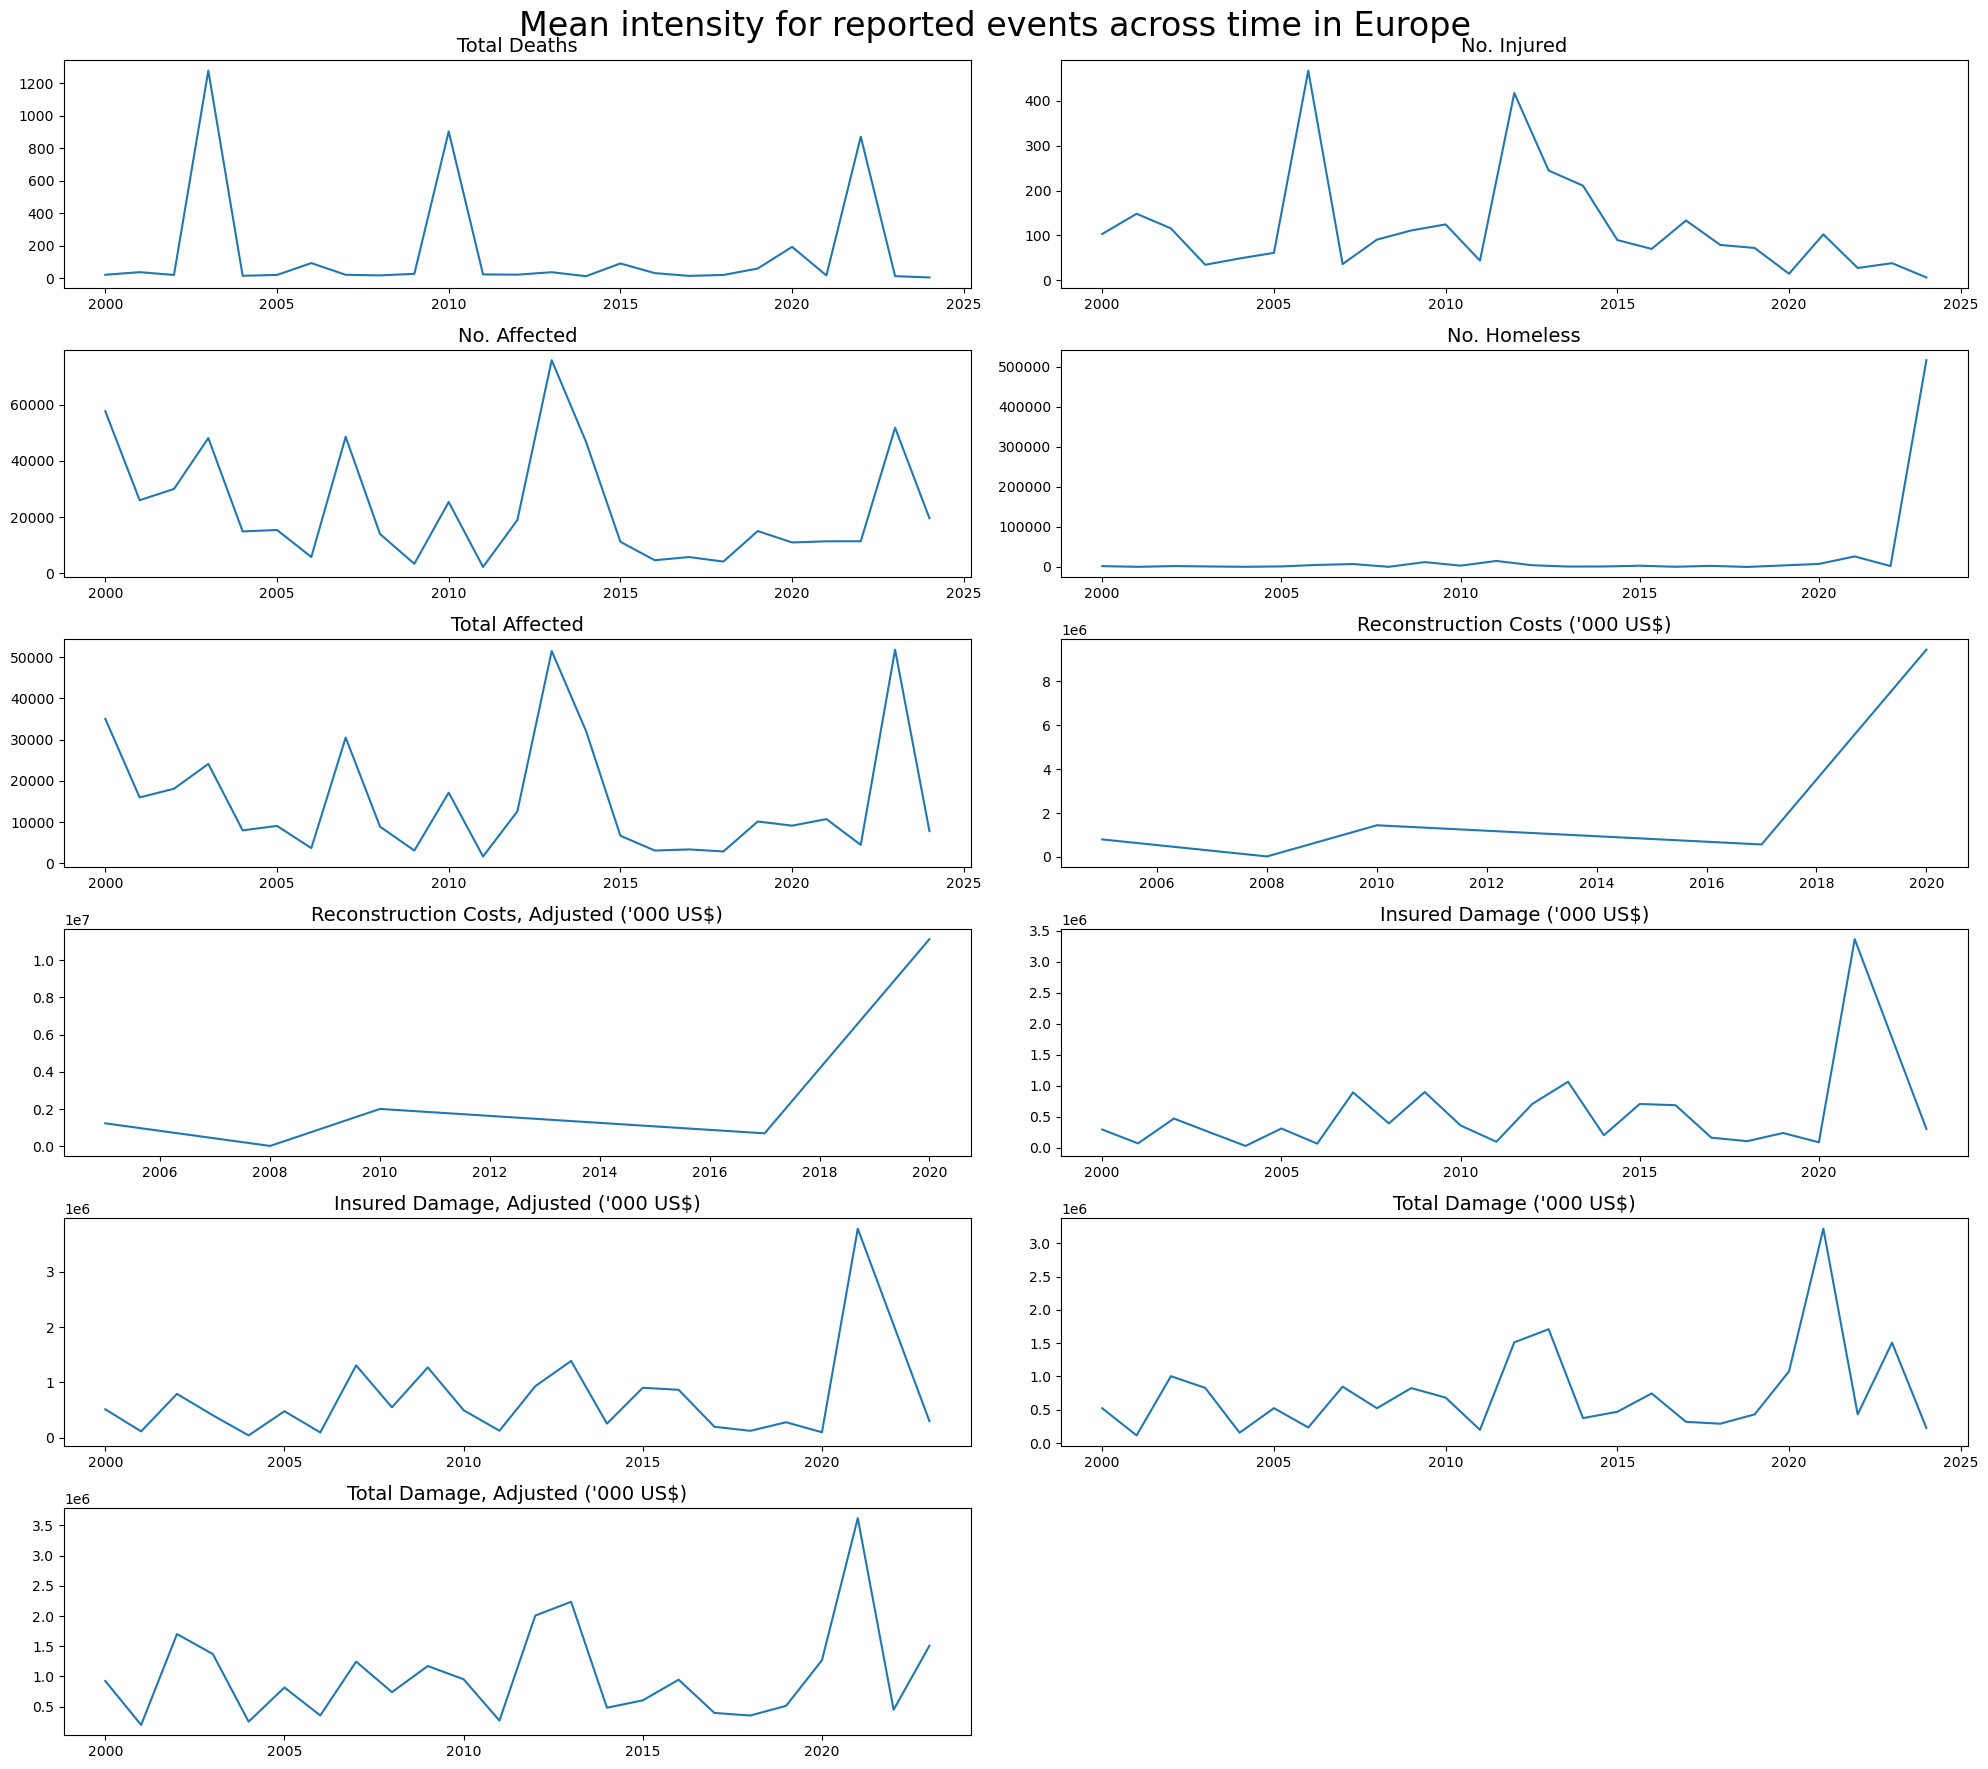

In [17]:
subplots_function( df = intensity_df.query('Region == "Europe"'), var_list = intensity_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "mean", graph_rows =6, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Mean intensity for reported events across time in Europe")

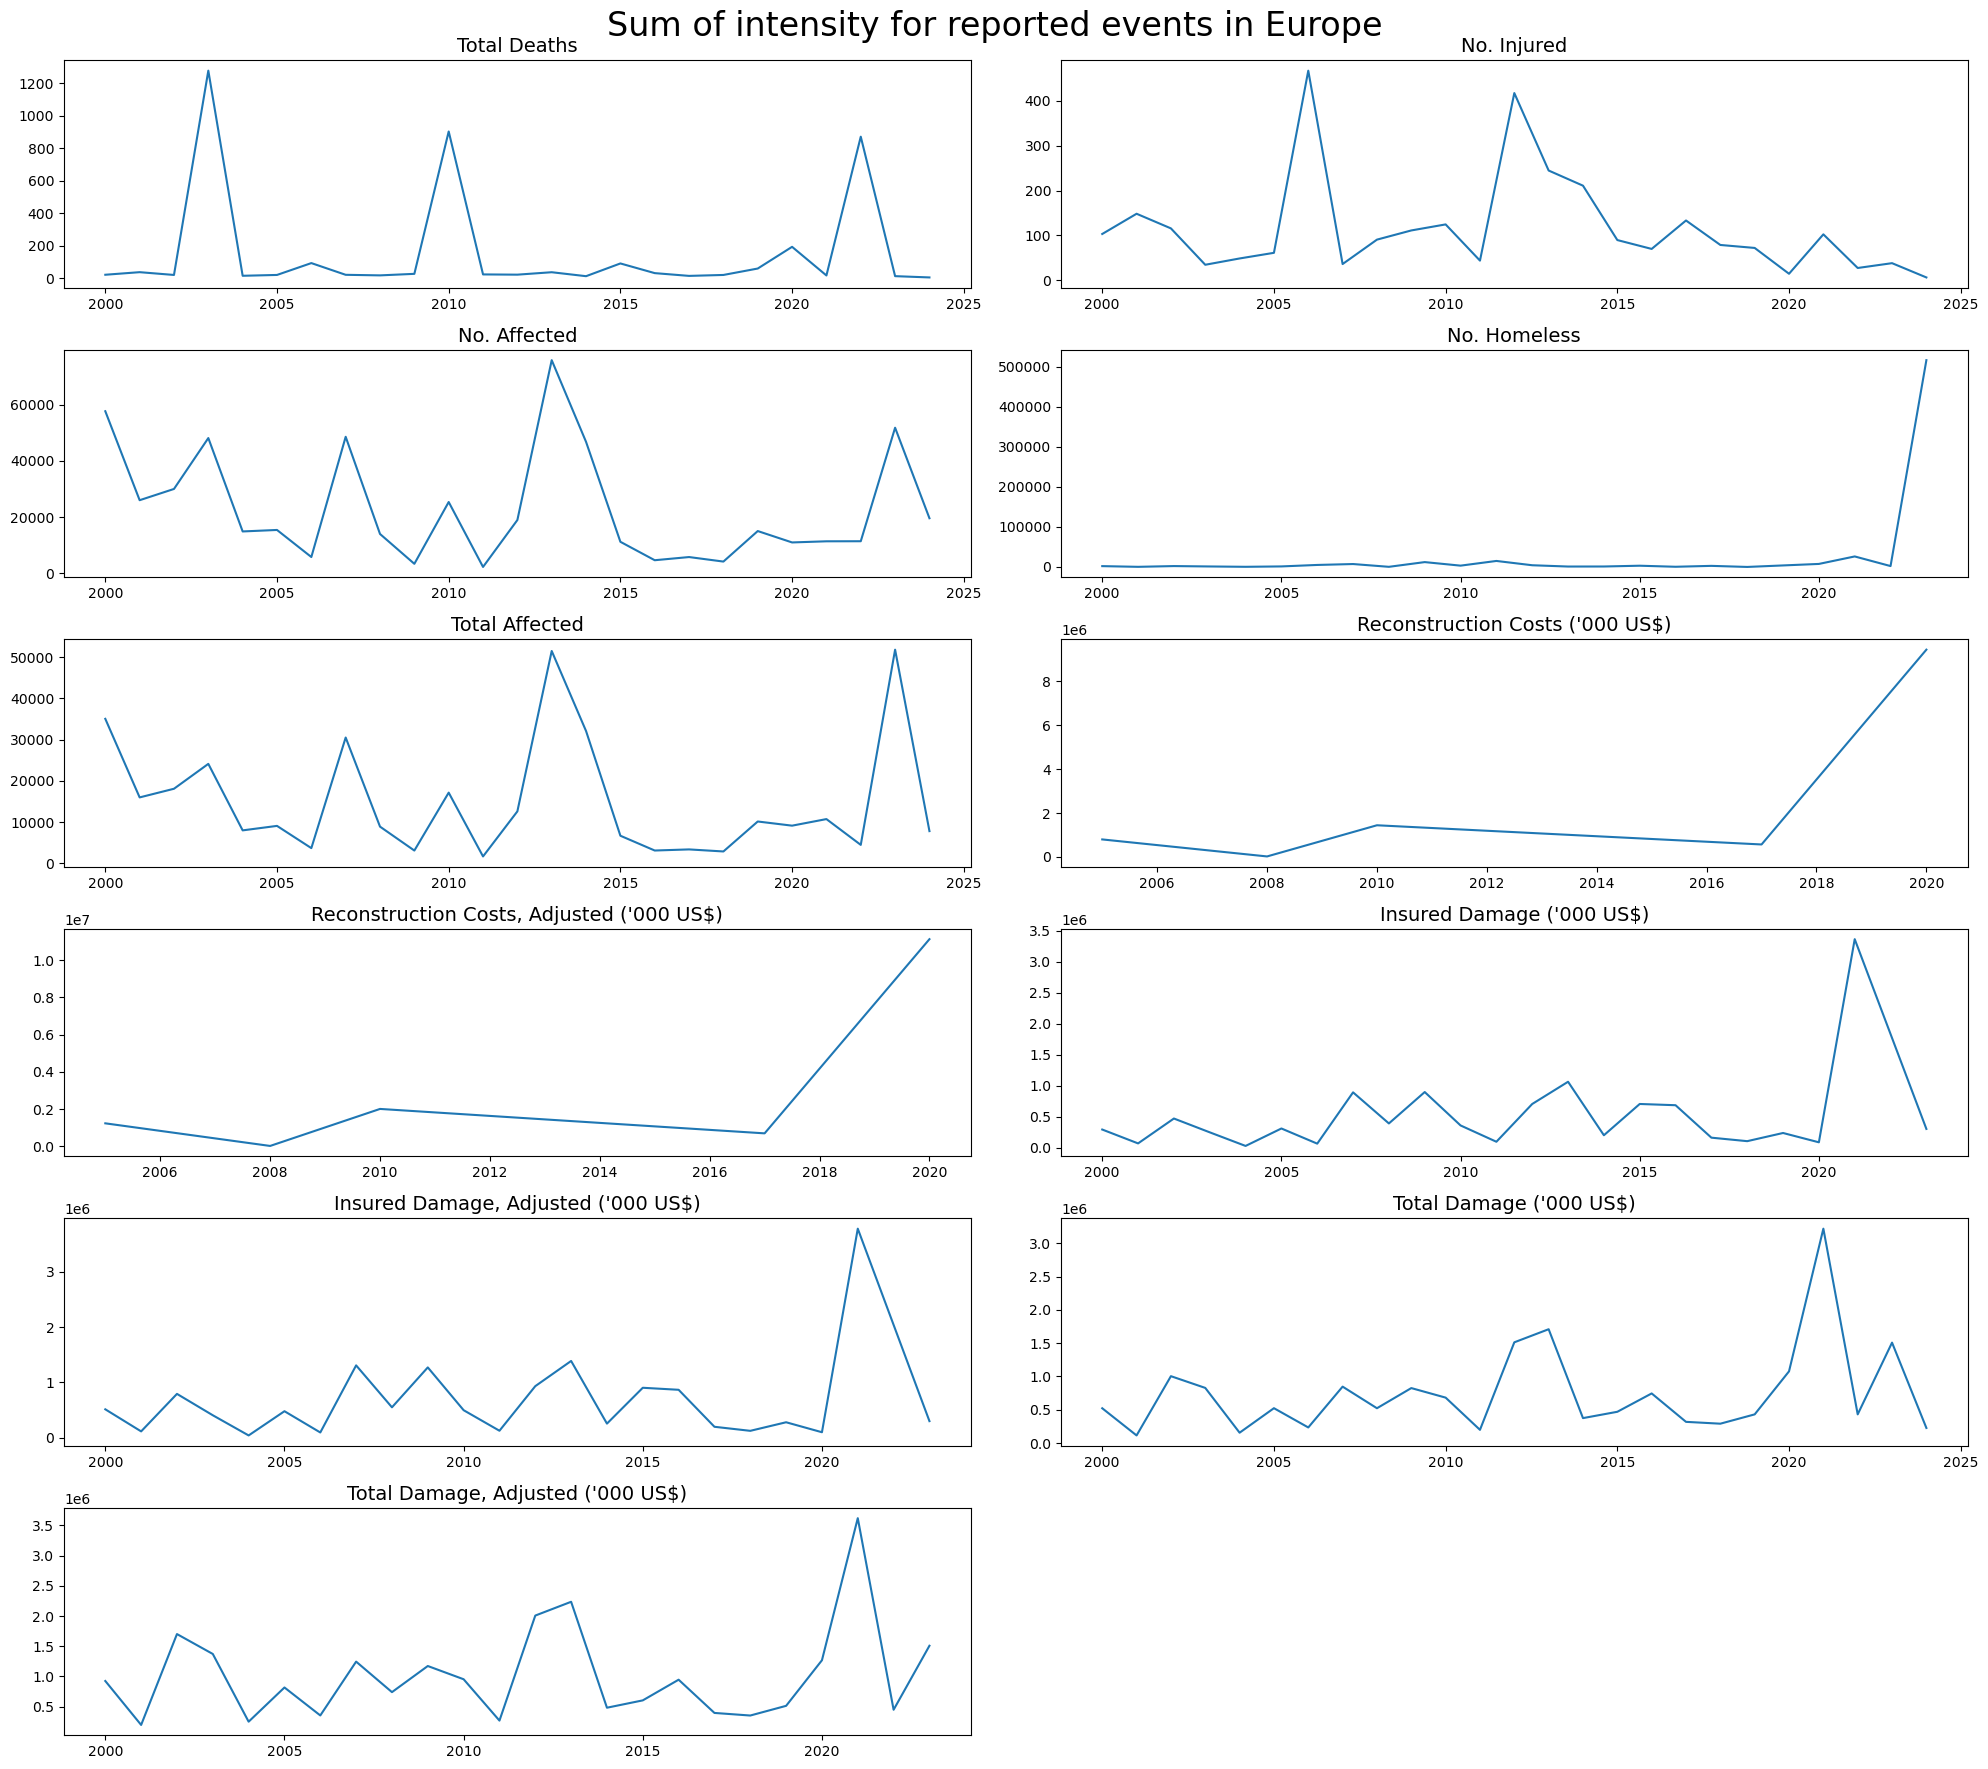

In [18]:
subplots_function( df = intensity_df.query('Region == "Europe"'), var_list = intensity_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "mean", graph_rows =6, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Sum of intensity for reported events in Europe")

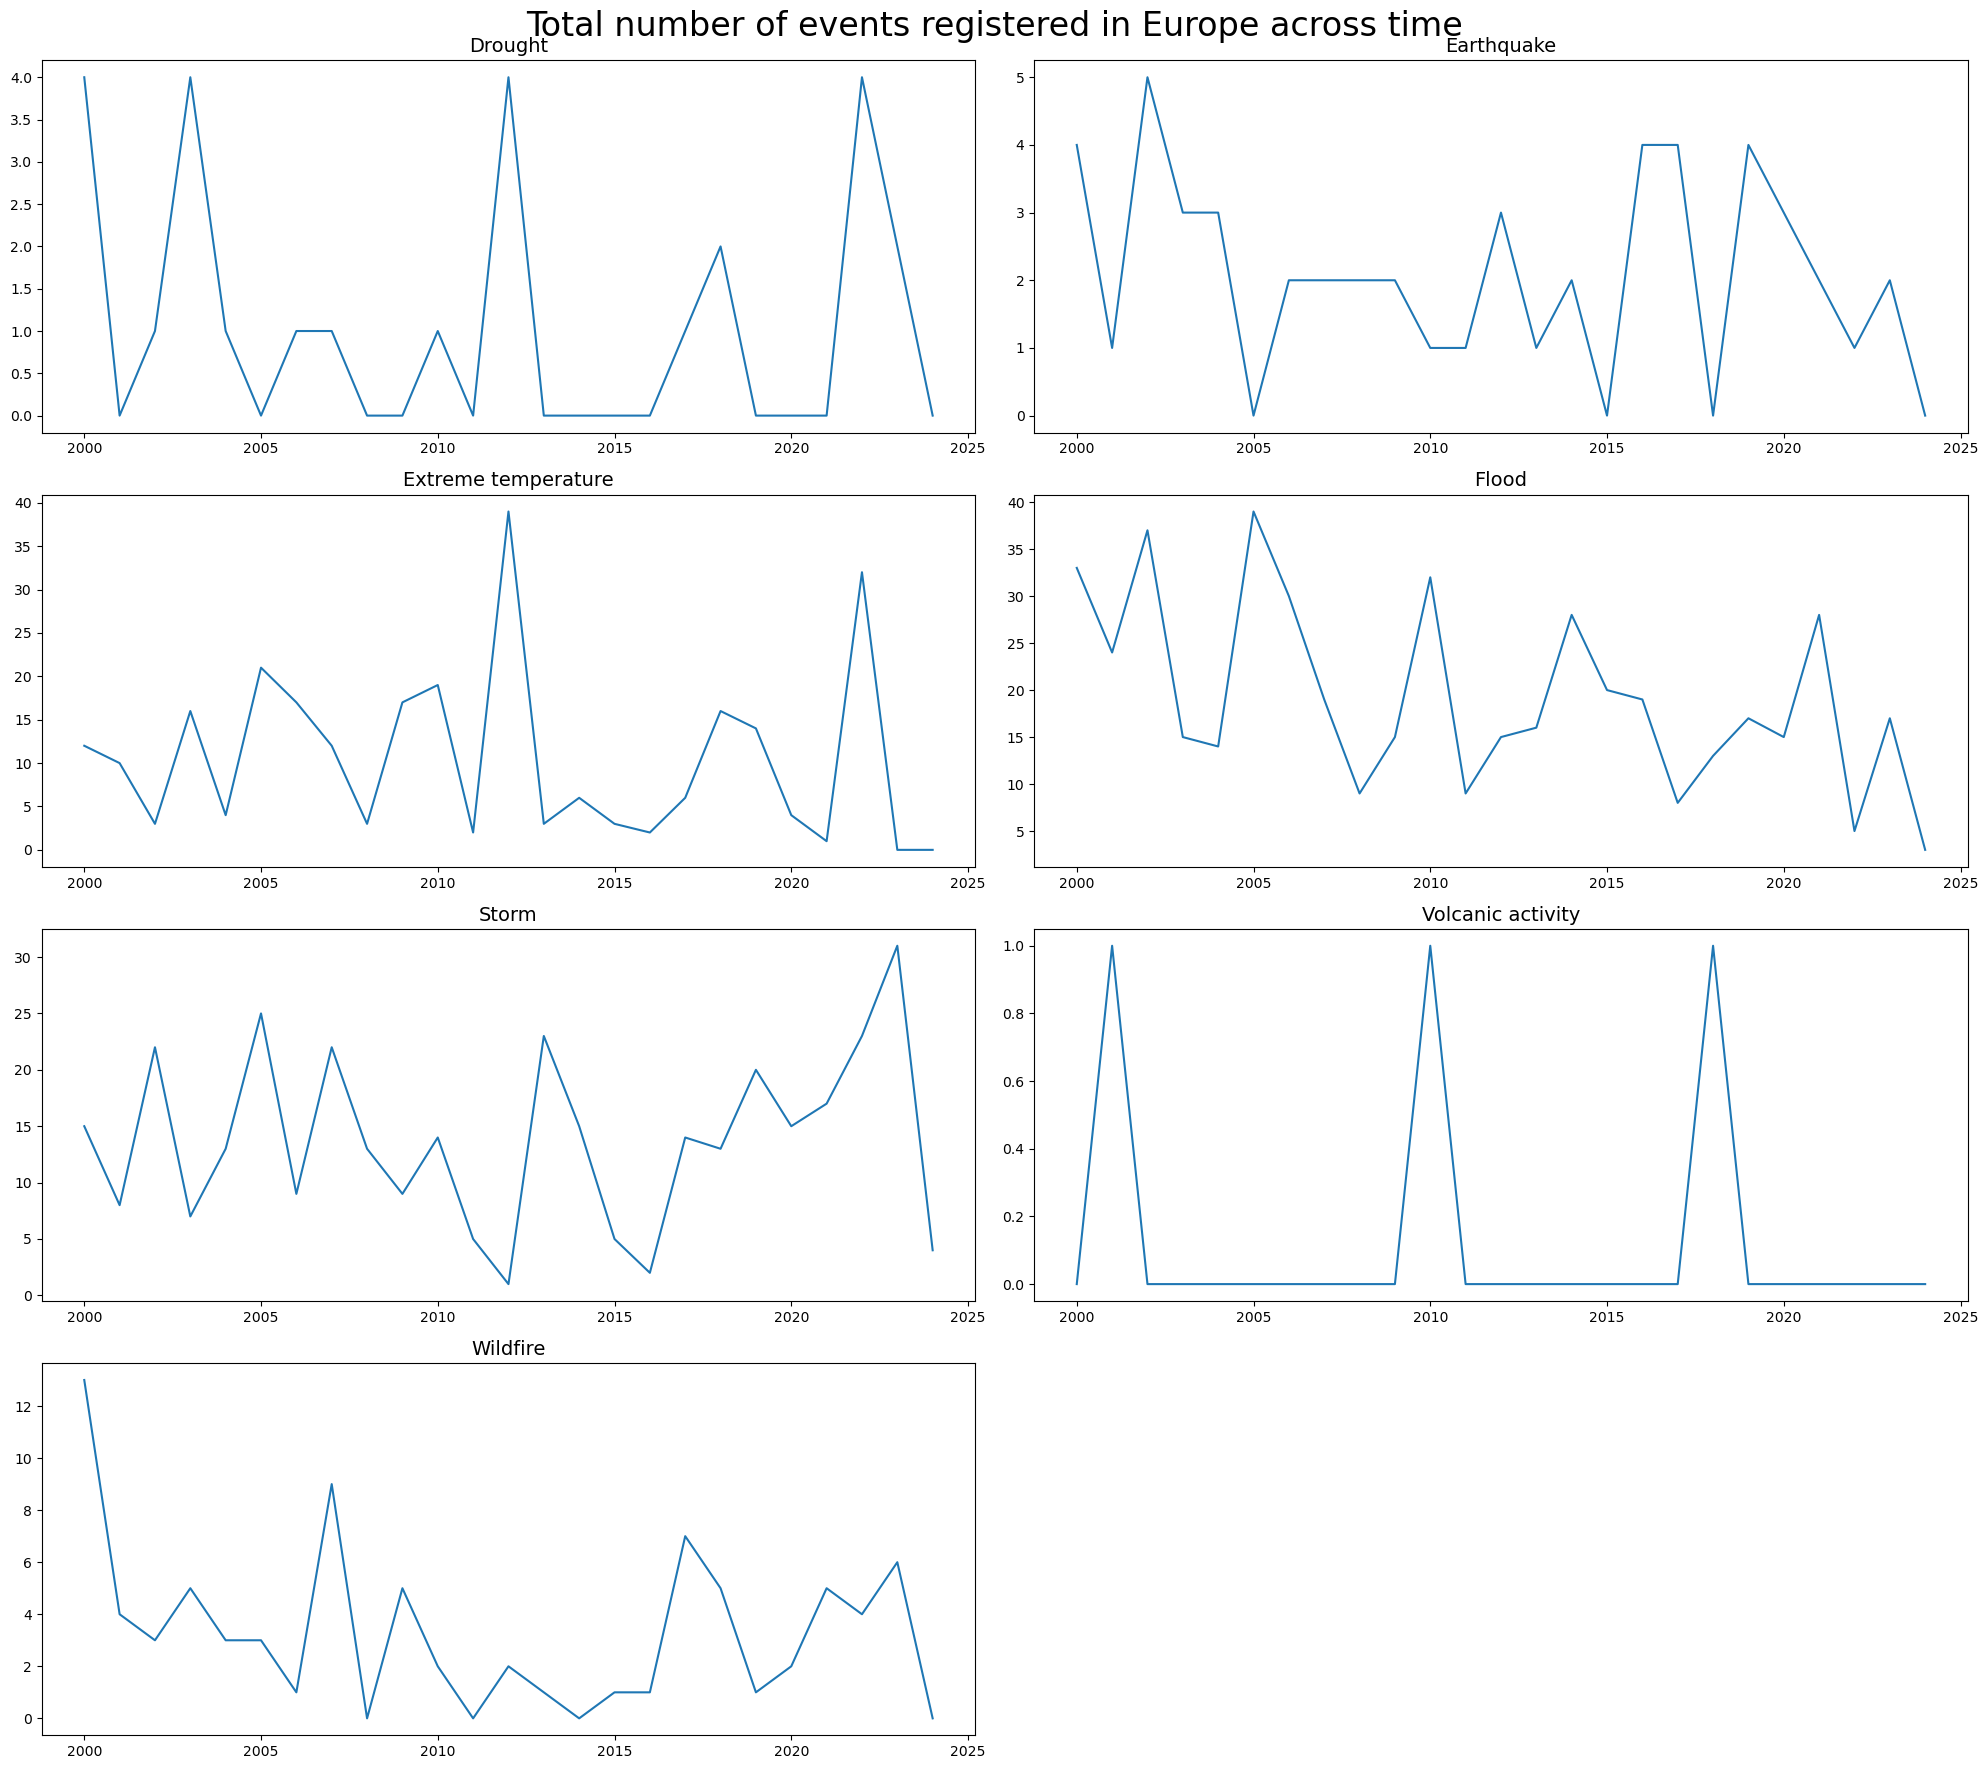

In [19]:
subplots_function( df = probability_df.query('Region == "Europe"'), var_list = probability_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "sum", graph_rows =4, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Total number of events registered in Europe across time")

## 2.3 Africa

In [20]:
#Descriptive statistics Intensity
descriptive_stats_function(df = intensity_df.query('Region == "Africa"'), varlist= intensity_df.describe().columns.values.tolist())

Total Deaths    No. Injured  No. Affected   No. Homeless  \
count      3420.000000    1395.000000  1.751000e+03     330.000000   
mean         67.536842     703.329032  3.035906e+05   13448.633333   
std         463.966742    6704.556536  1.411970e+06   48027.499964   
min           1.000000       1.000000  1.000000e+00      18.000000   
25%          11.000000      10.000000  4.000000e+02     603.000000   
50%          18.000000      25.000000  5.000000e+03    2000.000000   
75%          36.000000      64.000000  5.195250e+04    6865.250000   
max       20000.000000  180000.000000  2.597281e+07  632608.000000   
kurtosis   1150.910988     450.659894  1.447511e+02      90.259843   
skewness     30.198592      19.621401  1.041367e+01       8.321690   

          Total Affected  Reconstruction Costs ('000 US$)  \
count       3.072000e+03                         8.000000   
mean        1.748067e+05                    163391.500000   
std         1.076461e+06                    223917.207653   
min         1.000000e+00                        84.000000   
25%         3.000000e+01                      5775.000000   
50%         5.450000e+02                    113774.000000   
75%         1.131150e+04                    194000.000000   
max         2.597281e+07                    680400.000000   
kurtosis    2.523659e+02                         5.113364   
skewness    1.373693e+01                         2.133153   

          Reconstruction Costs, Adjusted ('000 US$)  \
count                                      8.000000   
mean                                  183848.250000   
std                                   225559.480433   
min                                      131.000000   
25%                                     8197.750000   
50%                                   146393.000000   
75%                                   241156.000000   
max                                   680400.000000   
kurtosis                                   3.568550   
skewness                                   1.743843   

          Insured Damage ('000 US$)  Insured Damage, Adjusted ('000 US$)  \
count                  1.400000e+01                         1.400000e+01   
mean                   2.500357e+05                         2.733140e+05   
std                    4.669261e+05                         4.811512e+05   
min                    1.000000e+03                         1.327000e+03   
25%                    1.975000e+04                         2.746850e+04   
50%                    1.425000e+05                         1.764025e+05   
75%                    1.875000e+05                         2.328000e+05   
max                    1.800000e+06                         1.874095e+06   
kurtosis               1.107509e+01                         1.121160e+01   
skewness               3.226283e+00                         3.239019e+00   

          Total Damage ('000 US$)  Total Damage, Adjusted ('000 US$)  
count                1.880000e+02                       1.870000e+02  
mean                 2.679448e+05                       3.277904e+05  
std                  8.855261e+05                       1.025320e+06  
min                  9.000000e+00                       1.300000e+01  
25%                  5.000000e+03                       6.868500e+03  
50%                  2.500000e+04                       3.173900e+04  
75%                  1.525000e+05                       2.317300e+05  
max                  7.000000e+06                       8.281813e+06  
kurtosis             3.430291e+01                       3.510831e+01  
skewness             5.636820e+00                       5.652120e+00

In [21]:
#Descriptive statistics Probability
descriptive_stats_function(df = probability_df.query('Region == "Africa"'), varlist=['Drought', 'Earthquake', 'Extreme temperature', 'Flood', 'Storm',
       'Volcanic activity', 'Wildfire'])

Drought  Earthquake  Extreme temperature       Flood       Storm  \
count     785.000000  785.000000           785.000000  785.000000  785.000000   
mean        0.215287    0.040764             0.020382    1.224204    0.296815   
std         0.414373    0.216346             0.150144    1.068174    0.646657   
min         0.000000    0.000000             0.000000    0.000000    0.000000   
25%         0.000000    0.000000             0.000000    1.000000    0.000000   
50%         0.000000    0.000000             0.000000    1.000000    0.000000   
75%         0.000000    0.000000             0.000000    2.000000    0.000000   
max         2.000000    2.000000             2.000000    8.000000    6.000000   
kurtosis    0.249168   35.839207            68.439252    5.587526   12.860639   
skewness    1.441853    5.740741             7.900910    1.760039    2.972398   

          Volcanic activity    Wildfire  
count            785.000000  785.000000  
mean               0.014013    0.034395  
std                0.128004    0.189223  
min                0.000000    0.000000  
25%                0.000000    0.000000  
50%                0.000000    0.000000  
75%                0.000000    0.000000  
max                2.000000    2.000000  
kurtosis         112.188250   33.745030  
skewness          10.034449    5.675795

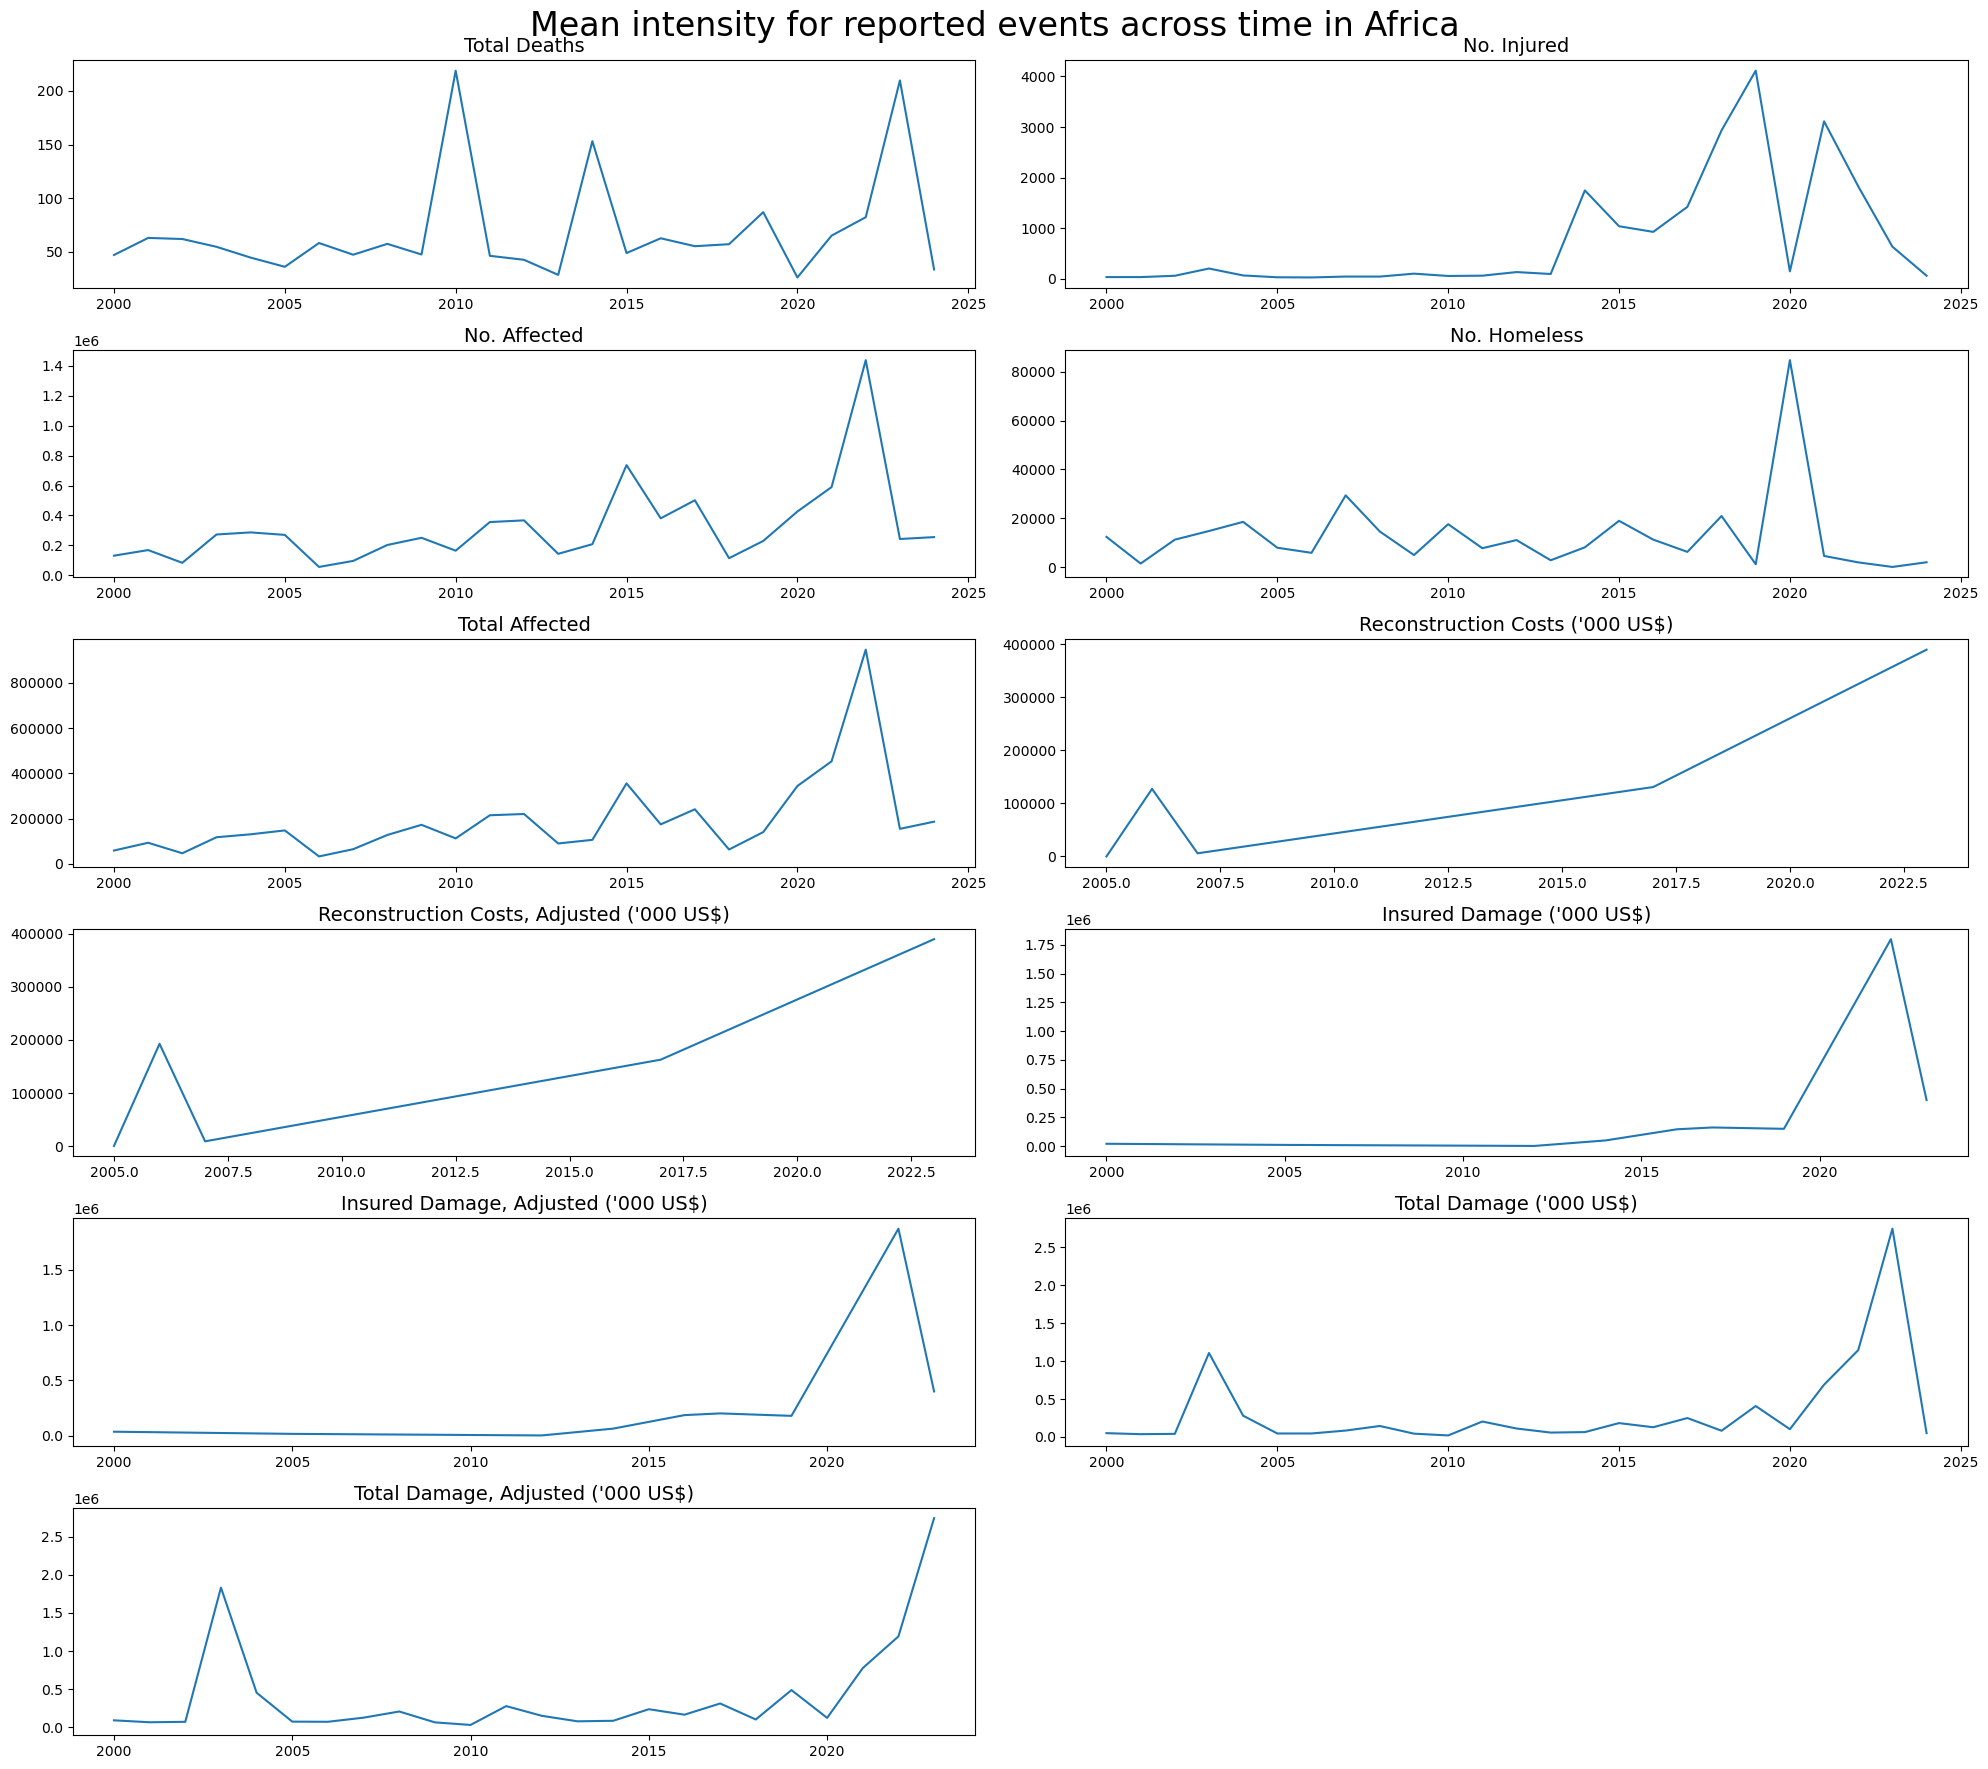

In [22]:
subplots_function( df = intensity_df.query('Region == "Africa"'), var_list = intensity_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "mean", graph_rows =6, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Mean intensity for reported events across time in Africa")

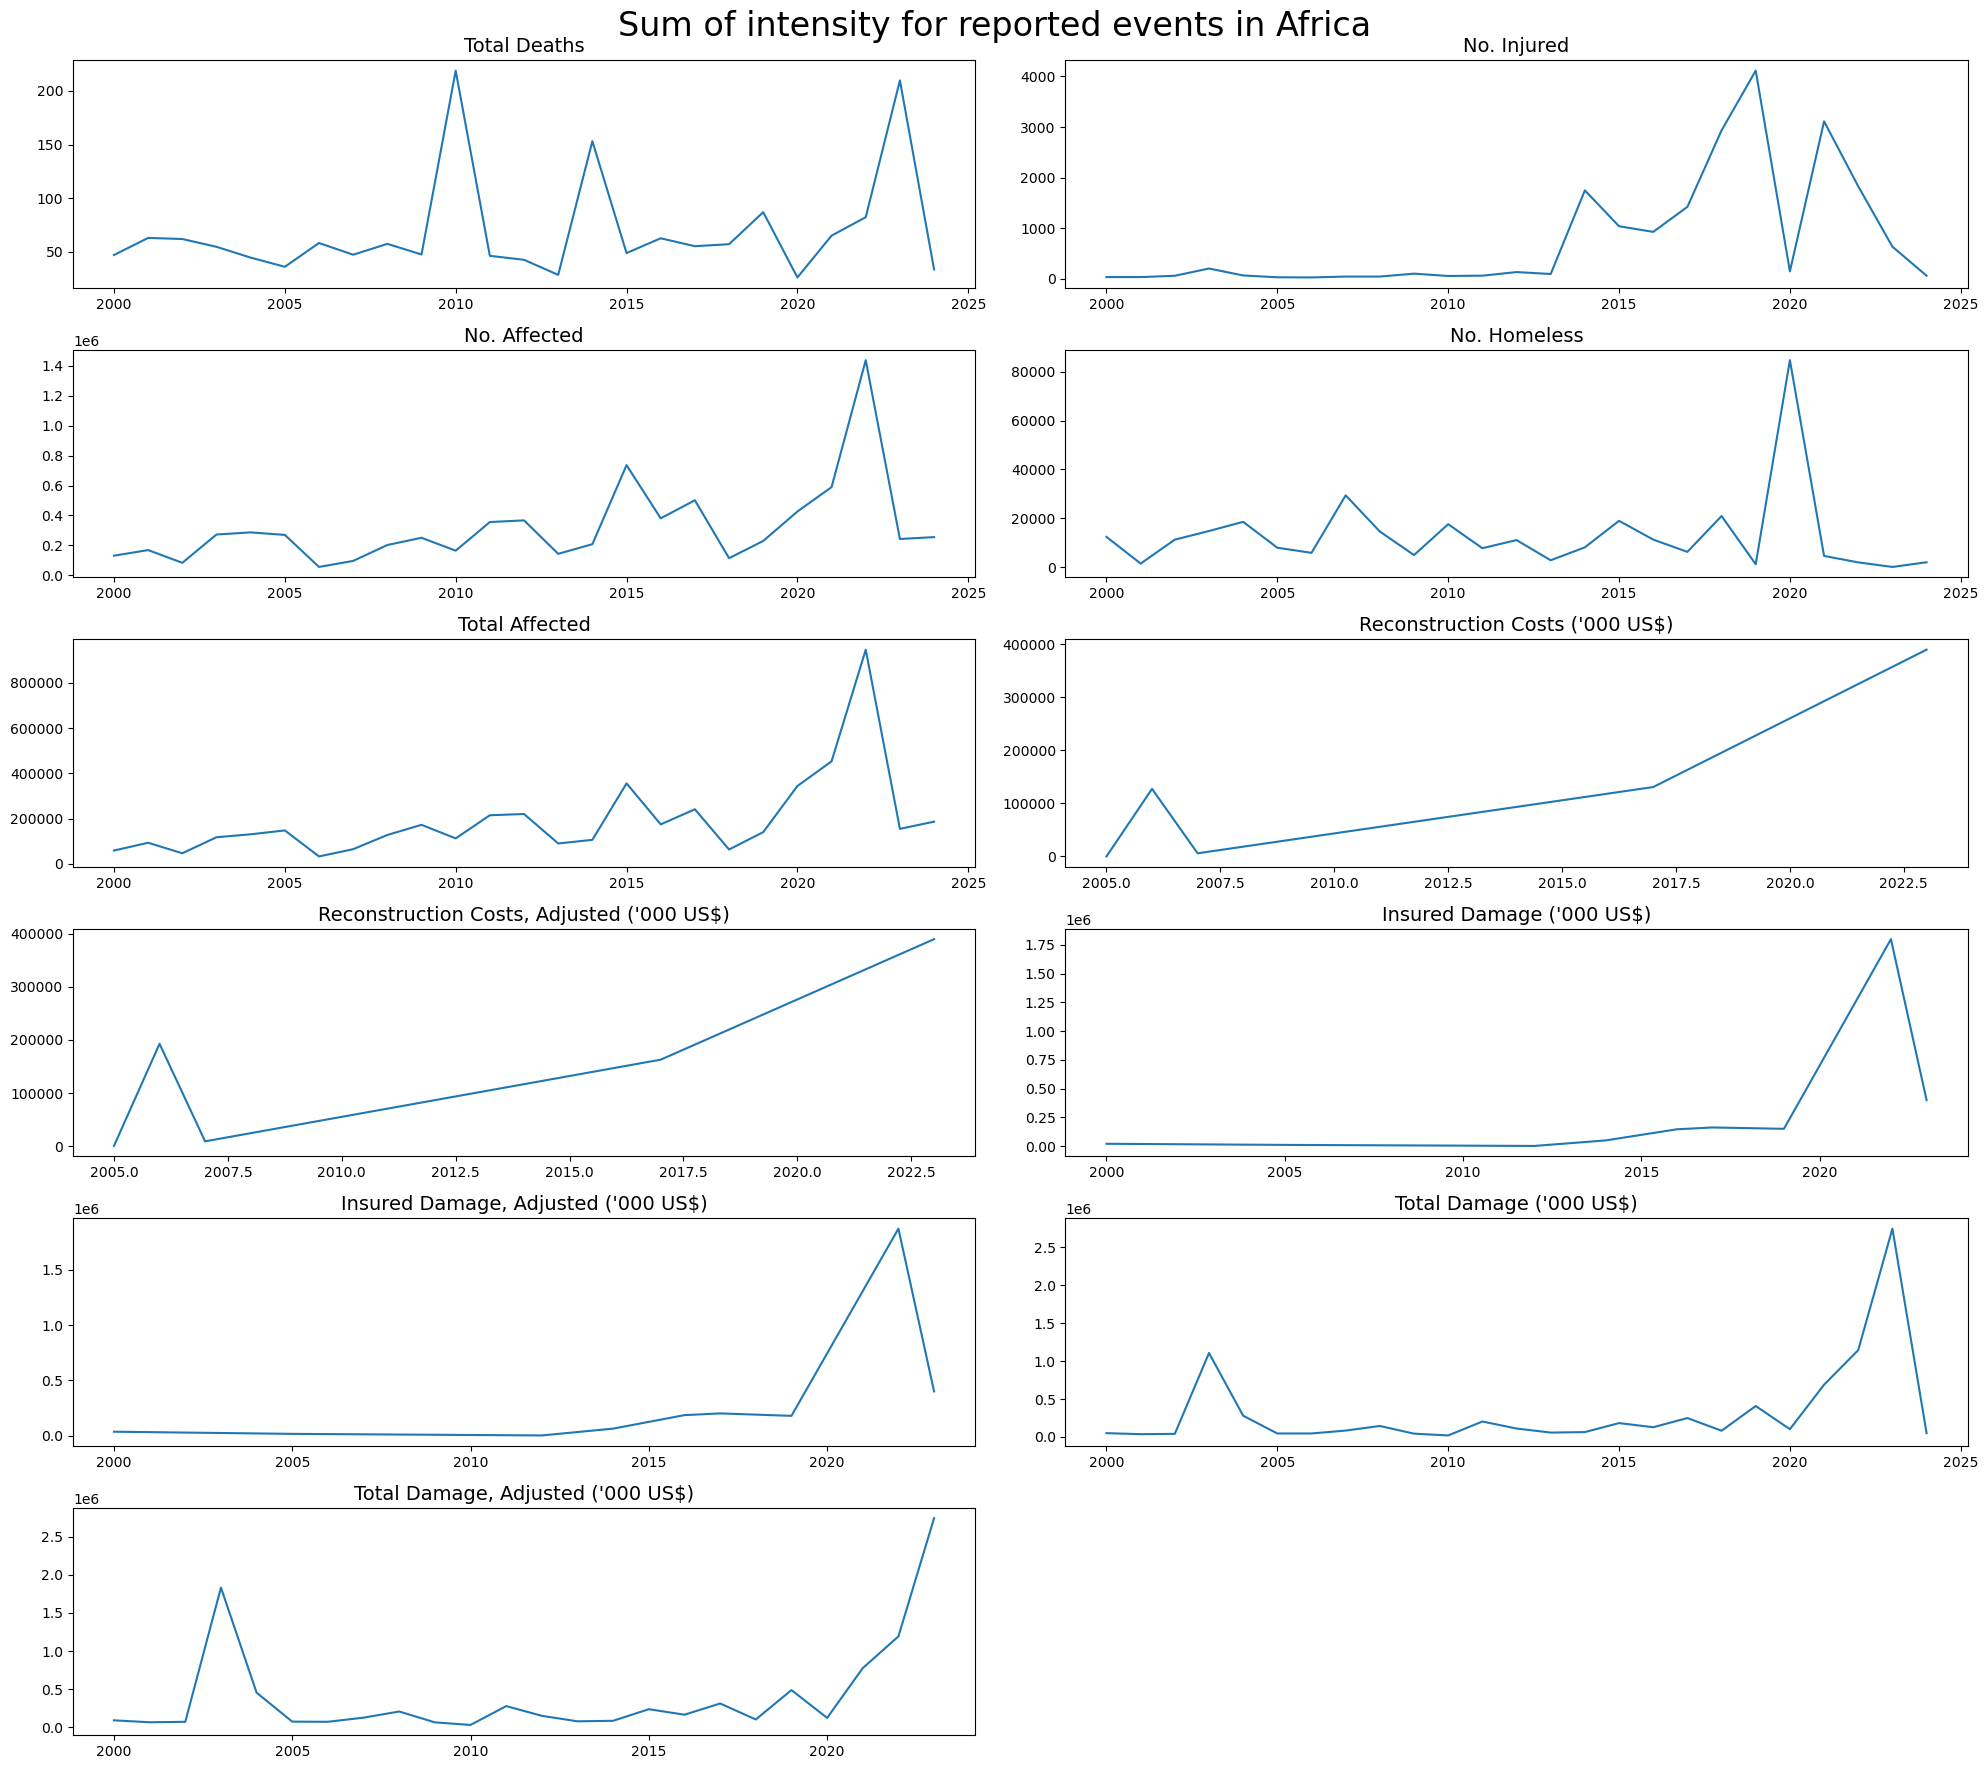

In [23]:
subplots_function( df = intensity_df.query('Region == "Africa"'), var_list = intensity_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "mean", graph_rows =6, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Sum of intensity for reported events in Africa")

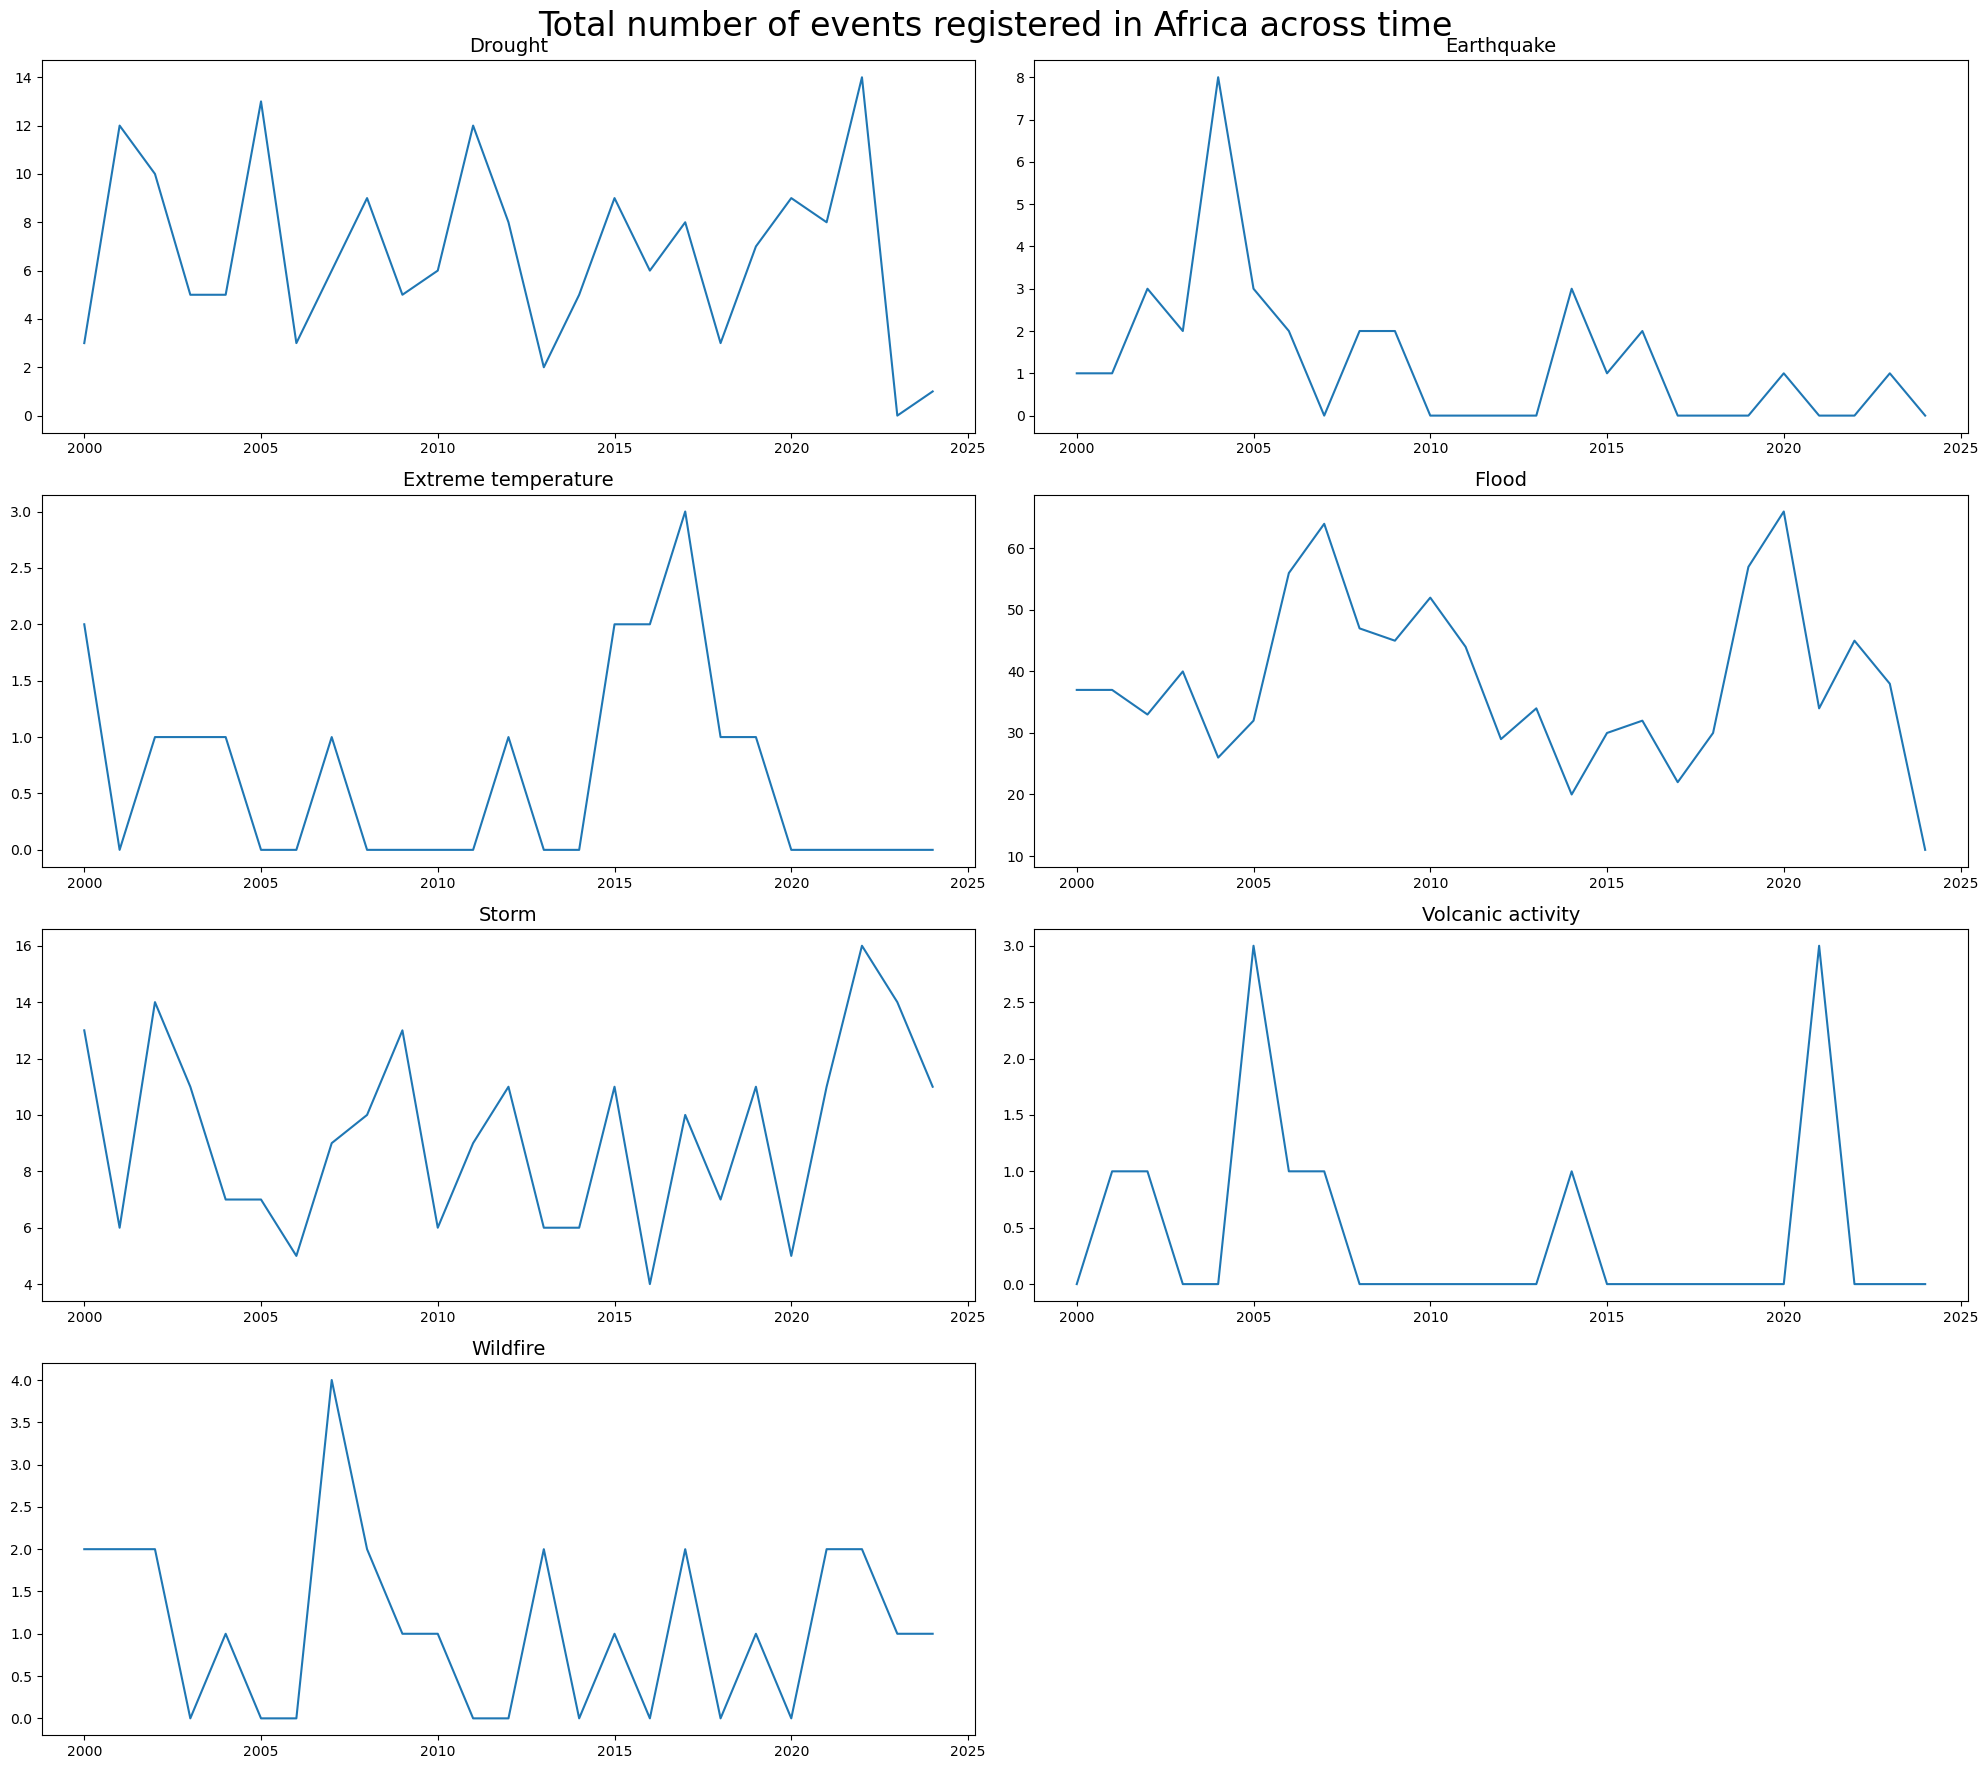

In [24]:
subplots_function( df = probability_df.query('Region == "Africa"'), var_list = probability_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "sum", graph_rows =4, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Total number of events registered in Africa across time")

## 2.4 Oceania

In [25]:
#Descriptive statistics Intensity
descriptive_stats_function(df = intensity_df.query('Region == "Oceania"'), varlist= intensity_df.describe().columns.values.tolist())

Total Deaths  No. Injured  No. Affected  No. Homeless  \
count       188.000000    72.000000  2.650000e+02     49.000000   
mean         20.723404   223.125000  3.326543e+04   1598.489796   
std          44.693826   756.516199  1.669565e+05   2730.259856   
min           1.000000     1.000000  1.000000e+00      9.000000   
25%           2.000000     4.000000  4.000000e+02    114.000000   
50%           5.000000    13.000000  2.500000e+03    348.000000   
75%          16.250000   101.750000  1.100000e+04   1250.000000   
max         347.000000  5617.000000  2.520000e+06  12000.000000   
kurtosis     20.518211    37.601073  1.884400e+02      4.984036   
skewness      4.112939     5.717464  1.289506e+01      2.290353   

          Total Affected  Reconstruction Costs ('000 US$)  \
count       3.190000e+02                              1.0   
mean        2.793019e+04                         183000.0   
std         1.526034e+05                              NaN   
min         1.000000e+00                         183000.0   
25%         3.000000e+02                         183000.0   
50%         1.380000e+03                         183000.0   
75%         9.685000e+03                         183000.0   
max         2.520000e+06                         183000.0   
kurtosis    2.258294e+02                              NaN   
skewness    1.410562e+01                              NaN   

          Reconstruction Costs, Adjusted ('000 US$)  \
count                                           1.0   
mean                                       268929.0   
std                                             NaN   
min                                        268929.0   
25%                                        268929.0   
50%                                        268929.0   
75%                                        268929.0   
max                                        268929.0   
kurtosis                                        NaN   
skewness                                        NaN   

          Insured Damage ('000 US$)  Insured Damage, Adjusted ('000 US$)  \
count                  5.300000e+01                         5.300000e+01   
mean                   8.816566e+05                         1.145624e+06   
std                    1.836498e+06                         2.456177e+06   
min                    1.000000e+04                         1.543400e+04   
25%                    5.000000e+04                         6.709000e+04   
50%                    3.170000e+05                         4.372800e+05   
75%                    9.500000e+05                         1.259551e+06   
max                    1.200000e+07                         1.625515e+07   
kurtosis               2.656169e+01                         2.850571e+01   
skewness               4.730188e+00                         4.940897e+00   

          Total Damage ('000 US$)  Total Damage, Adjusted ('000 US$)  
count                1.670000e+02                       1.660000e+02  
mean                 5.803607e+05                       7.499650e+05  
std                  1.592609e+06                       2.096768e+06  
min                  5.000000e+02                       7.560000e+02  
25%                  2.000000e+04                       2.486100e+04  
50%                  6.000000e+04                       8.826850e+04  
75%                  3.150000e+05                       4.785388e+05  
max                  1.500000e+07                       2.031894e+07  
kurtosis             4.379442e+01                       4.951592e+01  
skewness             5.826390e+00                       6.226979e+00

In [26]:
#Descriptive statistics Probability
descriptive_stats_function(df = probability_df.query('Region == "Oceania"'), varlist=['Drought', 'Earthquake', 'Extreme temperature', 'Flood', 'Storm',
       'Volcanic activity', 'Wildfire'])

Drought  Earthquake  Extreme temperature       Flood       Storm  \
count     178.000000  178.000000           178.000000  178.000000  178.000000   
mean        0.101124    0.146067             0.022472    0.578652    0.842697   
std         0.302343    0.439583             0.148631    1.006754    0.900708   
min         0.000000    0.000000             0.000000    0.000000    0.000000   
25%         0.000000    0.000000             0.000000    0.000000    0.000000   
50%         0.000000    0.000000             0.000000    0.000000    1.000000   
75%         0.000000    0.000000             0.000000    1.000000    1.000000   
max         1.000000    3.000000             1.000000    5.000000    5.000000   
kurtosis    5.179253   14.305810            40.690547    6.070383    2.799159   
skewness    2.668554    3.528758             6.498727    2.369138    1.395457   

          Volcanic activity    Wildfire  
count            178.000000  178.000000  
mean               0.112360    0.134831  
std                0.350567    0.479901  
min                0.000000    0.000000  
25%                0.000000    0.000000  
50%                0.000000    0.000000  
75%                0.000000    0.000000  
max                2.000000    3.000000  
kurtosis          10.627790   17.757539  
skewness           3.238019    4.088053

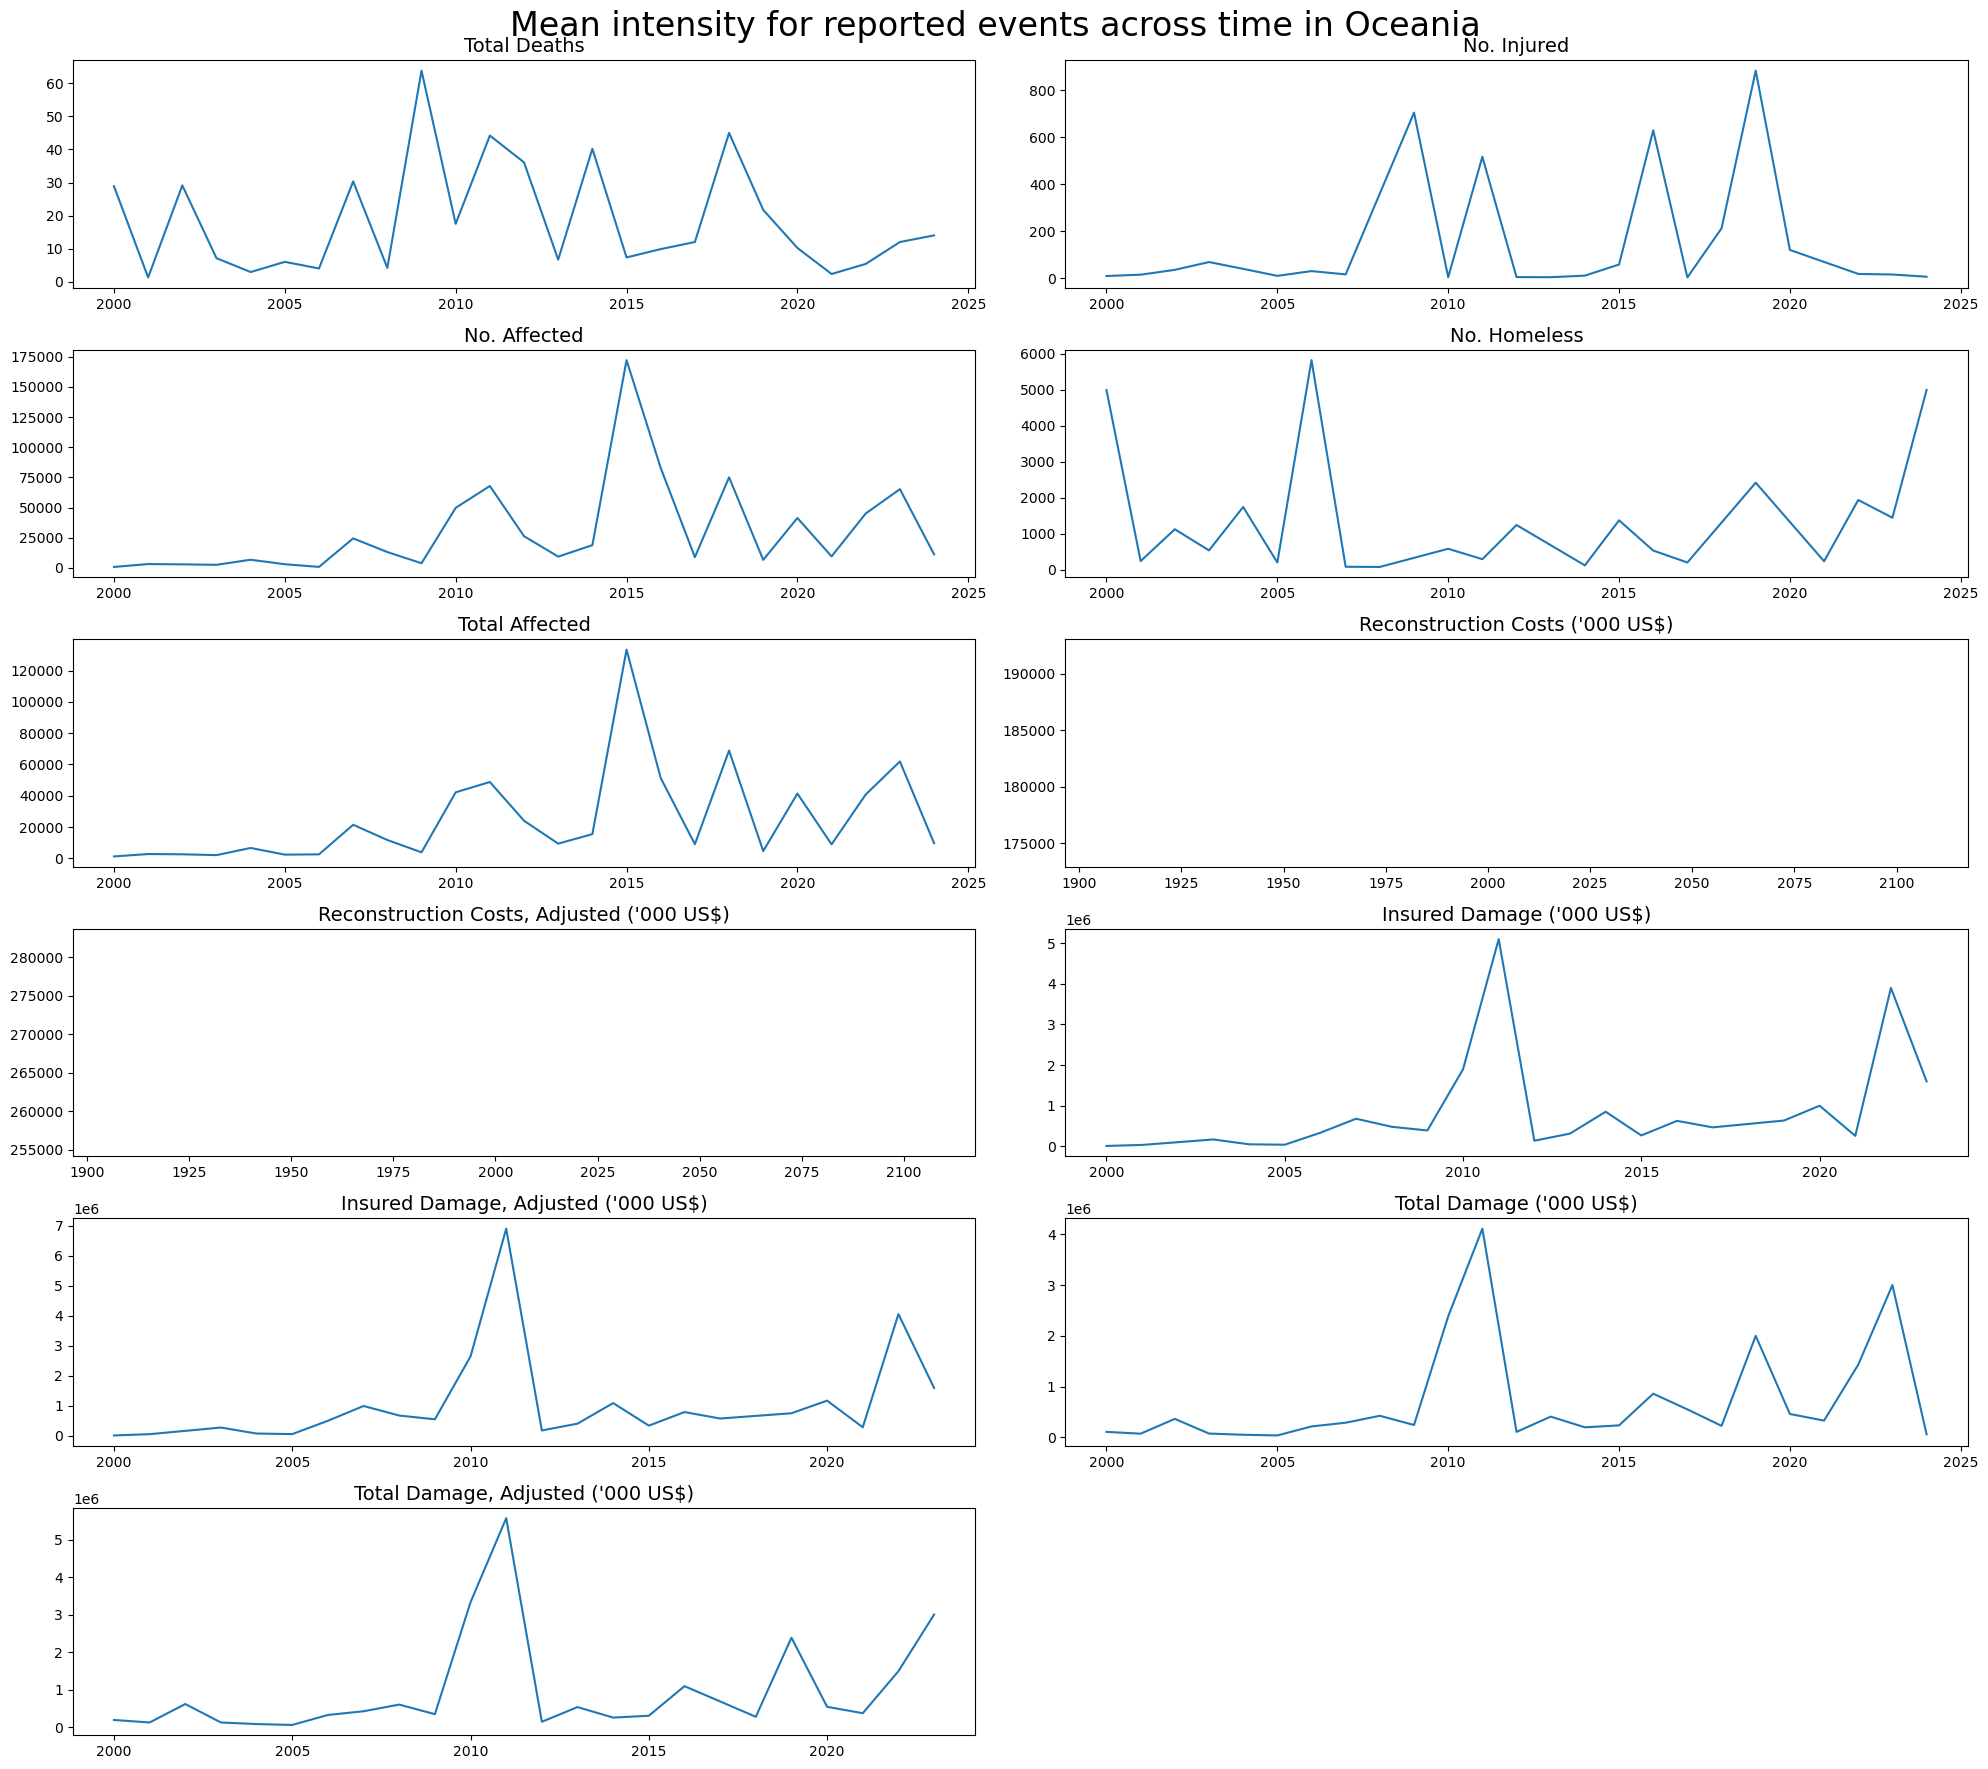

In [27]:
subplots_function( df = intensity_df.query('Region == "Oceania"'), var_list = intensity_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "mean", graph_rows =6, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Mean intensity for reported events across time in Oceania")

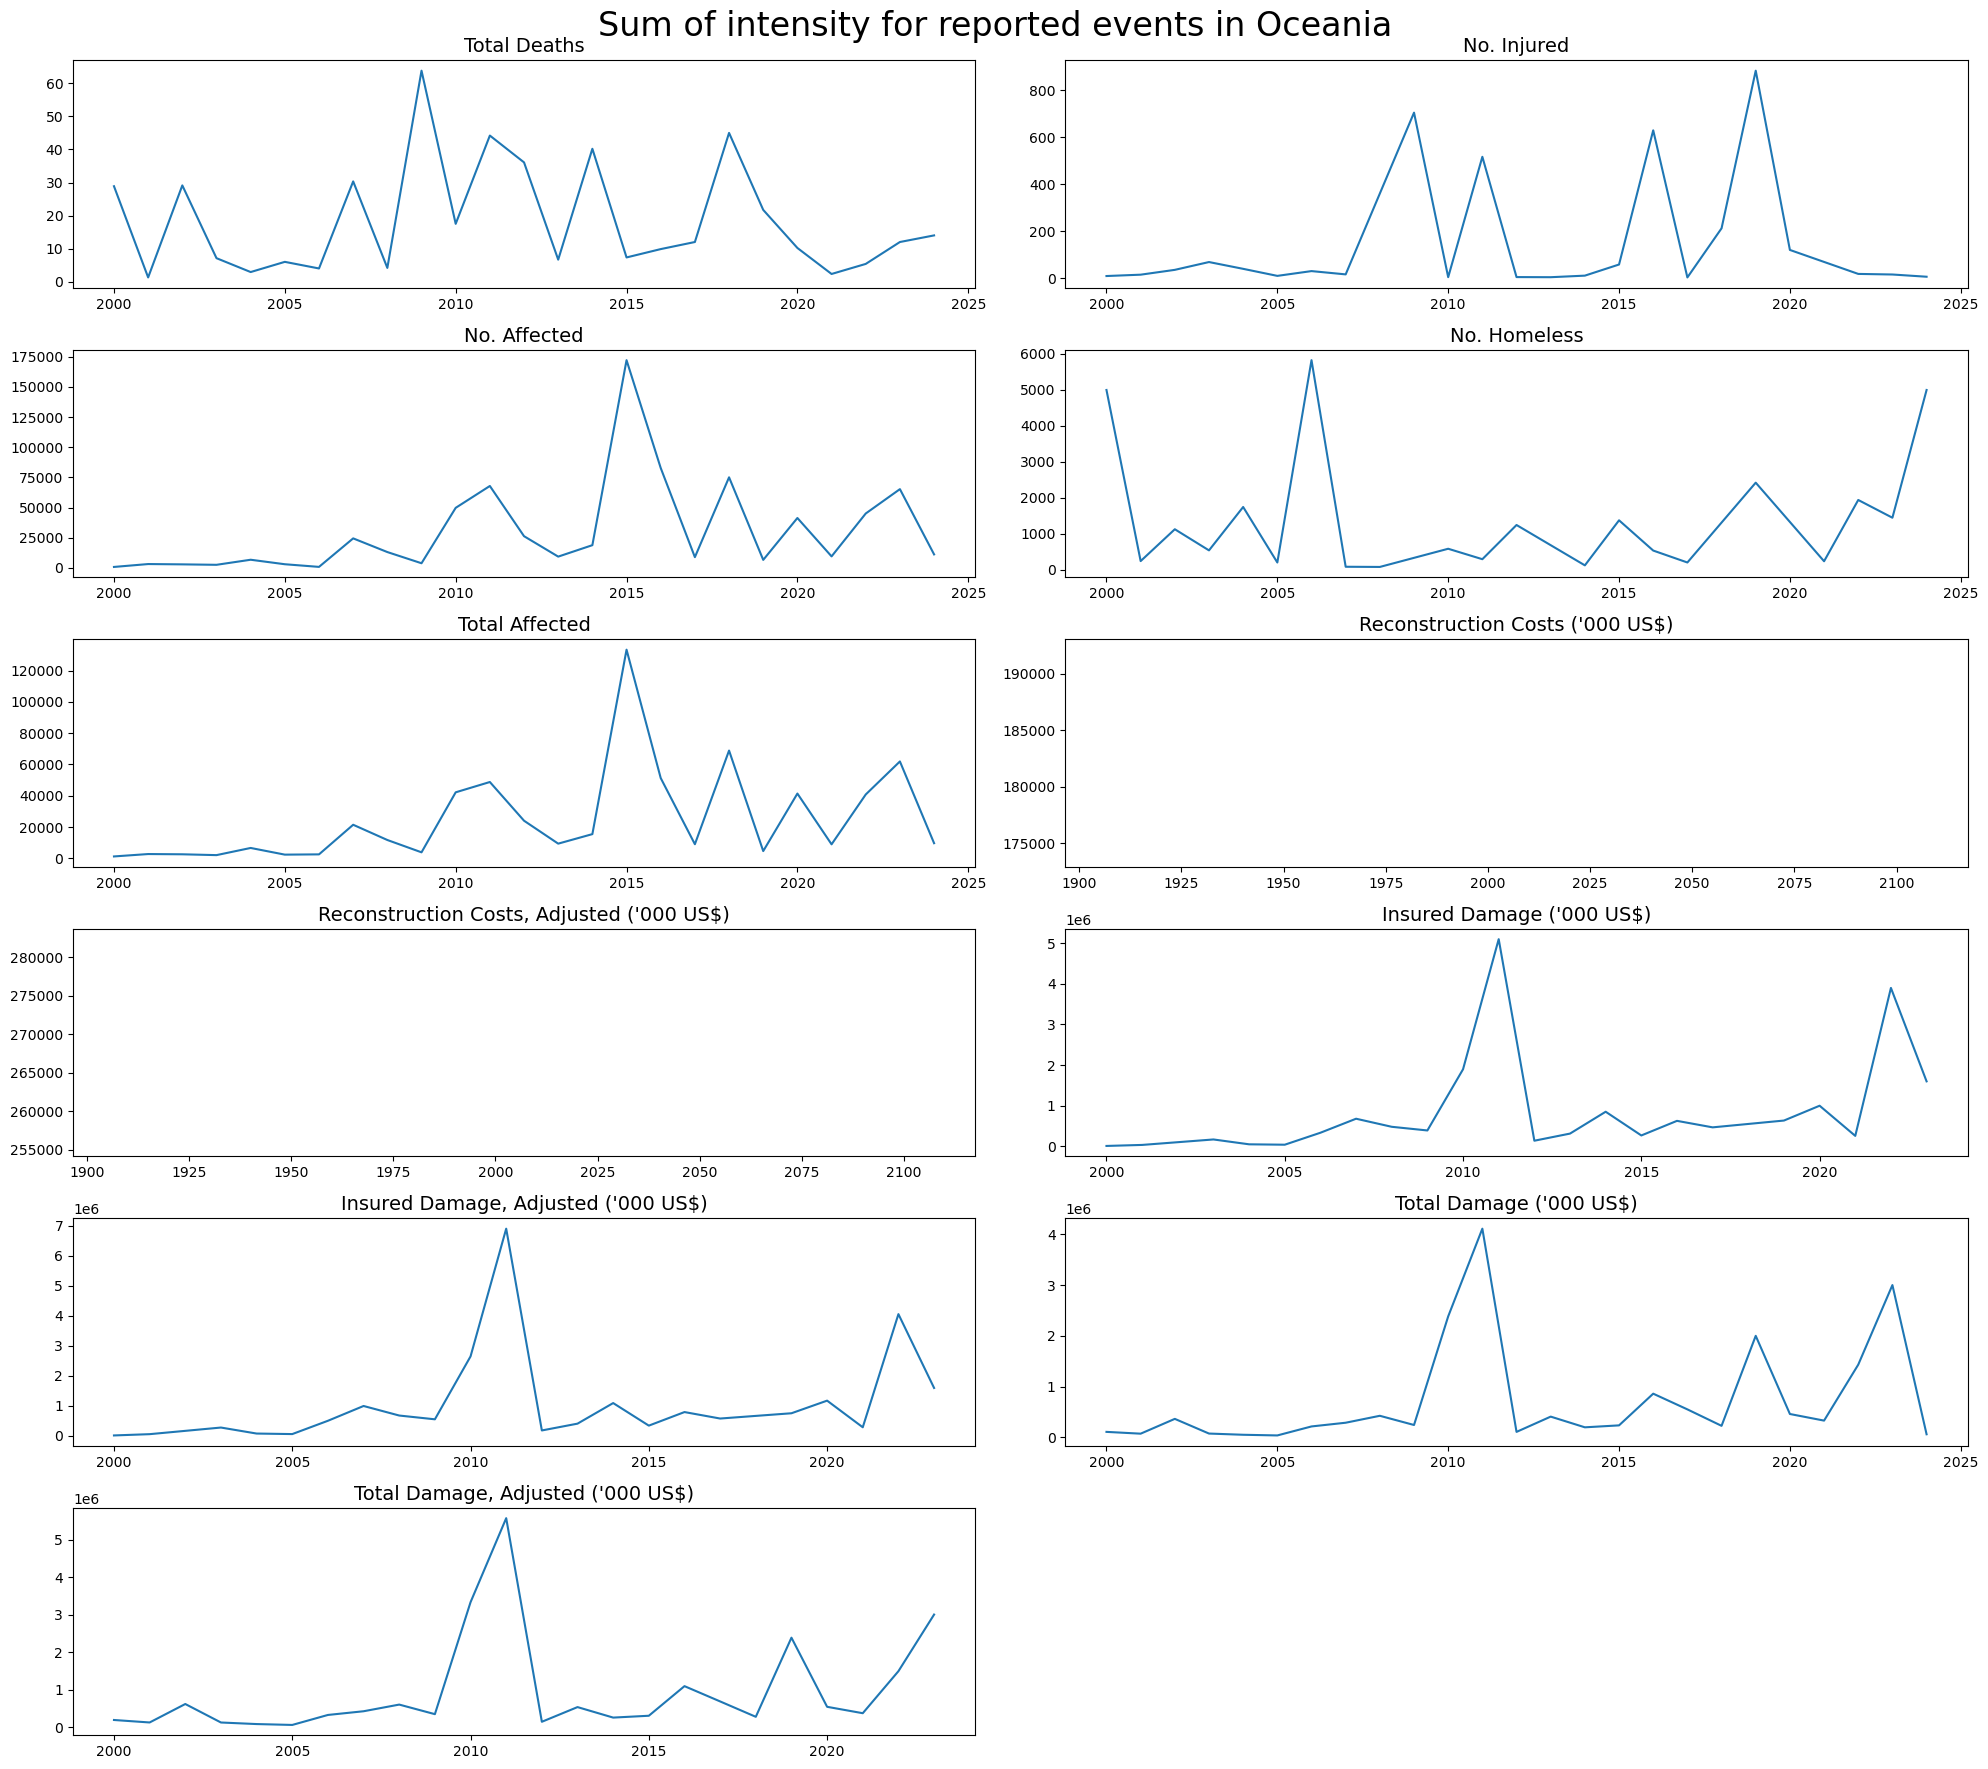

In [28]:
subplots_function( df = intensity_df.query('Region == "Oceania"'), var_list = intensity_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "mean", graph_rows =6, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Sum of intensity for reported events in Oceania")

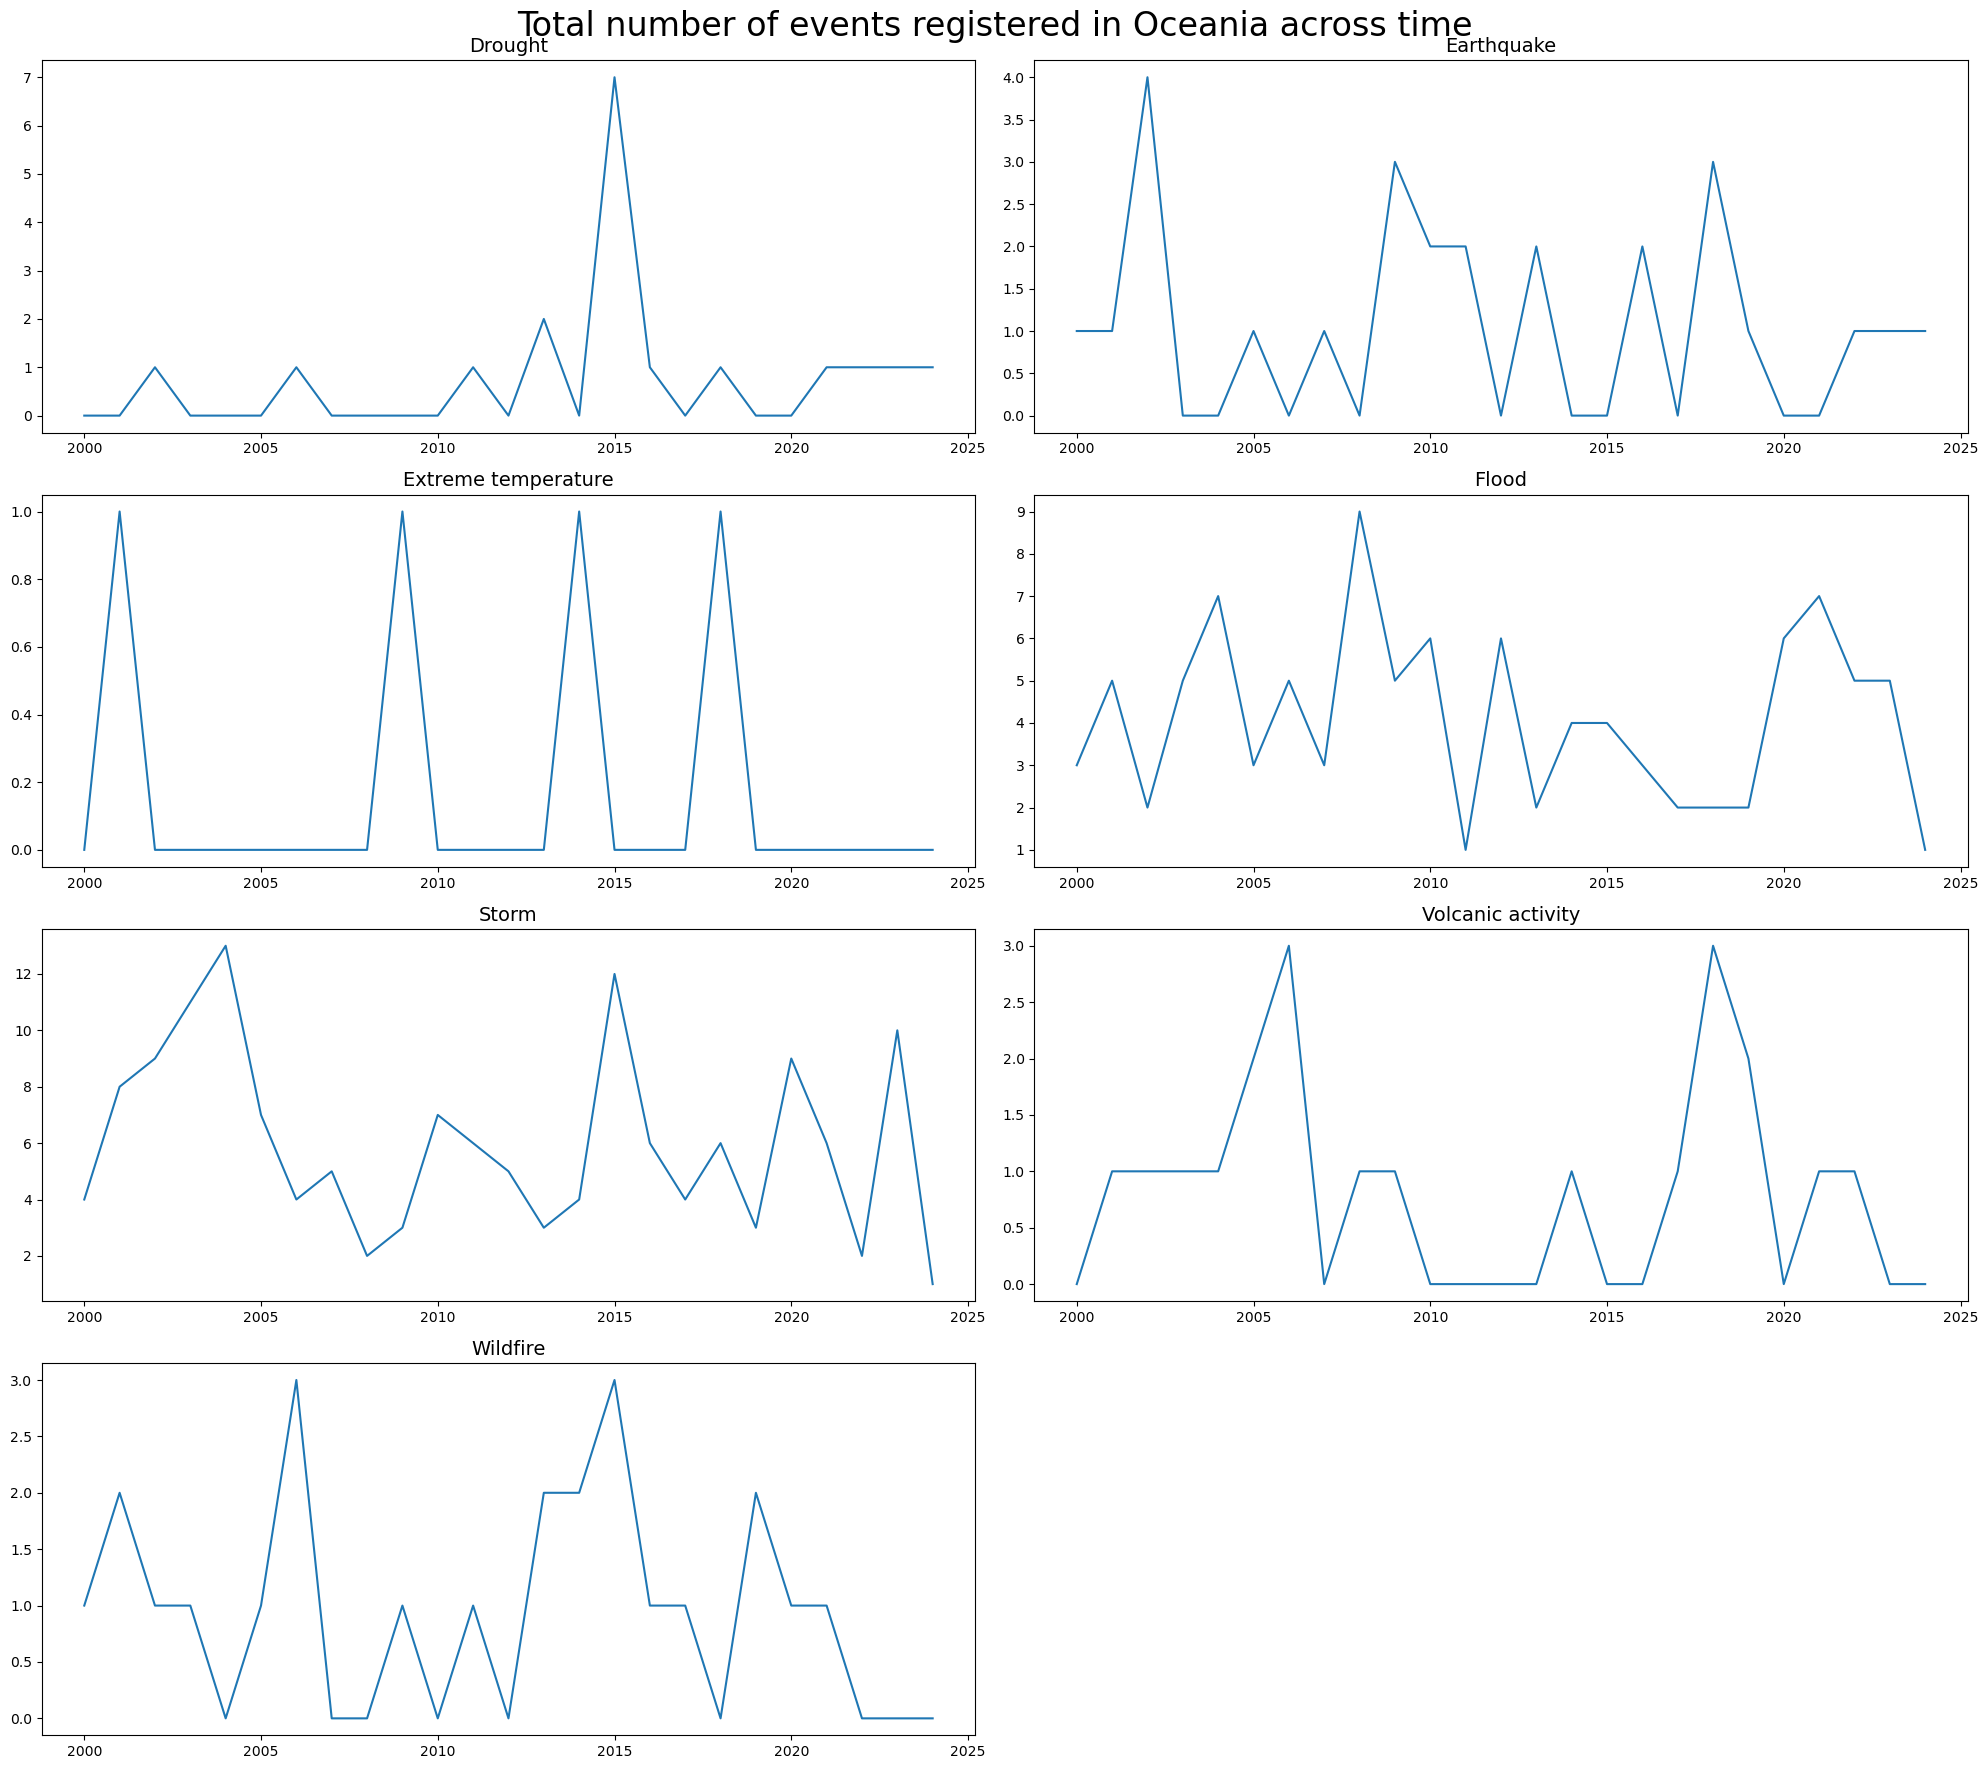

In [29]:
subplots_function( df = probability_df.query('Region == "Oceania"'), var_list = probability_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "sum", graph_rows =4, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Total number of events registered in Oceania across time")

## 2.5 Americas

In [30]:
#Descriptive statistics Intensity
descriptive_stats_function(df = intensity_df.query('Region == "Americas"'), varlist= intensity_df.describe().columns.values.tolist())

Total Deaths   No. Injured  No. Affected   No. Homeless  \
count       2313.000000  1.039000e+03  1.588000e+03     308.000000   
mean         129.552097  2.789604e+03  1.954394e+05   10564.996753   
std         4630.991624  5.747126e+04  2.315057e+06   53369.904422   
min            0.000000  1.000000e+00  1.000000e+00       5.000000   
25%            4.000000  1.000000e+01  7.500000e+02     176.250000   
50%           12.000000  2.400000e+01  5.045000e+03     738.000000   
75%           23.000000  6.000000e+01  3.462500e+04    3001.000000   
max       222570.000000  1.800000e+06  8.500000e+07  800000.000000   
kurtosis    2305.330339  9.248398e+02  1.148063e+03     160.241523   
skewness      47.975734  2.976916e+01  3.219203e+01      11.577643   

          Total Affected  Reconstruction Costs ('000 US$)  \
count       2.363000e+03                     1.100000e+01   
mean        1.339442e+05                     2.710416e+06   
std         1.900964e+06                     4.306142e+06   
min         1.000000e+00                     1.510000e+03   
25%         1.000000e+02                     1.390000e+05   
50%         1.428000e+03                     5.380000e+05   
75%         1.419350e+04                     2.661032e+06   
max         8.500001e+07                     1.150000e+07   
kurtosis    1.701138e+03                     1.480916e+00   
skewness    3.914938e+01                     1.704809e+00   

          Reconstruction Costs, Adjusted ('000 US$)  \
count                                  1.100000e+01   
mean                                   3.688026e+06   
std                                    6.030343e+06   
min                                    1.975000e+03   
25%                                    1.727875e+05   
50%                                    7.613920e+05   
75%                                    3.234844e+06   
max                                    1.606962e+07   
kurtosis                               1.605426e+00   
skewness                               1.749795e+00   

          Insured Damage ('000 US$)  Insured Damage, Adjusted ('000 US$)  \
count                  3.370000e+02                         3.360000e+02   
mean                   1.930766e+06                         2.527218e+06   
std                    6.029961e+06                         7.816926e+06   
min                    1.620000e+02                         2.010000e+02   
25%                    2.000000e+05                         2.486150e+05   
50%                    4.500000e+05                         6.053475e+05   
75%                    1.280000e+06                         1.713500e+06   
max                    6.000000e+07                         9.361435e+07   
kurtosis               5.660235e+01                         6.904015e+01   
skewness               6.932085e+00                         7.416835e+00   

          Total Damage ('000 US$)  Total Damage, Adjusted ('000 US$)  
count                9.260000e+02                       9.190000e+02  
mean                 1.802240e+06                       2.326302e+06  
std                  7.757838e+06                       1.023177e+07  
min                  1.000000e+01                       1.700000e+01  
25%                  3.425000e+04                       4.505100e+04  
50%                  2.300000e+05                       3.107680e+05  
75%                  1.200000e+06                       1.465695e+06  
max                  1.250000e+08                       1.950299e+08  
kurtosis             1.325760e+02                       1.755065e+02  
skewness             1.060027e+01                       1.176442e+01

In [31]:
#Descriptive statistics Probability
descriptive_stats_function(df = probability_df.query('Region == "Americas"'), varlist=['Drought', 'Earthquake', 'Extreme temperature', 'Flood', 'Storm',
       'Volcanic activity', 'Wildfire'])

Drought  Earthquake  Extreme temperature       Flood       Storm  \
count     606.000000  606.000000           606.000000  606.000000  606.000000   
mean        0.163366    0.171617             0.115512    1.462046    1.325083   
std         0.378834    0.445643             0.330074    1.737590    2.978978   
min         0.000000    0.000000             0.000000    0.000000    0.000000   
25%         0.000000    0.000000             0.000000    0.000000    0.000000   
50%         0.000000    0.000000             0.000000    1.000000    1.000000   
75%         0.000000    0.000000             0.000000    2.000000    1.000000   
max         2.000000    3.000000             2.000000   12.000000   23.000000   
kurtosis    2.631362    7.789838             6.226824    9.312340   20.025690   
skewness    2.007180    2.755887             2.685037    2.510631    4.309839   

          Volcanic activity    Wildfire  
count            606.000000  606.000000  
mean               0.072607    0.217822  
std                0.306420    0.772725  
min                0.000000    0.000000  
25%                0.000000    0.000000  
50%                0.000000    0.000000  
75%                0.000000    0.000000  
max                3.000000    8.000000  
kurtosis          28.302191   38.107933  
skewness           4.922217    5.490815

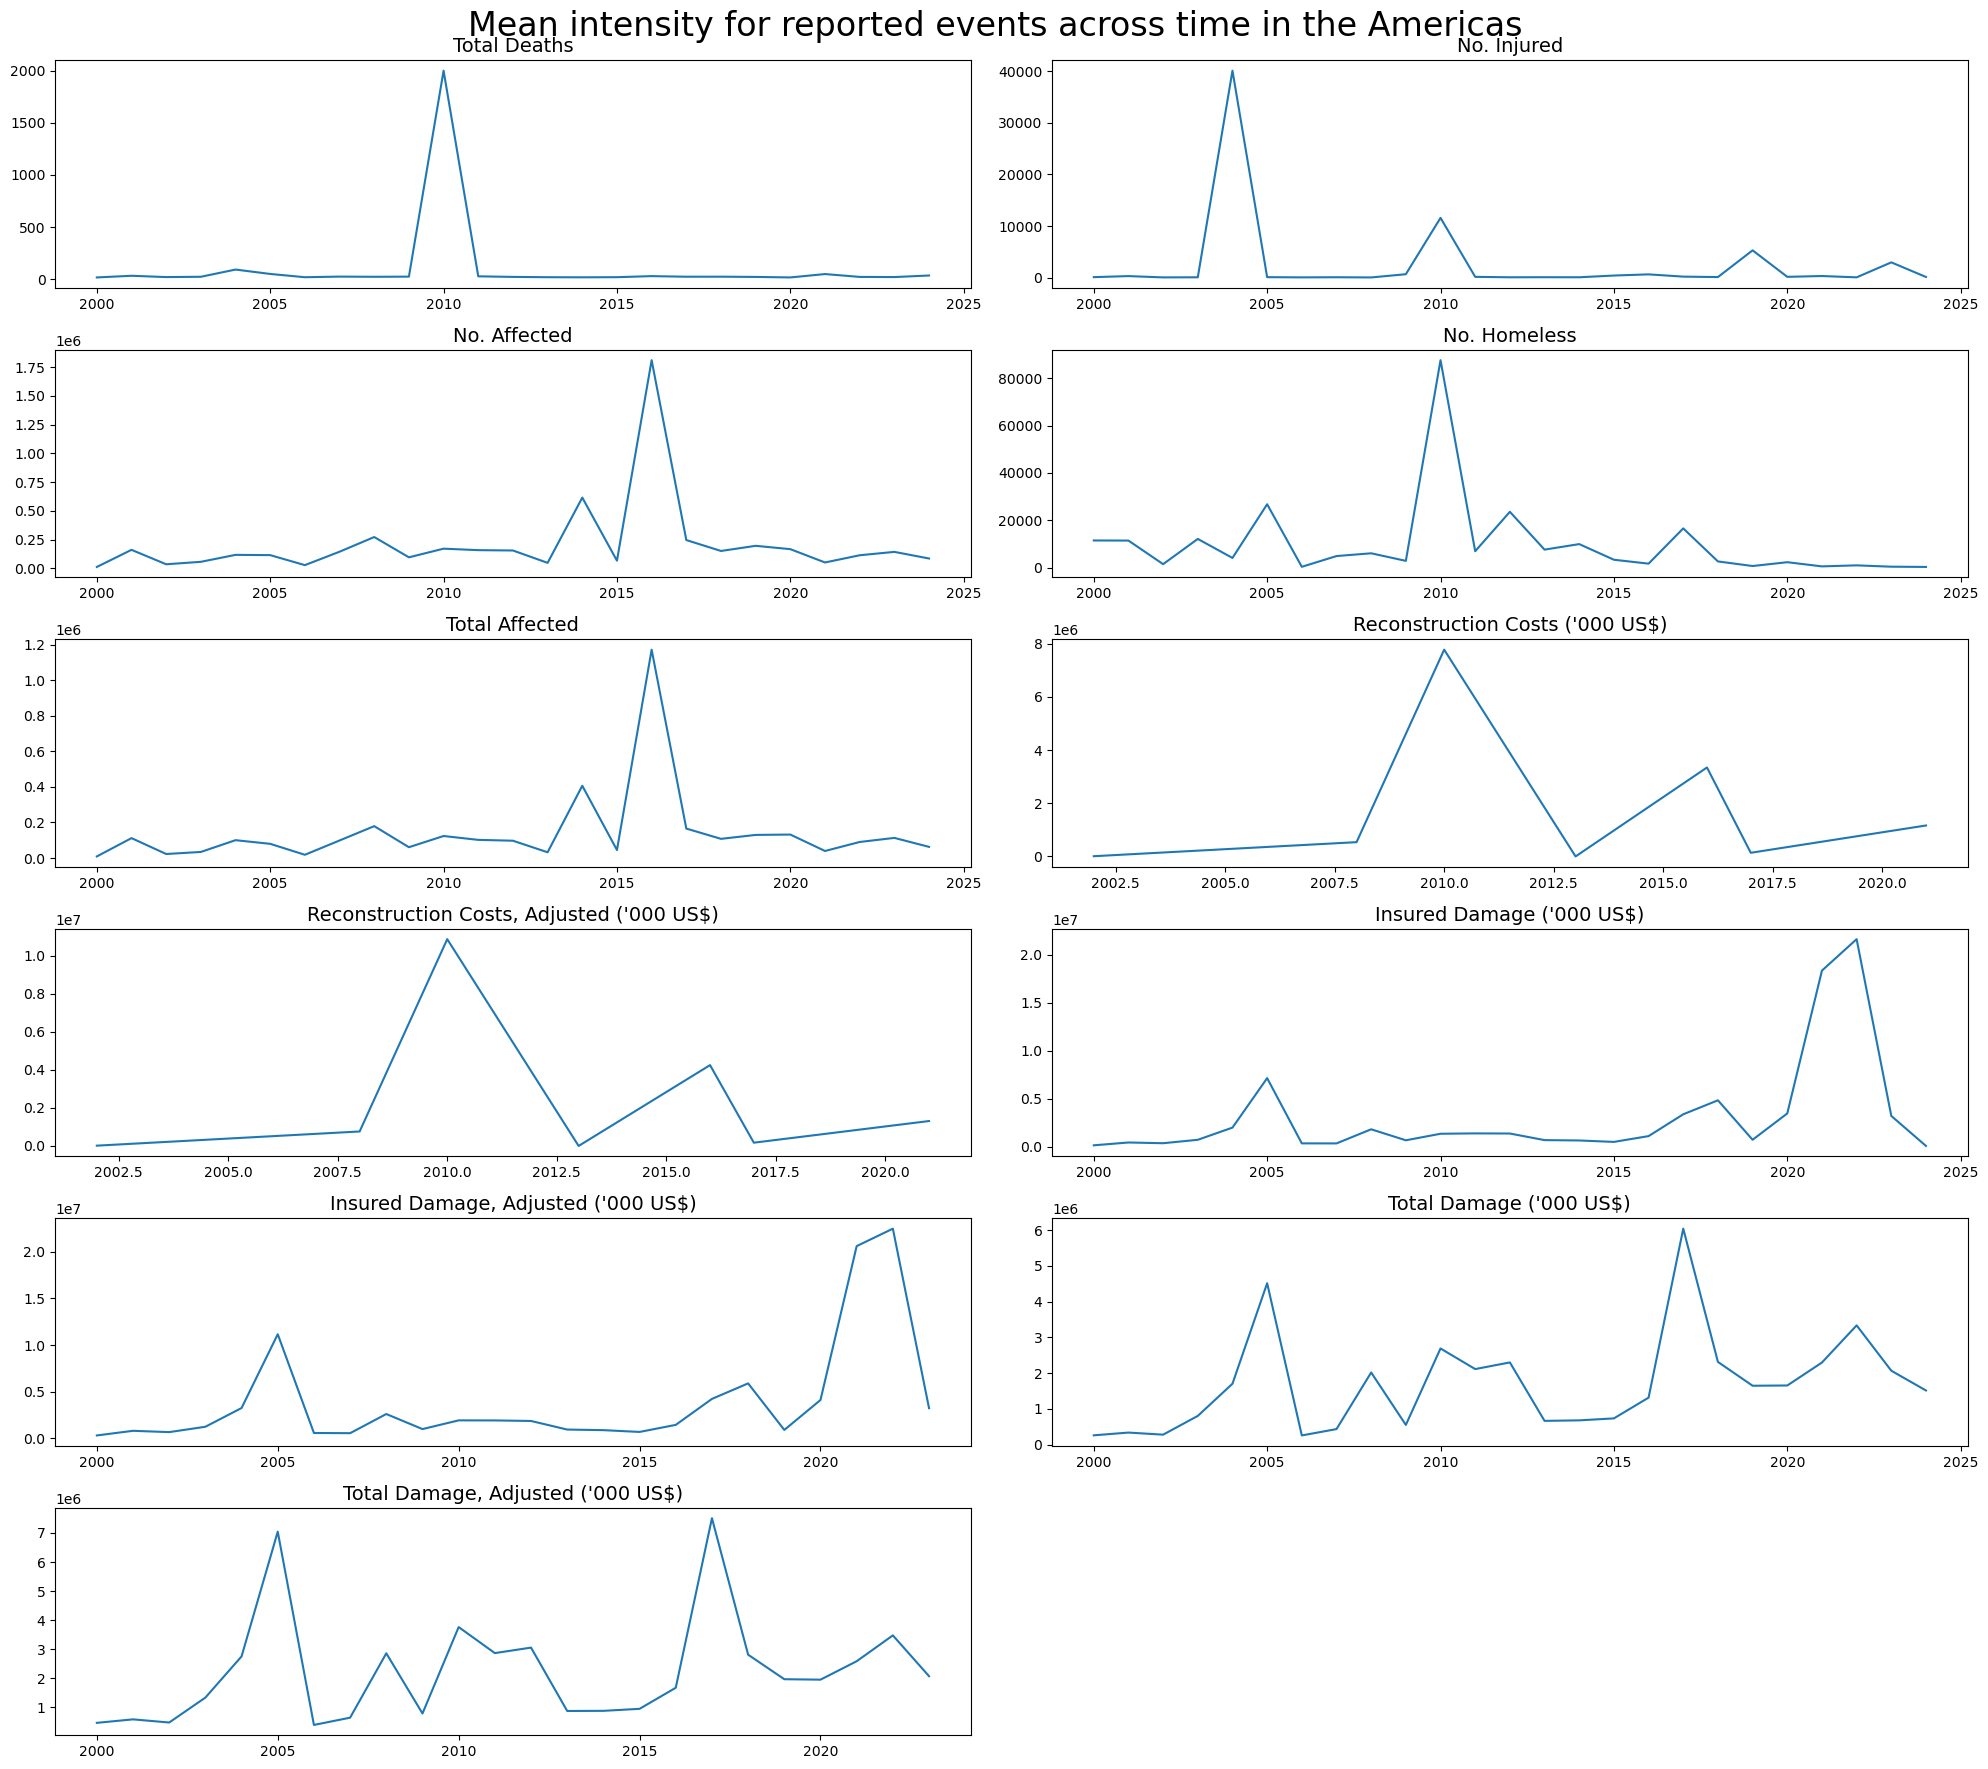

In [32]:
subplots_function( df = intensity_df.query('Region == "Americas"'), var_list = intensity_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "mean", graph_rows =6, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Mean intensity for reported events across time in the Americas")

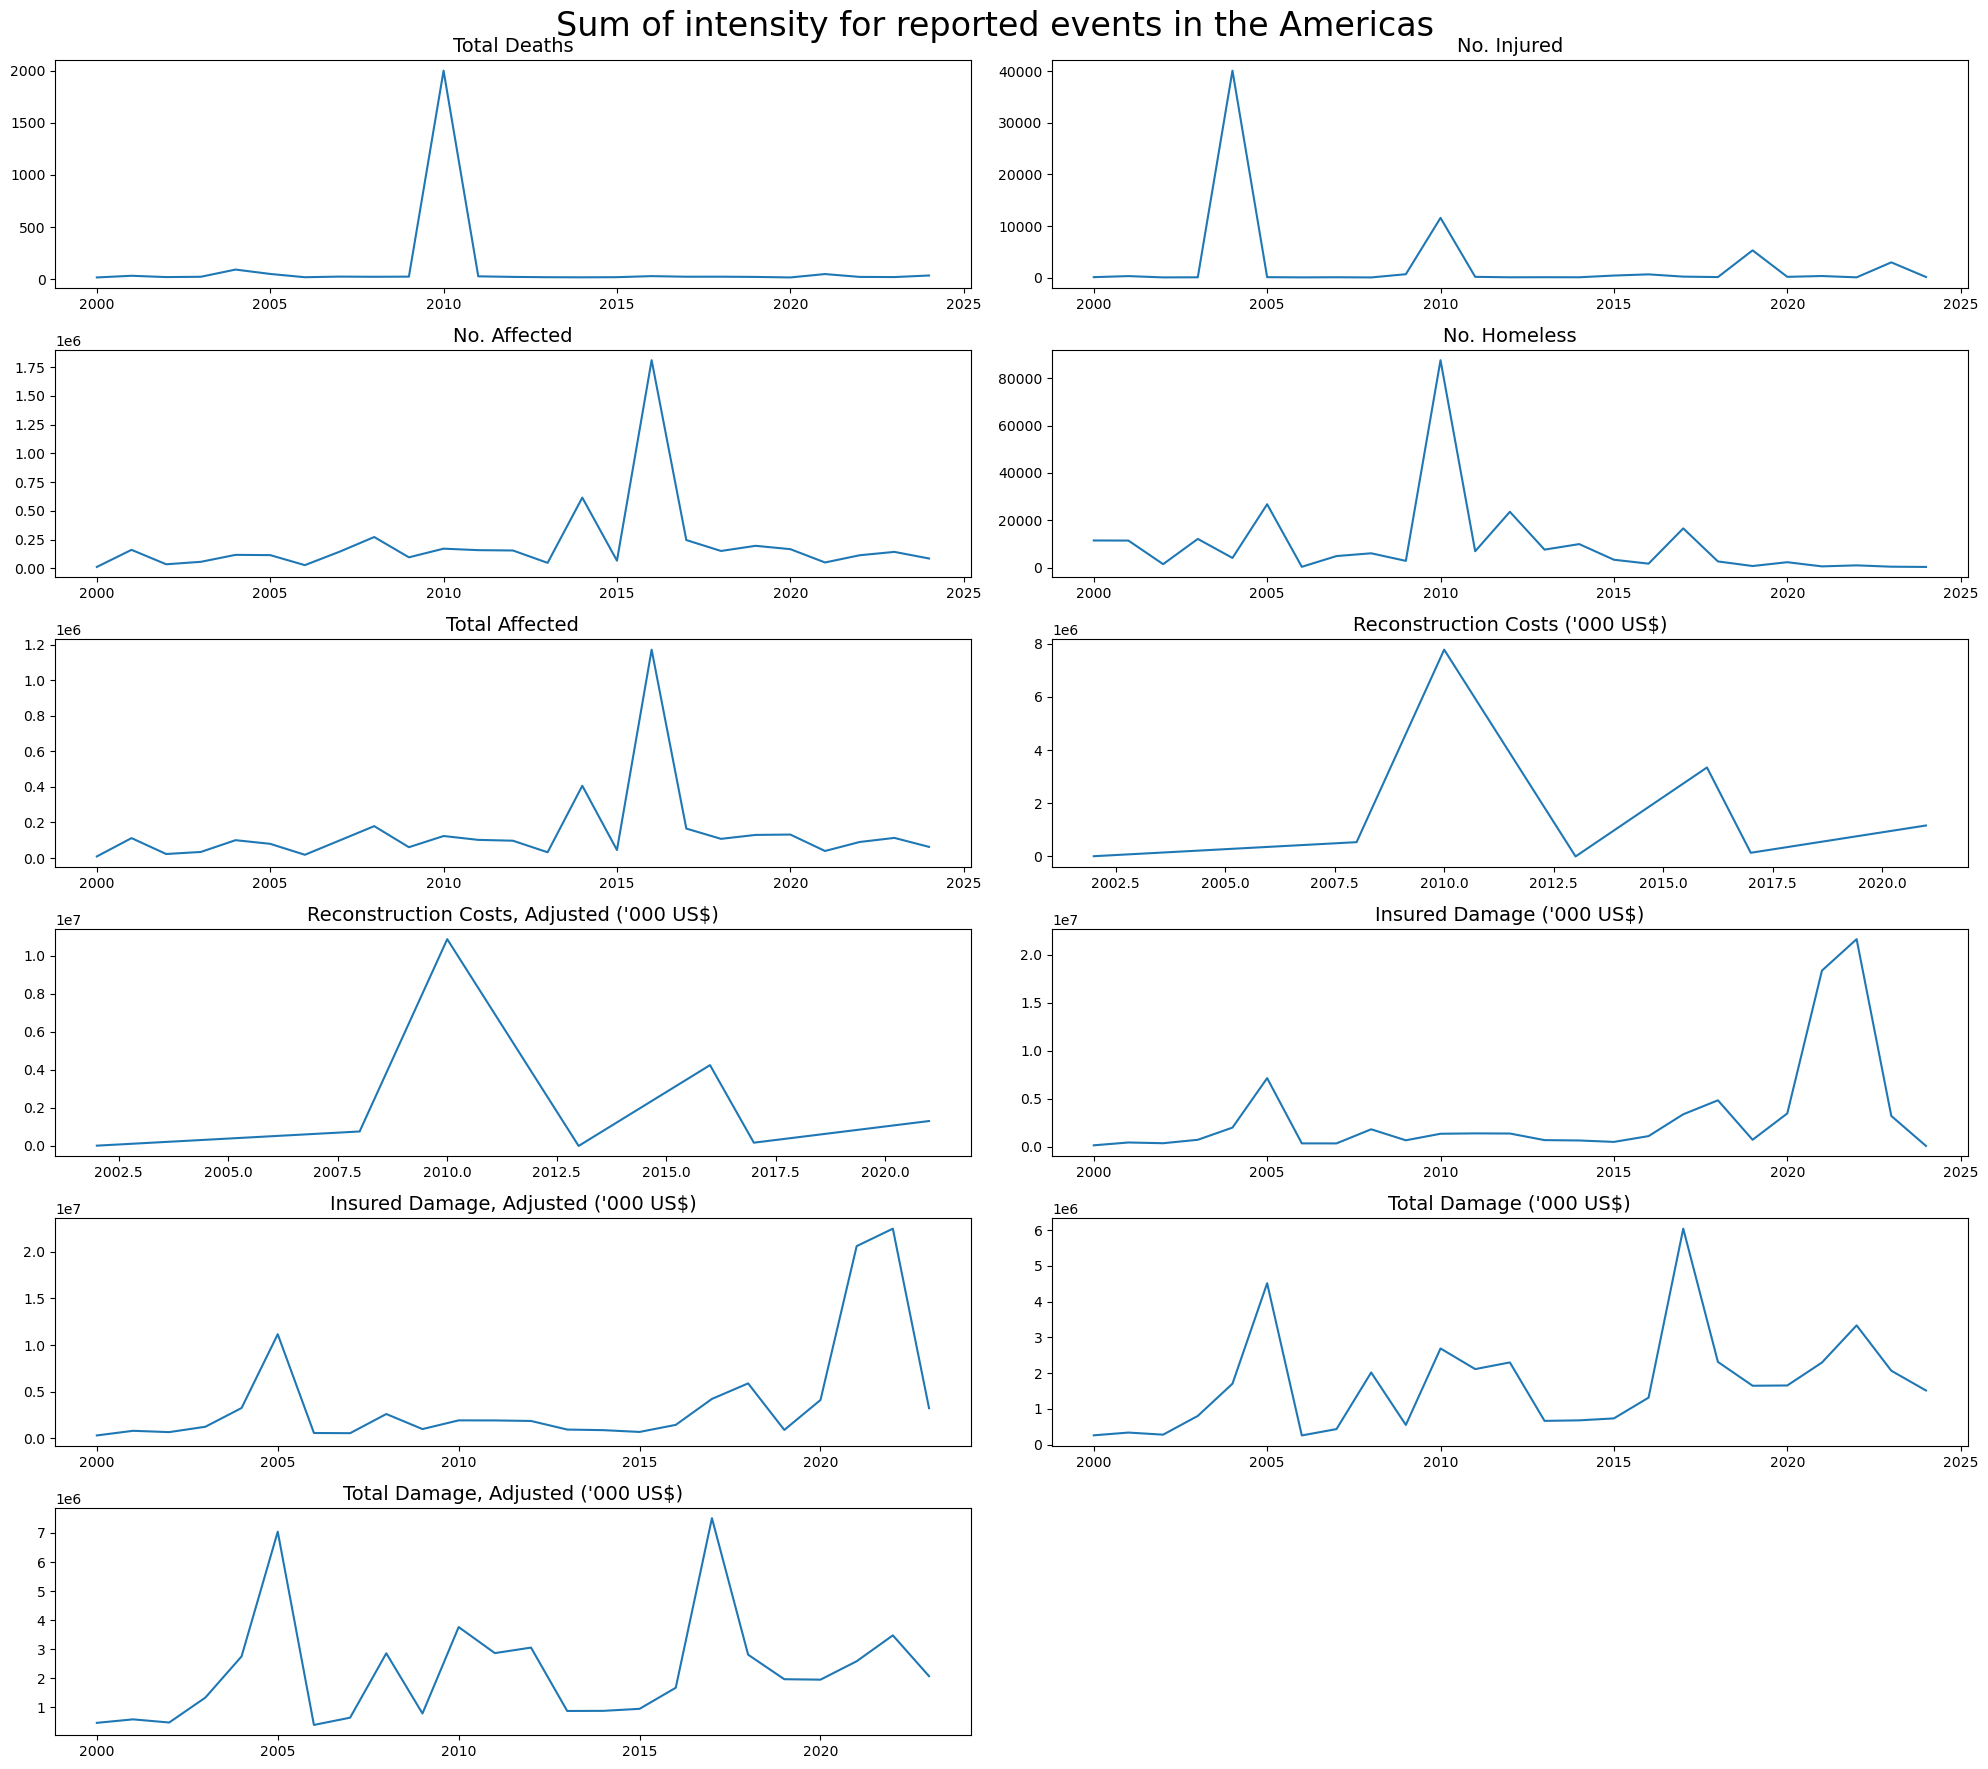

In [33]:
subplots_function( df = intensity_df.query('Region == "Americas"'), var_list = intensity_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "mean", graph_rows =6, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Sum of intensity for reported events in the Americas")

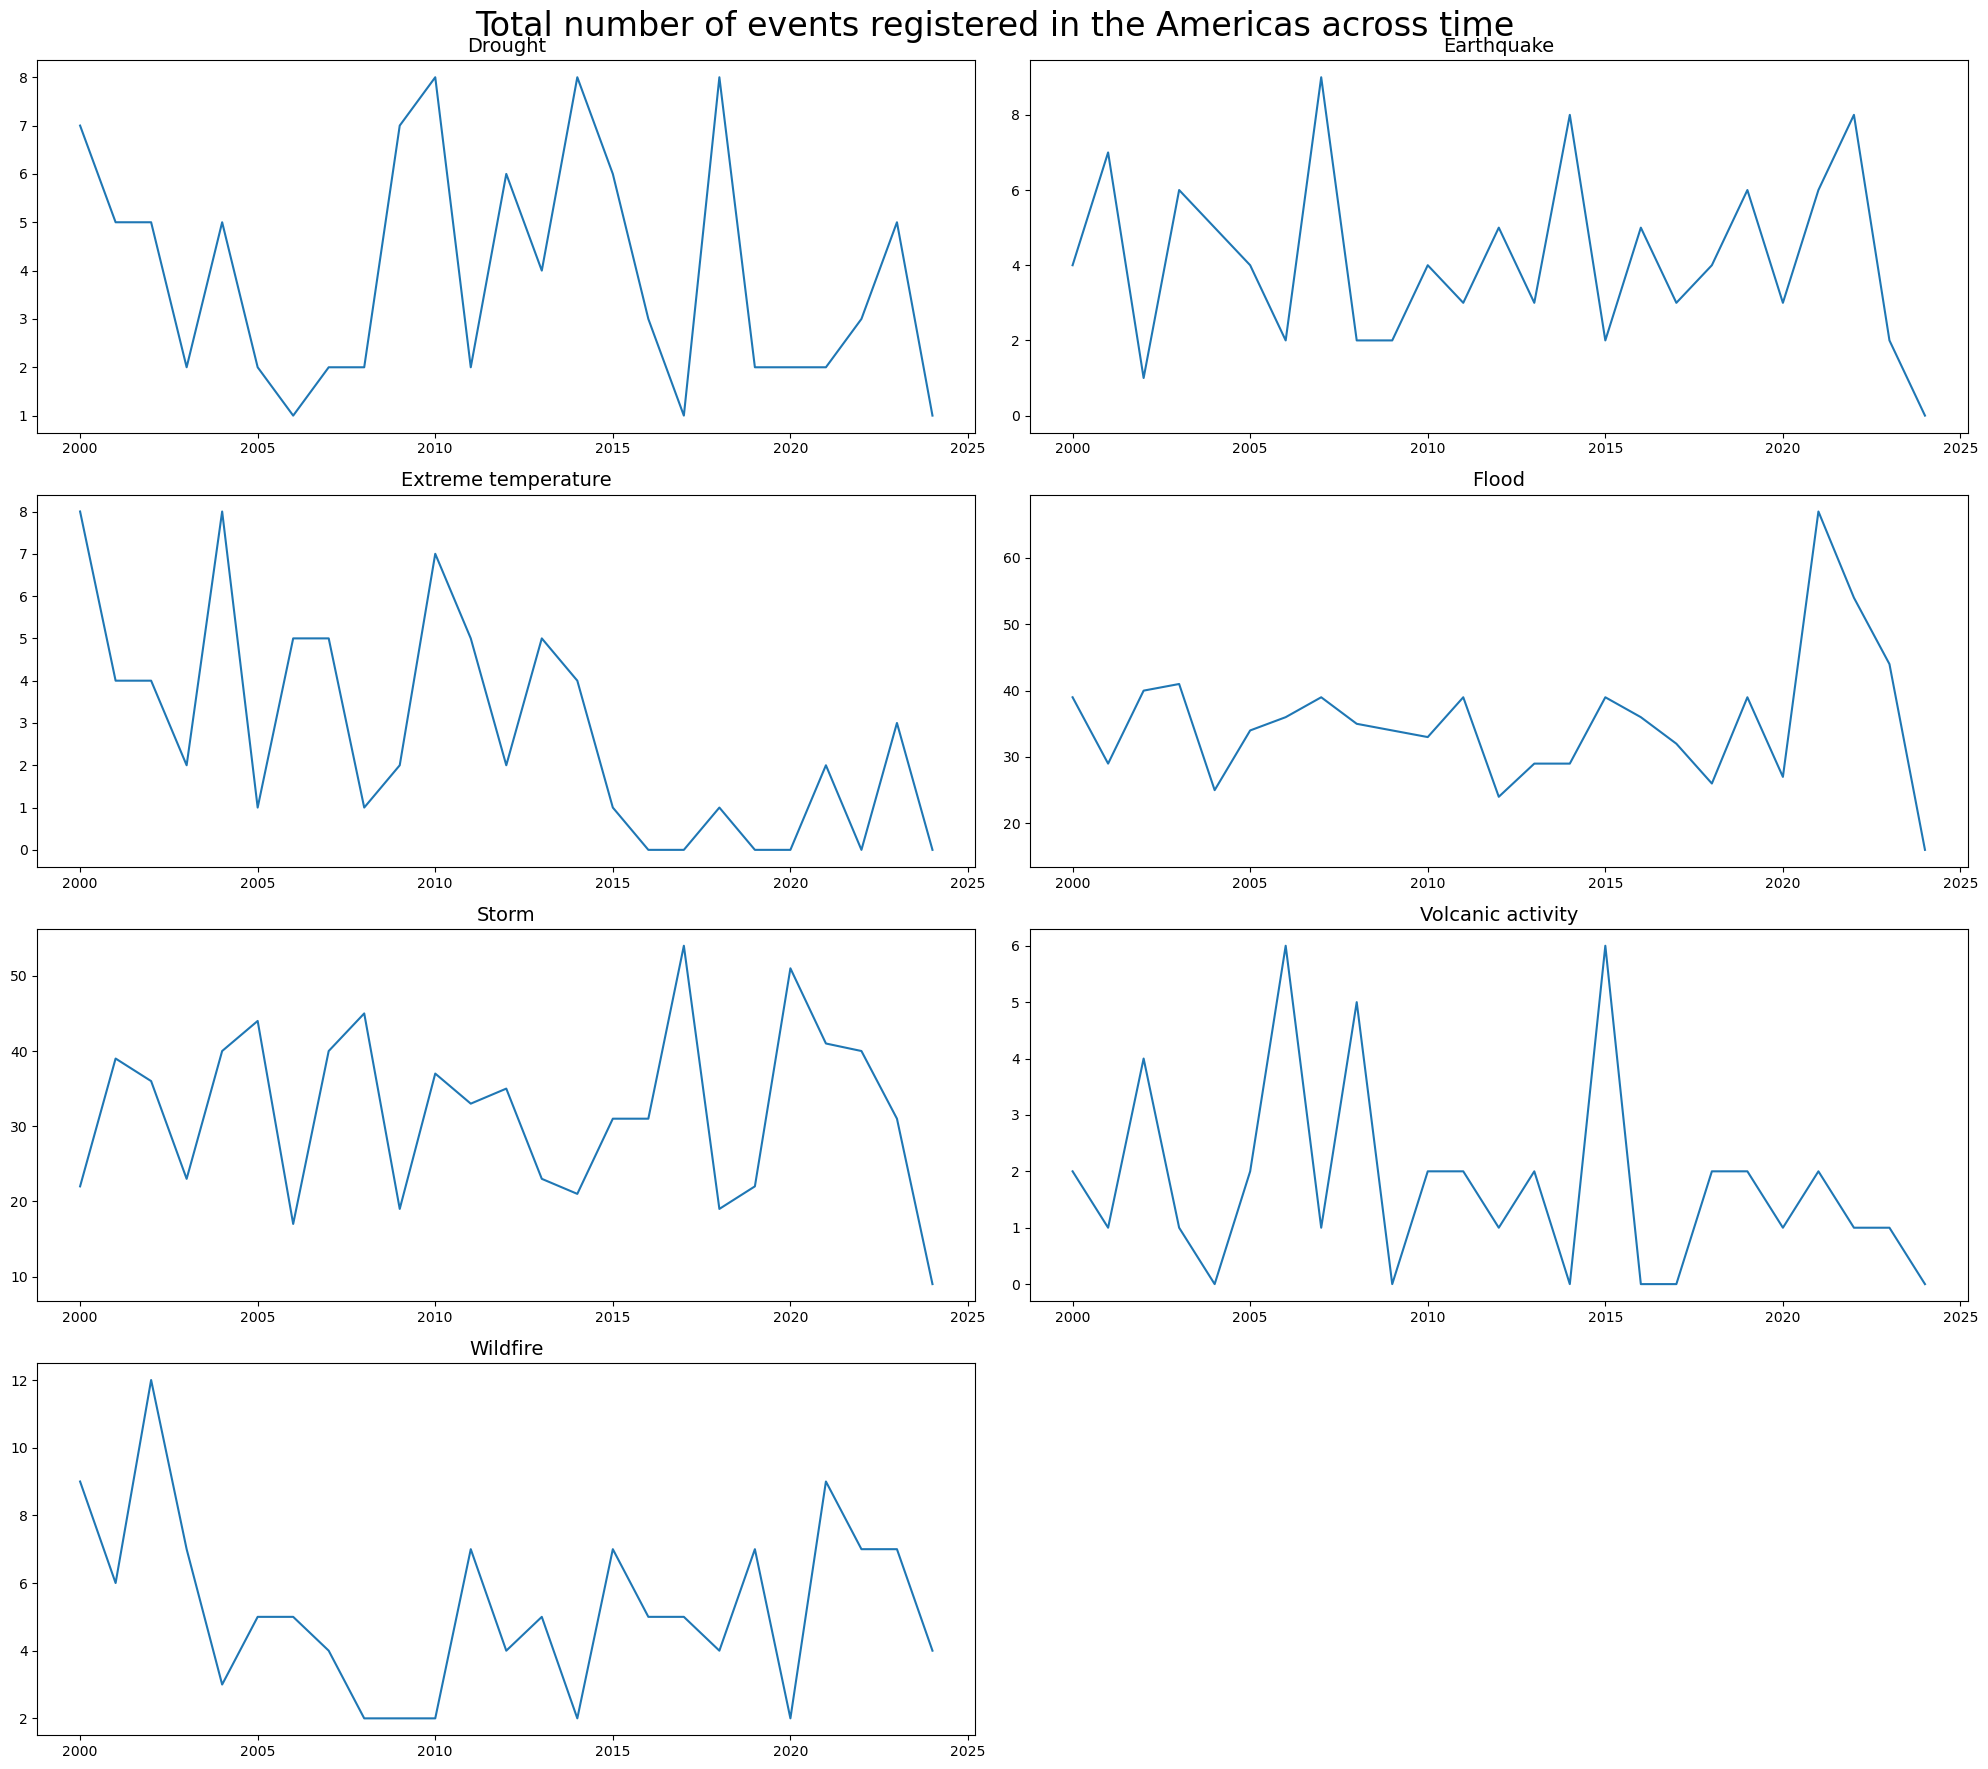

In [34]:
subplots_function( df = probability_df.query('Region == "Americas"'), var_list = probability_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "sum", graph_rows =4, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Total number of events registered in the Americas across time")

# 3. Descriptive stats for Laos

In [35]:
#Descriptive statistics Intensity
descriptive_stats_function(df = intensity_df.loc["Lao People's Democratic Republic"], varlist= intensity_df.describe().columns.values.tolist())

Total Deaths  No. Injured   No. Affected  No. Homeless  \
count        22.000000     4.000000      24.000000           1.0   
mean         23.409091    43.750000  167156.833333          45.0   
std          31.242003    46.842822  191552.052768           NaN   
min           1.000000     2.000000      95.000000          45.0   
25%           5.250000     4.250000   26246.000000          45.0   
50%          14.500000    41.000000   69324.500000          45.0   
75%          22.250000    80.500000  255632.000000          45.0   
max         136.000000    91.000000  615145.000000          45.0   
kurtosis      7.894129    -5.538631      -0.156649           NaN   
skewness      2.642409     0.073228       1.097705           NaN   

          Total Affected  Reconstruction Costs ('000 US$)  \
count          25.000000                              0.0   
mean       160479.360000                              NaN   
std        190476.488347                              NaN   
min             5.000000                              NaN   
25%         26000.000000                              NaN   
50%         68885.000000                              NaN   
75%        224176.000000                              NaN   
max        615145.000000                              NaN   
kurtosis       -0.023702                              NaN   
skewness        1.149849                              NaN   

          Reconstruction Costs, Adjusted ('000 US$)  \
count                                           0.0   
mean                                            NaN   
std                                             NaN   
min                                             NaN   
25%                                             NaN   
50%                                             NaN   
75%                                             NaN   
max                                             NaN   
kurtosis                                        NaN   
skewness                                        NaN   

          Insured Damage ('000 US$)  Insured Damage, Adjusted ('000 US$)  \
count                           0.0                                  0.0   
mean                            NaN                                  NaN   
std                             NaN                                  NaN   
min                             NaN                                  NaN   
25%                             NaN                                  NaN   
50%                             NaN                                  NaN   
75%                             NaN                                  NaN   
max                             NaN                                  NaN   
kurtosis                        NaN                                  NaN   
skewness                        NaN                                  NaN   

          Total Damage ('000 US$)  Total Damage, Adjusted ('000 US$)  
count                    8.000000                           8.000000  
mean                 57146.250000                       73517.250000  
std                  77387.213587                       95743.894623  
min                     50.000000                          63.000000  
25%                    780.000000                        1360.500000  
50%                  35000.000000                       45667.000000  
75%                  70750.000000                       95346.500000  
max                 225000.000000                      273023.000000  
kurtosis                 3.065743                           2.054197  
skewness                 1.707533                           1.492847

In [36]:
#Descriptive statistics Probability
descriptive_stats_function(df = probability_df.loc["Lao People's Democratic Republic"], varlist=['Drought', 'Earthquake', 'Extreme temperature', 'Flood', 'Storm',
       'Volcanic activity', 'Wildfire'])

Drought  Earthquake  Extreme temperature      Flood      Storm  \
count     17.000000   17.000000                 17.0  17.000000  17.000000   
mean       0.058824    0.058824                  0.0   1.000000   0.411765   
std        0.242536    0.242536                  0.0   0.612372   0.712287   
min        0.000000    0.000000                  0.0   0.000000   0.000000   
25%        0.000000    0.000000                  0.0   1.000000   0.000000   
50%        0.000000    0.000000                  0.0   1.000000   0.000000   
75%        0.000000    0.000000                  0.0   1.000000   1.000000   
max        1.000000    1.000000                  0.0   2.000000   2.000000   
kurtosis  17.000000   17.000000                  0.0   0.228571   1.094464   
skewness   4.123106    4.123106                  0.0   0.000000   1.526009   

          Volcanic activity  Wildfire  
count                  17.0      17.0  
mean                    0.0       0.0  
std                     0.0       0.0  
min                     0.0       0.0  
25%                     0.0       0.0  
50%                     0.0       0.0  
75%                     0.0       0.0  
max                     0.0       0.0  
kurtosis                0.0       0.0  
skewness                0.0       0.0

In [37]:
intensity_df.loc["Lao People's Democratic Republic"]

Region  Total Deaths  No. Injured  No. Affected  No. Homeless  \
Start Year                                                                 
2000         Asia          18.0          NaN           NaN           NaN   
2000         Asia          44.0          NaN           NaN           NaN   
2000         Asia          15.0          NaN      450000.0           NaN   
2000         Asia          10.0          5.0           NaN           NaN   
2000         Asia           NaN          NaN        9685.0           NaN   
2001         Asia           NaN          NaN      453000.0           NaN   
2002         Asia           2.0          NaN      150000.0           NaN   
2008         Asia           6.0          NaN      204190.0           NaN   
2009         Asia          16.0         91.0      128796.0           NaN   
2009         Asia          10.0          NaN           NaN           NaN   
2011         Asia          14.0          NaN       37000.0           NaN   
2011         Asia          34.0          NaN      430000.0           NaN   
2013         Asia          20.0         77.0      350000.0           NaN   
2013         Asia          77.0          NaN       36000.0           NaN   
2013         Asia          49.0          NaN           NaN           NaN   
2013         Asia           3.0          NaN      224176.0           NaN   
2014         Asia           NaN          NaN         750.0           NaN   
2015         Asia          23.0          NaN           NaN           NaN   
2015         Asia           NaN          NaN       47800.0           NaN   
2015         Asia           4.0          NaN          95.0          45.0   
2016         Asia           5.0          NaN       26328.0           NaN   
2017         Asia           NaN          NaN           NaN           NaN   
2018         Asia         136.0          NaN       13100.0           NaN   
2018         Asia           NaN          NaN      120000.0           NaN   
2018         Asia           NaN          NaN      615145.0           NaN   
2019         Asia          19.0          NaN      507500.0           NaN   
2019         Asia           NaN          NaN           NaN           NaN   
2020         Asia           NaN          NaN        1000.0           NaN   
2020         Asia           2.0          NaN       69764.0           NaN   
2021         Asia           NaN          NaN       26000.0           NaN   
2021         Asia           NaN          NaN           NaN           NaN   
2022         Asia           1.0          2.0       42550.0           NaN   
2023         Asia           7.0          NaN       68885.0           NaN   

            Total Affected  Reconstruction Costs ('000 US$)  \
Start Year                                                    
2000                   NaN                              NaN   
2000                   NaN                              NaN   
2000              450000.0                              NaN   
2000                   5.0                              NaN   
2000                9685.0                              NaN   
2001              453000.0                              NaN   
2002              150000.0                              NaN   
2008              204190.0                              NaN   
2009              128887.0                              NaN   
2009                   NaN                              NaN   
2011               37000.0                              NaN   
2011              430000.0                              NaN   
2013              350077.0                              NaN   
2013               36000.0                              NaN   
2013                   NaN                              NaN   
2013              224176.0                              NaN   
2014                 750.0                              NaN   
2015                   NaN                              NaN   
2015               47800.0                              NaN   
2015                 140.0 

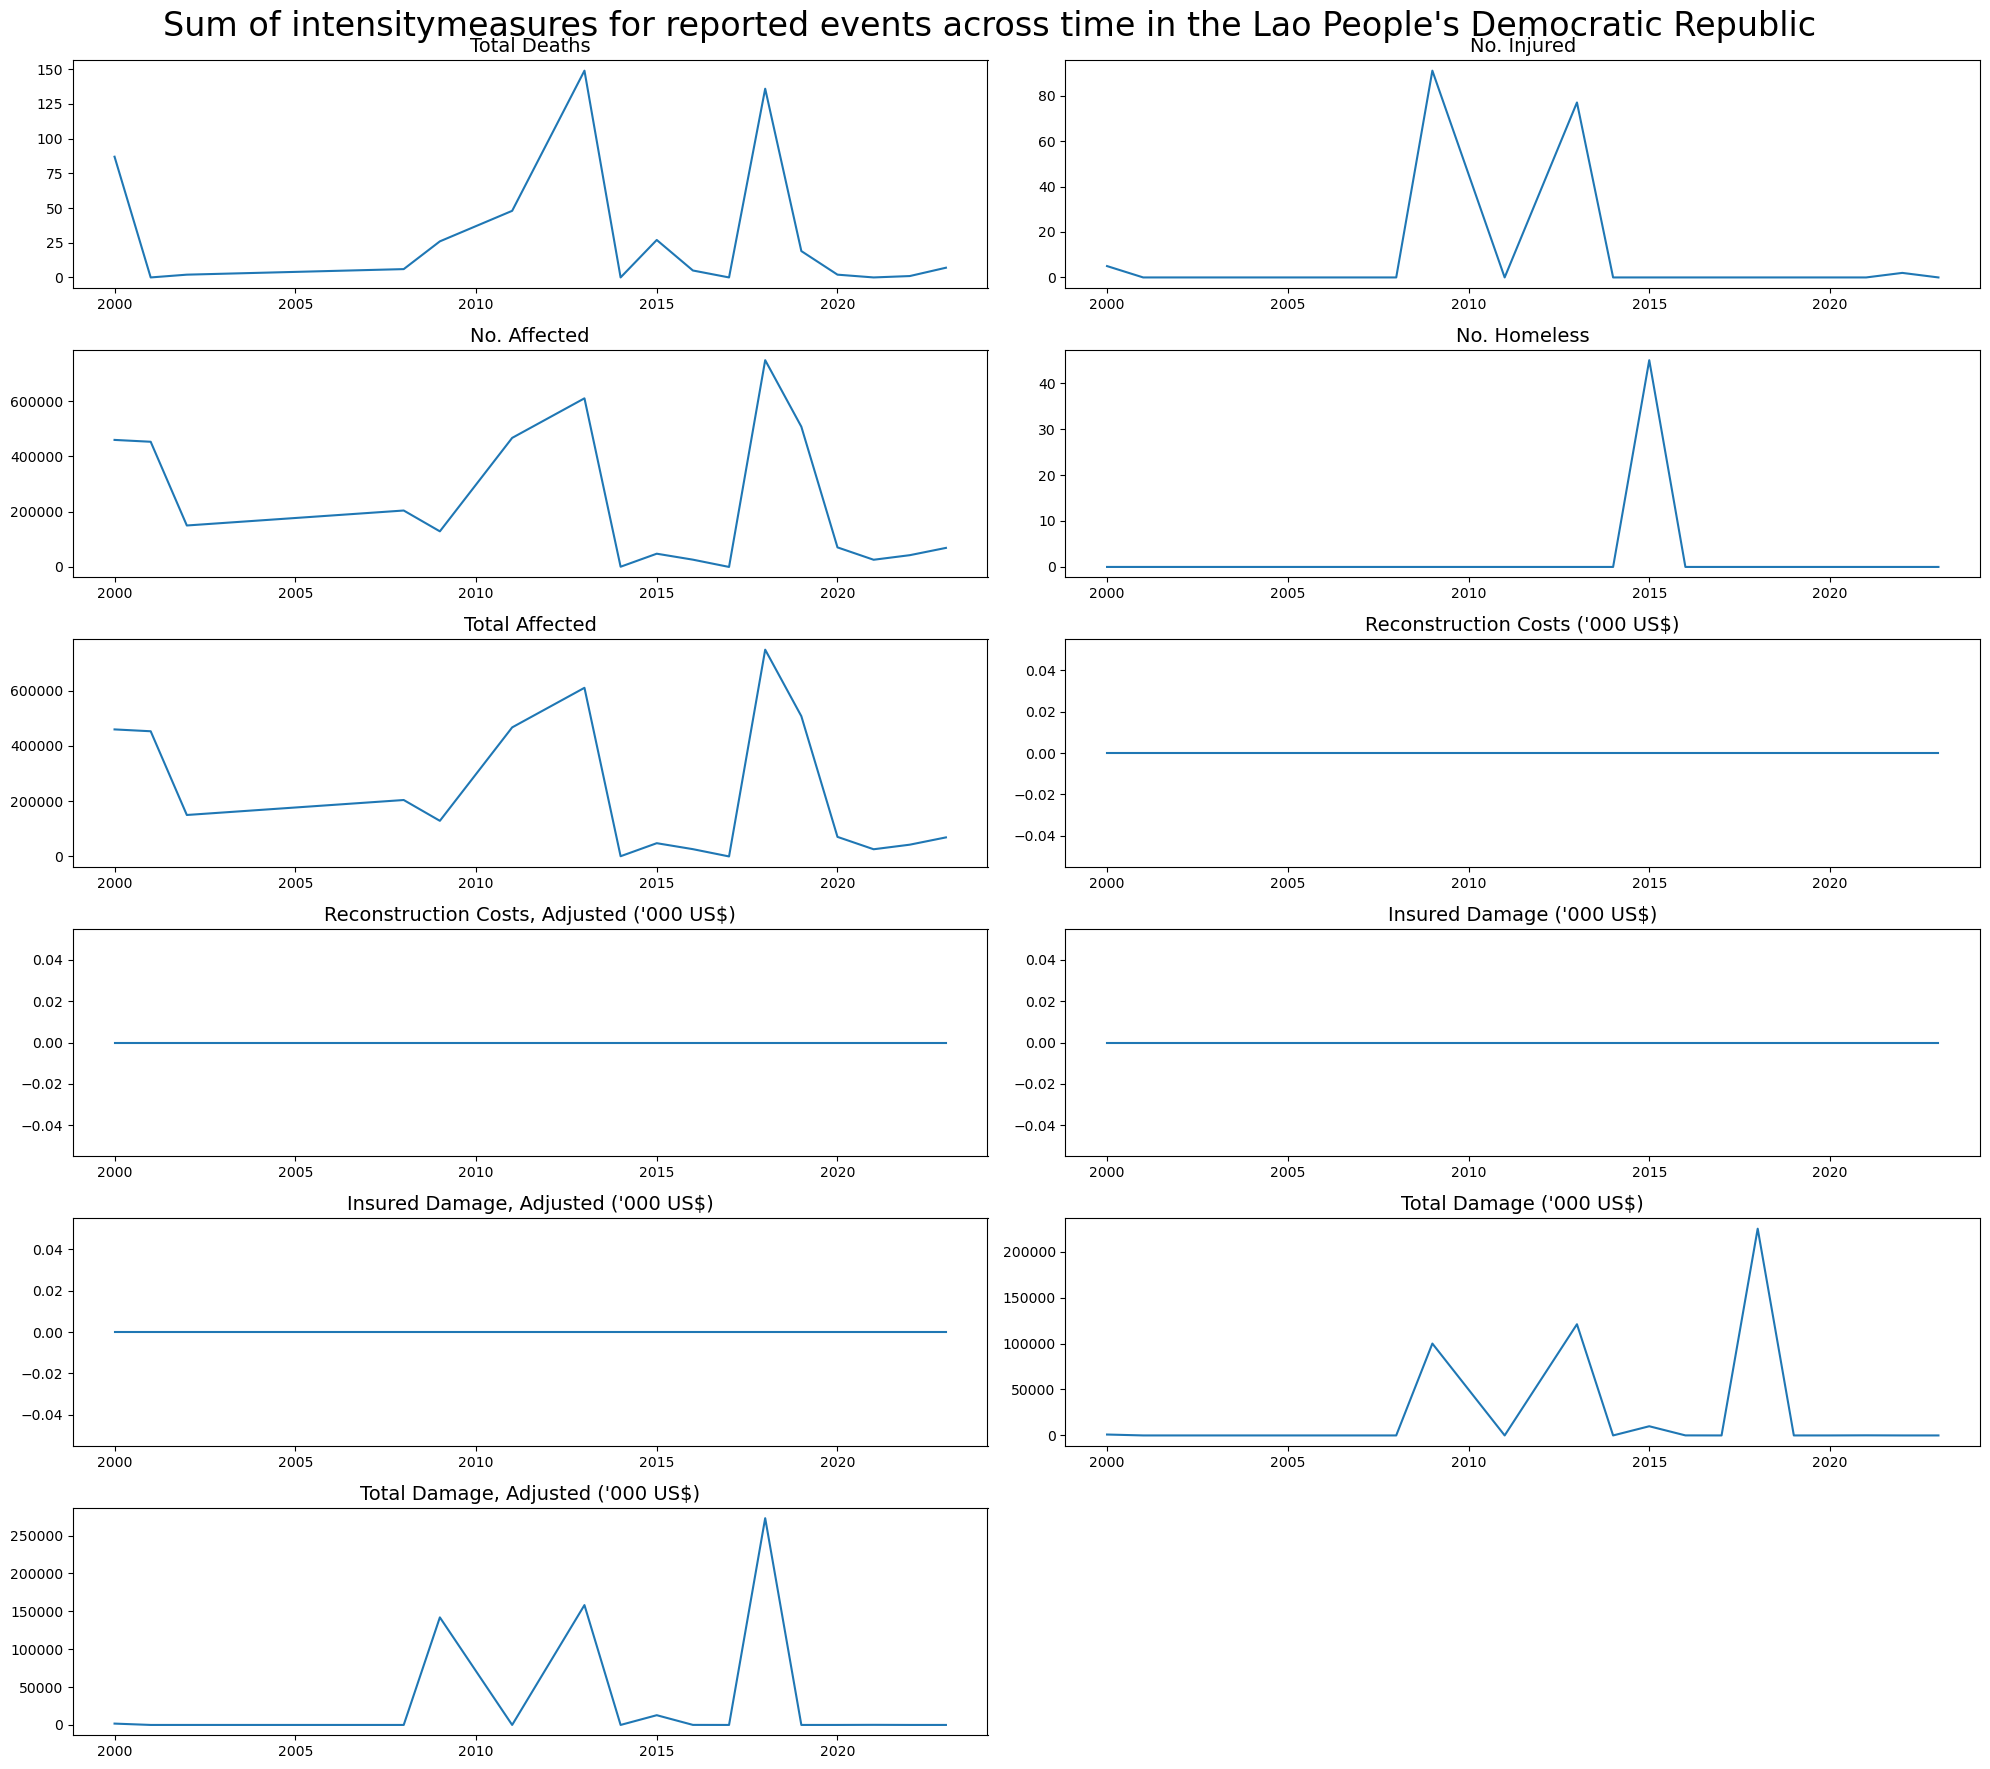

In [39]:
subplots_function( df = intensity_df.loc["Lao People's Democratic Republic"], var_list = intensity_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "sum", graph_rows =6, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Sum of intensitymeasures for reported events across time in the Lao People's Democratic Republic ")

In [ ]:
subplots_function( df = probability_df.loc["Lao People's Democratic Republic"], var_list = probability_df.describe().columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "sum", graph_rows =4, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14, title = "Total number of events registered in the Lao People's Democratic Republic")